# Cancer Hospital Records

In [1]:
# importing libraries
import datetime as dt
import matplotlib.pyplot as plt     
import matplotlib.ticker as ticker                   
import missingno as msno                    
import numpy as np
import os
import pandas as pd
import sys
from IPython.display import Markdown as md
from pandas.plotting import scatter_matrix  
from wordcloud import WordCloud, STOPWORDS

sys.path.append("../src")
from utility import (
    dataset_dimensions, column_missing_values, column_unique_values, 
    numeric_categorical_data, lowercase_column_name, column_to_datetime,
    number_unique_values, missing_in_columns, medical_speciality, 
    count_entries_outracla, separate_recnenhum, ratio_recnenhum
)

# Loading the dataset

In [2]:
# allow showing more rows and columns when using the method df.head()
pd.set_option("display.max_rows", 350, "display.max_columns", 300)

# open original file converted to csv format
# rhc_orig = pd.read_csv("../data/pacigeral_jun22.csv", encoding="latin_1", low_memory=False)
rhc_orig = pd.read_csv("../data/pacigeral_2000-2024.csv", encoding="latin_1", low_memory=False)

# make a copy of the dataset
rhc = rhc_orig.copy()

# Exploratory data analysis (EDA)

Let's inspect five random data points of the dataset.

In [3]:
rhc.head(3)

INSTITU  ESCOLARI  IDADE  SEXO UFNASC UFRESID       IBGE     CIDADE  \
0   612374         3     52     1     GO      SP  3550308.0  SAO PAULO   
1    22950         2     50     2     SP      SP  3534104.0    ORIENTE   
2    22985         2     70     1     SP      SP  3529005.0    MARILIA   

   CATEATEND   DTCONSULT  CLINICA  DIAGPREV      DTDIAG  BASEDIAG  TOPO  \
0          2  2007-10-02       12         1  2007-10-03         3  C209   
1          2  2014-04-24       15         1  2014-05-13         3  C504   
2          2  2014-04-08       23         1  2014-05-05         3  C189   

  TOPOGRUP                            DESCTOPO  MORFO  \
0      C20                            RETO SOE  82113   
1      C50  MAMA QUADRANTE SUPERIOR EXTERNO DA  85003   
2      C18                           COLON SOE  82113   

                          DESCMORFO    EC ECGRUP   T  N  M   PT   PN   PM  S  \
0            ADENOCARCINOMA TUBULAR  IIIB    III   3  1  0  NaN  NaN  NaN  8   
1  CARCINOMA DUCTAL INFILTRANTE SOE   IIB     II   2  1  0  NaN  NaN  NaN  8   
2            ADENOCARCINOMA TUBULAR   IIB     II  4A  0  0  NaN  NaN  NaN  8   

   G  LOCALTNM  IDMITOTIC  PSA  GLEASON OUTRACLA META01 META02 META03 META04  \
0  8         8          8    8        8      NaN    NaN    NaN    NaN    NaN   
1  8         8          8    8        8      NaN    NaN    NaN    NaN    NaN   
2  8         8          8    8        8      NaN    NaN    NaN    NaN    NaN   

       DTTRAT  NAOTRAT TRATAMENTO TRATHOSP TRATFANTES TRATFAPOS  NENHUM  \
0  2008-05-12        8          B        B          J         J       0   
1  2014-08-11        8          A        A          J         J       0   
2  2014-05-17        8          E        E          J         J       0   

   CIRURGIA  RADIO  QUIMIO  HORMONIO  TMO  IMUNO  OUTROS  NENHUMANT  CIRURANT  \
0         0      1       0         0    0      0       0          1         0   
1         1      0       0         0    0      0       0          1         0   
2         1      0       1         0    0      0       0          1         0   

   RADIOANT  QUIMIOANT  HORMOANT  TMOANT  IMUNOANT  OUTROANT  NENHUMAPOS  \
0         0          0         0       0         0         0           1   
1         0          0         0       0         0         0           1   
2         0          0         0       0         0         0           1   

   CIRURAPOS  RADIOAPOS  QUIMIOAPOS  HORMOAPOS  TMOAPOS  IMUNOAPOS  OUTROAPOS  \
0          0          0           0          0        0          0          0   
1          0          0           0          0        0          0          0   
2          0          0           0          0        0          0          0   

    DTULTINFO  ULTINFO  CONSDIAG  TRATCONS  DIAGTRAT  ANODIAG CICI CICIGRUP  \
0  2009-01-31        3         1     223.0     222.0     2007  NaN      NaN   
1  2016-08-01        2        19     109.0      90.0     2014  NaN      NaN   
2  2020-08-15        4        27      39.0      12.0     2014  NaN      NaN   

  CICISUBGRU FAIXAETAR  LATERALI INSTORIG                       DRS     RRAS  \
0        NaN     50-59         8      NaN  DRS 01  Grande Sao Paulo  RRAS 06   
1        NaN     50-59         2      NaN           DRS 09  Marilia  RRAS 10   
2        NaN       70+         8      NaN           DRS 09  Marilia  RRAS 10   

   PERDASEG  ERRO  DTRECIDIVA  RECNENHUM  RECLOCAL  RECREGIO  RECDIST REC01  \
0         0     0  2008-10-02          0         0         1        1   C22   
1         1     0         NaN          1         0         0        0   NaN   
2         0     0         NaN          1         0         0        0   NaN   

  REC02 REC03 REC04                   DSCINST  IBGEATEN  \
0   NaN   NaN   NaN                     ICESP   3550308   
1   NaN   NaN   NaN  HOSP CLINICAS DE MARILIA   3529005   
2   NaN   NaN   NaN     SANTA CASA DE MARILIA   3529005   

                   DRS_INST RRAS_INST CIDADE_INS     CIDO  \
0  DRS 01  Grande Sao Pau

#### General information about the dataset

We can separate the dataset by numerical and categorical features.

In [4]:
numeric_categorical_data(rhc)

Number of numerical variables: 58

Number of categorical variables: 46


#### Number of unique values for each feature present in the dataset

In [5]:
number_unique_values(rhc)


Total number of rows:      1257217

Total number of features: 104



feature  n_unique_values     feature  n_unique_values     feature  \
0     INSTITU               93          PM                9   NENHUMANT   
1    ESCOLARI                6           S                6    CIRURANT   
2       IDADE              110           G                6    RADIOANT   
3        SEXO                2    LOCALTNM                5   QUIMIOANT   
4      UFNASC               29   IDMITOTIC                4    HORMOANT   
5     UFRESID               28         PSA                5      TMOANT   
6        IBGE             3140     GLEASON                5    IMUNOANT   
7      CIDADE             3032    OUTRACLA             8427    OUTROANT   
8   CATEATEND                5      META01               70  NENHUMAPOS   
9   DTCONSULT             9242      META02               68   CIRURAPOS   
10    CLINICA               40      META03               64   RADIOAPOS   
11   DIAGPREV                2      META04               55  QUIMIOAPOS   
12     DTDIAG             9065      DTTRAT             9089   HORMOAPOS   
13   BASEDIAG                4     NAOTRAT                9     TMOAPOS   
14       TOPO              331  TRATAMENTO               10   IMUNOAPOS   
15   TOPOGRUP               70    TRATHOSP               10   OUTROAPOS   
16   DESCTOPO              331  TRATFANTES                4   DTULTINFO   
17      MORFO              769   TRATFAPOS               10     ULTINFO   
18  DESCMORFO              803      NENHUM                2    CONSDIAG   
19         EC               30    CIRURGIA                2    TRATCONS   
20     ECGRUP                7       RADIO                2    DIAGTRAT   
21          T               29      QUIMIO                2     ANODIAG   
22          N               17    HORMONIO                2        CICI   
23          M                7         TMO                2    CICIGRUP   
24         PT               45       IMUNO                2  CICISUBGRU   
25         PN               25      OUTROS                2   FAIXAETAR   

    n_unique_values     feature  n_unique_values  
0                 2    LATERALI                4  
1                 2    INSTORIG              278  
2                 2         DRS               17  
3                 2        RRAS               19  
4                 1    PERDASEG                2  
5                 1        ERRO                1  
6                 1  DTRECIDIVA             8579  
7                 1   RECNENHUM                2  
8                 2    RECLOCAL                2  
9                 2    RECREGIO                2  
10                2     RECDIST                2  
11                2       REC01               69  
12                2       REC02               64  
13                2       REC03               61  
14                2       REC04               49  
15                2     DSCINST               93  
16             9115    IBGEATEN               48  
17                4    DRS_INST               17  
18             3367   RRAS_INST               18  
19             2811  CIDADE_INS               48  
20             3023        CIDO              708  
21               25     DESCIDO              708  
22               48     HABILIT               13  
23               12     HABIT11               13  
24               48    HABILIT1                6  
25                8    HABILIT2                5

#### Features with missing values

Let's show the total number missing values for each feature.

In [6]:
# total number of null values, if they are present
missing_in_columns(rhc)

Features with missing values:



UFRESID           253
IBGE              253
CIDADE            253
PT             726724
PN             733345
PM             766616
OUTRACLA      1183672
META01        1086948
META02        1200402
META03        1236796
META04        1250855
DTTRAT         101532
DTULTINFO           1
TRATCONS       101532
DIAGTRAT       101532
CICI          1225065
CICIGRUP      1225471
CICISUBGRU    1225471
INSTORIG      1256496
DRS             87493
DTRECIDIVA    1127713
REC01         1177507
REC02         1232122
REC03         1248596
REC04         1254547
CIDO               31
DESCIDO            31
dtype: int64

We can see that some features have lots of missing values, but given the characteristics of the dataset, each case must be analyzed separately.

We can also visualize the missing values, in a more intuitive way, using the library `missingno`.

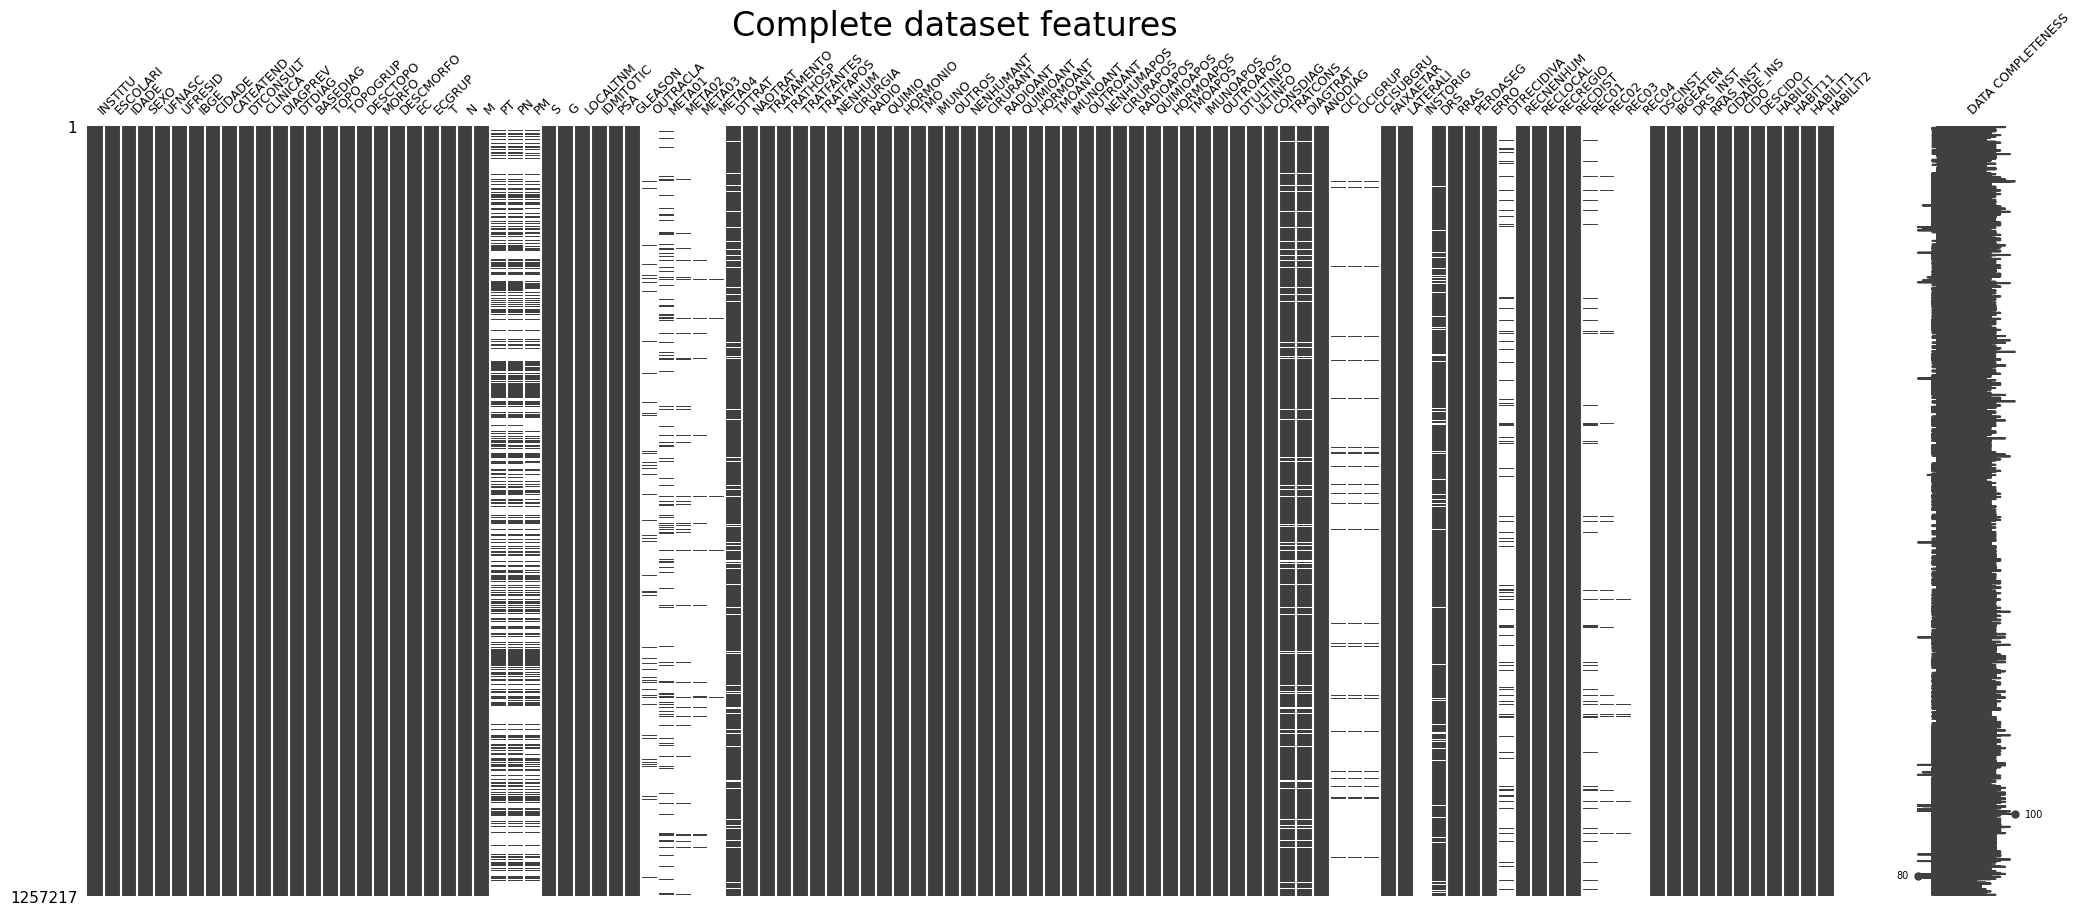

In [7]:
# visualize missing value matrix for the complete dataset
msno.matrix(rhc, labels=True, fontsize=9)
plt.title("Complete dataset features ", fontsize=24)
plt.show()

The white lines in the previous plot represent mising values. Some rows like (`PT`, `PN`, `PM`), (`DTTRAT`, `TRATCONS`, `DIAGTRAT`), and (`CICI`, `CICIGRUP`, `CICISUBGRUP`), present missing values in common rows.

Since we already know which features have missing values we can take a closer look on them with `missingno`.

> NOTE: **DSCCIDO** variable changed to **DESCIDO** in the current dataset.

In [8]:
# create a new dataframe containing only features with missing values
miss_df = rhc[['IDADE', 'DESCMORFO','PT','PN' ,'PM','OUTRACLA','META01','META02','META03','META04',        
               'DTTRAT','DTULTINFO','TRATCONS','DIAGTRAT','CICI','CICIGRUP','CICISUBGRU',    
               'INSTORIG','DRS','DTRECIDIVA','REC01','REC02','REC03','REC04','CIDO','DESCIDO']]

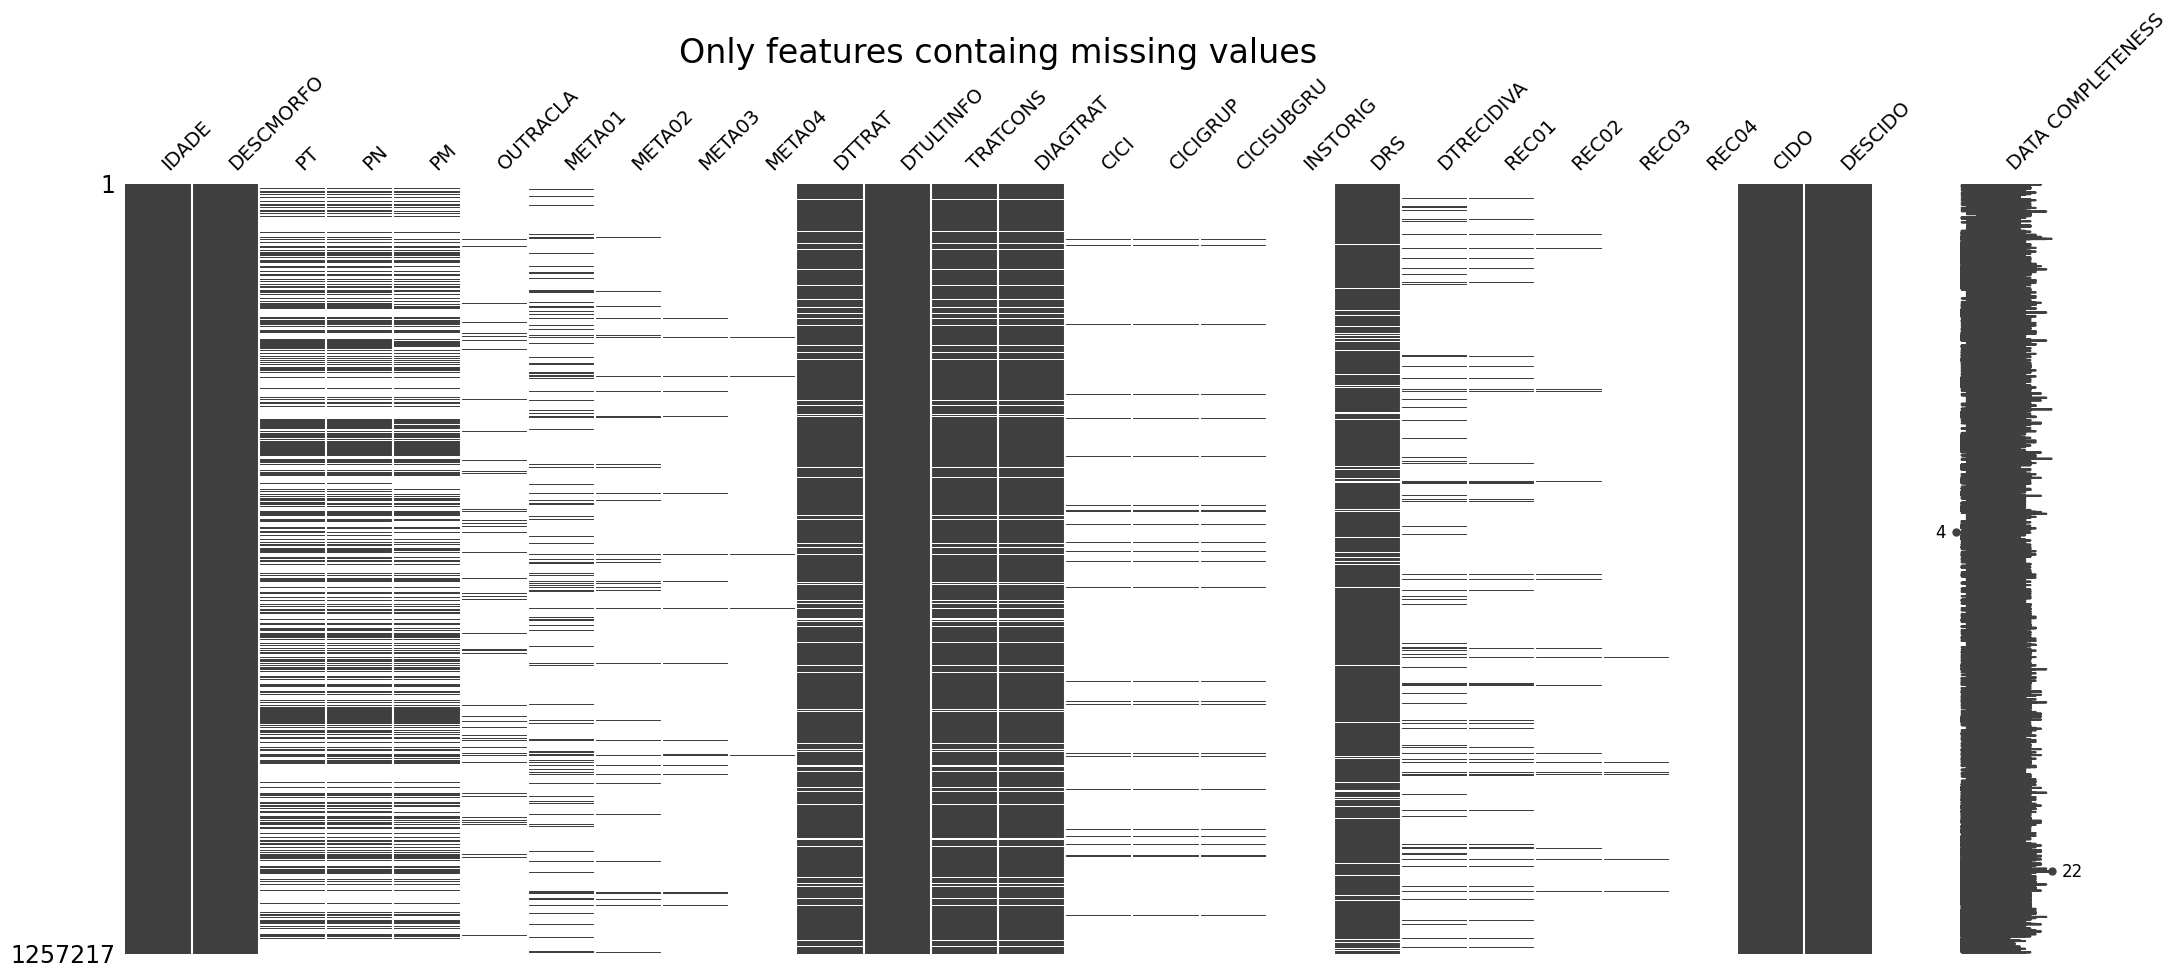

In [9]:
# visualize missing value matrix only for features with missing values
msno.matrix(miss_df, labels=True, fontsize=14)
plt.title("Only features containg missing values", fontsize=24)
plt.show()

#### Converting feature names to lowercase

In [10]:
lowercase_column_name(rhc)
lowercase_column_name(rhc_orig)

#### Converting a date from object to datetime format

Let's create a new columns containing converted datetime format from its object values.

The following features contain dates:
* `dtconsult`
* `dtdiag`
* `dtultinfo` 
* `dtrecidiva` 
* `dttrat`

The date format (2007-01-19) follows the sequence year (4 digits) - month (2 digits) - year (2 digits).

In a first approximation, we can only use the year of registration and create new columns in the dataset with this new information.

The new columns to be created are:
* `year_consult`
* `year_diag`
* `year_ultinfo` 
* `year_recidiva`
* `year_trat`

In [11]:
column_to_datetime(rhc, ['dtconsult', 'dtdiag', 'dtultinfo', 'dtrecidiva', 'dttrat'])

# create a new column containing only the year
rhc['year_consult'] = rhc['dtconsult'].dt.year
rhc['year_diag'] = rhc['dtdiag'].dt.year
rhc['year_ultinfo'] = rhc['dtultinfo'].dt.year
rhc['year_recidiva'] = rhc['dtrecidiva'].dt.year
rhc['year_trat'] = rhc['dttrat'].dt.year

# convert year to integer
# rhc['year_consult'] = rhc['year_consult'].astype('Int64')
# rhc['year_diag'] = rhc['year_diag'].astype('Int64')
# rhc['year_ultinfo'] = rhc['year_ultinfo'].astype('Int64')
rhc['year_recidiva'] = rhc['year_recidiva'].astype('Int64')
rhc['year_trat'] = rhc['year_trat'].astype('Int64')

The attribute `year_recidiva` is only filled in case of recurrence of the disease. The unfilled fields appear as `NaN`. 

In [12]:
# visualize modified first lines
rhc.head(3)

institu  escolari  idade  sexo ufnasc ufresid       ibge     cidade  \
0   612374         3     52     1     GO      SP  3550308.0  SAO PAULO   
1    22950         2     50     2     SP      SP  3534104.0    ORIENTE   
2    22985         2     70     1     SP      SP  3529005.0    MARILIA   

   cateatend  dtconsult  clinica  diagprev     dtdiag  basediag  topo  \
0          2 2007-10-02       12         1 2007-10-03         3  C209   
1          2 2014-04-24       15         1 2014-05-13         3  C504   
2          2 2014-04-08       23         1 2014-05-05         3  C189   

  topogrup                            desctopo  morfo  \
0      C20                            RETO SOE  82113   
1      C50  MAMA QUADRANTE SUPERIOR EXTERNO DA  85003   
2      C18                           COLON SOE  82113   

                          descmorfo    ec ecgrup   t  n  m   pt   pn   pm  s  \
0            ADENOCARCINOMA TUBULAR  IIIB    III   3  1  0  NaN  NaN  NaN  8   
1  CARCINOMA DUCTAL INFILTRANTE SOE   IIB     II   2  1  0  NaN  NaN  NaN  8   
2            ADENOCARCINOMA TUBULAR   IIB     II  4A  0  0  NaN  NaN  NaN  8   

   g  localtnm  idmitotic  psa  gleason outracla meta01 meta02 meta03 meta04  \
0  8         8          8    8        8      NaN    NaN    NaN    NaN    NaN   
1  8         8          8    8        8      NaN    NaN    NaN    NaN    NaN   
2  8         8          8    8        8      NaN    NaN    NaN    NaN    NaN   

      dttrat  naotrat tratamento trathosp tratfantes tratfapos  nenhum  \
0 2008-05-12        8          B        B          J         J       0   
1 2014-08-11        8          A        A          J         J       0   
2 2014-05-17        8          E        E          J         J       0   

   cirurgia  radio  quimio  hormonio  tmo  imuno  outros  nenhumant  cirurant  \
0         0      1       0         0    0      0       0          1         0   
1         1      0       0         0    0      0       0          1         0   
2         1      0       1         0    0      0       0          1         0   

   radioant  quimioant  hormoant  tmoant  imunoant  outroant  nenhumapos  \
0         0          0         0       0         0         0           1   
1         0          0         0       0         0         0           1   
2         0          0         0       0         0         0           1   

   cirurapos  radioapos  quimioapos  hormoapos  tmoapos  imunoapos  outroapos  \
0          0          0           0          0        0          0          0   
1          0          0           0          0        0          0          0   
2          0          0           0          0        0          0          0   

   dtultinfo  ultinfo  consdiag  tratcons  diagtrat  anodiag cici cicigrup  \
0 2009-01-31        3         1     223.0     222.0     2007  NaN      NaN   
1 2016-08-01        2        19     109.0      90.0     2014  NaN      NaN   
2 2020-08-15        4        27      39.0      12.0     2014  NaN      NaN   

  cicisubgru faixaetar  laterali instorig                       drs     rras  \
0        NaN     50-59         8      NaN  DRS 01  Grande Sao Paulo  RRAS 06   
1        NaN     50-59         2      NaN           DRS 09  Marilia  RRAS 10   
2        NaN       70+         8      NaN           DRS 09  Marilia  RRAS 10   

   perdaseg  erro dtrecidiva  recnenhum  reclocal  recregio  recdist rec01  \
0         0     0 2008-10-02          0         0         1        1   C22   
1         1     0        NaT          1         0         0        0   NaN   
2         0     0        NaT          1         0         0        0   NaN   

  rec02 rec03 rec04                   dscinst  ibgeaten  \
0   NaN   NaN   NaN                     ICESP   3550308   
1   NaN   NaN   NaN  HOSP CLINICAS DE MARILIA   3529005   
2   NaN   NaN   NaN     SANTA CASA DE MARILIA   3529005   

                   drs_inst rras_inst cidade_ins     cido  \
0  DRS 01  Grande Sao Paulo   RRAS 06  SAO PA

#### State 

* birth state: `ufnasc`
* residence state: `ufresid`

In [13]:
ufnasc_value = rhc['ufnasc'].value_counts(normalize=True).values[0]

In [14]:
ufnasc_key = rhc['ufnasc'].value_counts(normalize=True).index[0]

In [15]:
# birth states
ufnasc_value = rhc['ufnasc'].value_counts(normalize=True).values[0]
ufnasc_state = rhc['ufnasc'].value_counts(normalize=True).index[0]
md(f"About {round(float(ufnasc_value*100))}% of patients were born in the state of {ufnasc_state}.")

About 65% of patients were born in the state of SP.

In [16]:
# residence states 
ufresid_value = rhc['ufresid'].value_counts(normalize=True).values[0]
ufresid_state = rhc['ufresid'].value_counts(normalize=True).index[0]
md(f"About {round(float(ufresid_value)*100)}% of patients live in the state of {ufresid_state}.")

About 93% of patients live in the state of SP.

From the data, it is not possible to know whether the declared residence is permanent or occurs only during the treatment period.

In [17]:
# counts for the entries in the column `s` 
rhc['s'].value_counts()

s
8    1252564
9       2043
0       1618
3        425
1        284
2        283
Name: count, dtype: int64

All entries in column `s` have the same value 8, which according to the information in the database, means "not applicable". The `s` column (serum tumor markers) is reserved for recording germ cell tumors in the testis.

#### Patient's level of education

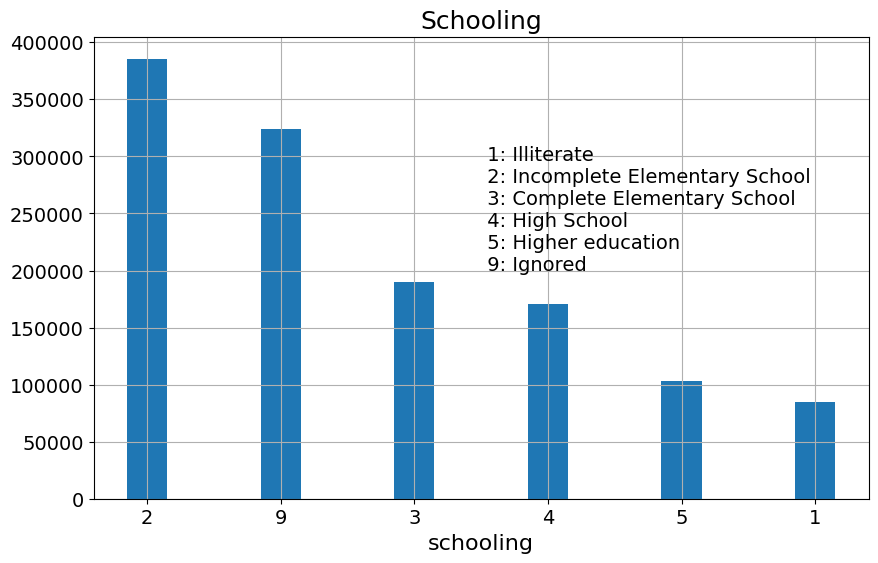

In [18]:
# schooling
rhc['escolari'].value_counts(normalize=False).plot(kind='bar',stacked=True, width = 0.3, rot=0, fontsize=14,figsize=(10,6))
plt.xlabel('schooling', fontsize=16)
plt.text(2.5, 200000,' 1: Illiterate\n 2: Incomplete Elementary School\n 3: Complete Elementary School\n 4: High School\n 5: Higher education\n 9: Ignored ', fontsize = 14)
plt.title("Schooling", fontsize=18)
plt.grid()
plt.show()

#### Age and gender

In [19]:
sex_p = rhc['sexo'].value_counts(normalize=True)

In [20]:
md(f"""The number of men and women in the database is pretty much the same: 
{100*round(sex_p.iloc[1], 3).item()}% of patients are male and 
{100*round(sex_p.iloc[0], 3).item()} are female. \n 
The ages have a uniform distribution for the two gender included in the dataset.\n 
There are {rhc['idade'][rhc['idade'] <= 19].value_counts().sum()} patients 
under 20 years old. Of these, {rhc['cici'][rhc['idade'] <= 19 ].value_counts().sum()} 
are classified using CICI. The remaining {rhc[(rhc['idade'] <= 19) & (rhc['cici'].isna())].shape[0]} 
are not classified using CICI.""")

The number of men and women in the database is pretty much the same: 
49.5% of patients are male and 
50.5 are female. 
 
The ages have a uniform distribution for the two gender included in the dataset.
 
There are 32446 patients 
under 20 years old. Of these, 32117 
are classified using CICI. The remaining 329 
are not classified using CICI.

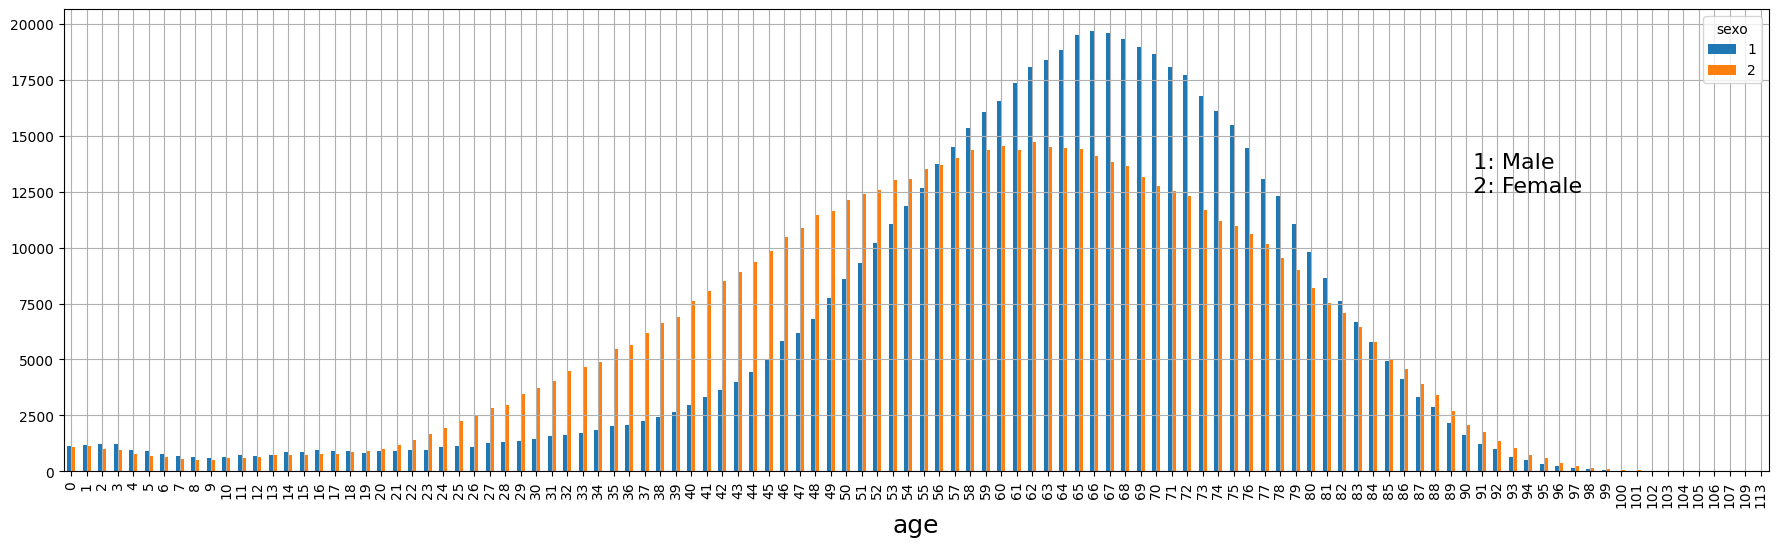

In [21]:
# age and gender trends
rhc.groupby(['idade','sexo']).size().unstack().plot(kind='bar',stacked=False, rot=90, figsize=(22,6))
plt.text(90, 12500,' 1: Male\n 2: Female', fontsize = 16)
plt.xlabel("age", fontsize=18)
plt.grid()
plt.show()

#### City

The figure below shows only cities with more than 10% of presence in the dataset. 

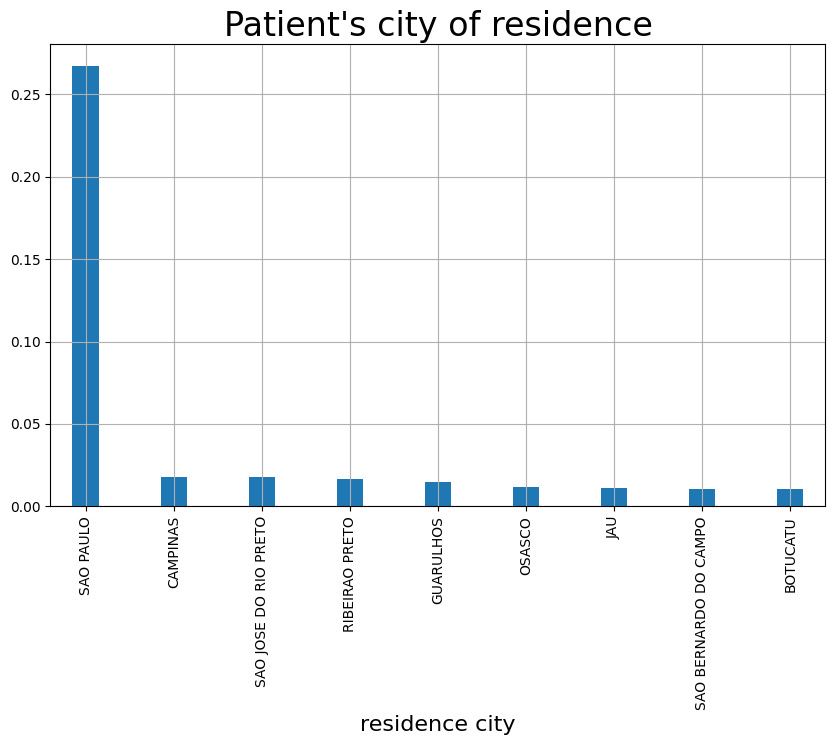

In [22]:
# residence city
city =rhc_orig['cidade'].value_counts(normalize=True)
city.sort_values(ascending=False)

most_frequent_cities = city[city > 0.01]
most_frequent_cities.plot.bar(width=0.3, figsize=(10,6))
plt.xlabel('residence city', fontsize=16)
plt.title("Patient's city of residence", fontsize=24)
plt.grid()
plt.show()

#### Service category

A lot of entries are listed as "no information" available.

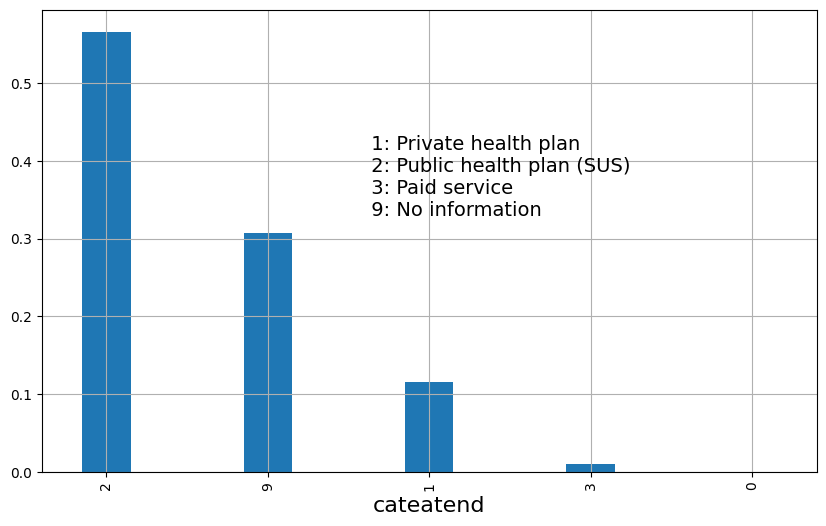

In [23]:
# care category
cateatend = rhc['cateatend'].value_counts(normalize=True)
plt.xlabel('diagnosis care category', fontsize=16)
cateatend.plot.bar(width=0.3, figsize=(10,6))
plt.text(1.6, 0.33,' 1: Private health plan\n 2: Public health plan (SUS)\n 3: Paid service\n 9: No information', fontsize = 14)
plt.grid()
plt.show()

#### Date of the first medical appointment

The RHC database has been officially registering new cases since 2000.


There is a linear increase in the number of cases and then a decrease is observed. According to the [FOSP website](http://www.fosp.saude.sp.gov.br:443/epidemiologia/docs/Dados_de_Cancer.pdf), the lowest values observed in later years are:

> "_due to the fact that there is a wait of at least one year for the inclusion of the case in the database, this being the time established to obtain a greater number of information about the tumor, the treatment performed and the patient's evolution after the therapeutics, thus ensuring greater completeness and
data quality. However, this does not means that the number of cancer cases is decreasing_".

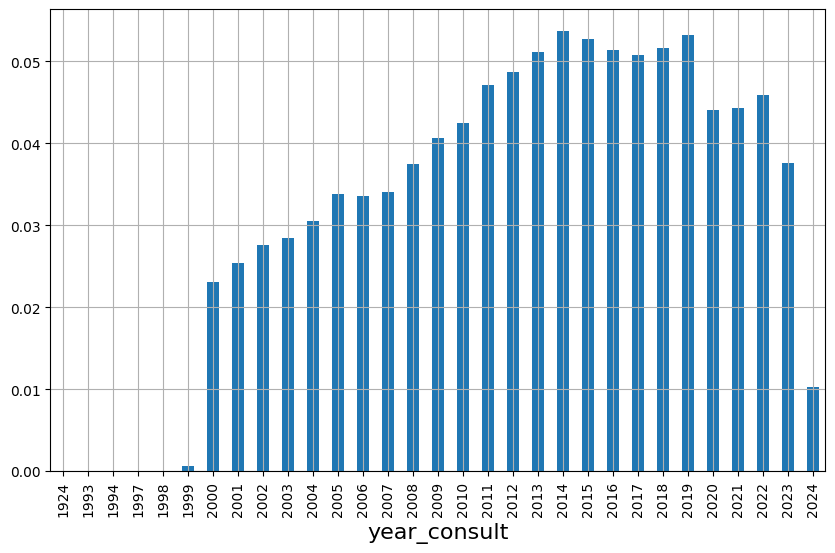

In [24]:
# first consultation date
year_consult = rhc['year_consult'].value_counts(normalize=True).sort_index(ascending=True)
plt.xlabel('date of the first medical appointment', fontsize=16)
year_consult.plot.bar(figsize=(10,6))
plt.grid()
plt.show()

We can also use `datetime` to compare the first two month of each year in the dataset.

In [25]:
# create new columns for the year and month of the first consultation
rhc['year_consult'] = rhc['dtconsult'].dt.year
rhc['month_consult'] = rhc['dtconsult'].dt.month

In [26]:
rhc[rhc.year_consult < 1980]

institu  escolari  idade  sexo ufnasc ufresid       ibge     cidade  \
547889    22950         2     98     2     BA      SP  3556602.0  VERA CRUZ   

        cateatend  dtconsult  clinica  diagprev     dtdiag  basediag  topo  \
547889          2 1924-02-09       10         1 2022-08-26         3  C443   

       topogrup                                           desctopo  morfo  \
547889      C44  PELE DE OUTRAS PARTES E DE PARTES NAO ESPECIFI...  80203   

                           descmorfo  ec ecgrup  t  n  m   pt   pn   pm  s  g  \
547889  CARCINOMA INDIFERENCIADO SOE  IV     IV  4  0  0  NaN  NaN  NaN  8  8   

        localtnm  idmitotic  psa  gleason outracla meta01 meta02 meta03  \
547889         8          8    8        8      NaN    NaN    NaN    NaN   

       meta04     dttrat  naotrat tratamento trathosp tratfantes tratfapos  \
547889    NaN 2022-09-05        8          A        A          J         J   

        nenhum  cirurgia  radio  quimio  hormonio  tmo  imuno  outros  \
547889       0         1      0       0         0    0      0       0   

        nenhumant  cirurant  radioant  quimioant  hormoant  tmoant  imunoant  \
547889          1         0         0          0         0       0         0   

        outroant  nenhumapos  cirurapos  radioapos  quimioapos  hormoapos  \
547889         0           1          0          0           0          0   

        tmoapos  imunoapos  outroapos  dtultinfo  ultinfo  consdiag  tratcons  \
547889        0          0          0 2023-09-21        1     35993   36003.0   

        diagtrat  anodiag cici cicigrup cicisubgru faixaetar  laterali  \
547889      10.0     2022  NaN      NaN        NaN       70+         8   

       instorig              drs     rras  perdaseg  erro dtrecidiva  \
547889      NaN  DRS 09  Marilia  RRAS 10         0     0        NaT   

        recnenhum  reclocal  recregio  recdist rec01 rec02 rec03 rec04  \
547889          1         0         0        0   NaN   NaN   NaN   NaN   

                         dscinst  ibgeaten         drs_inst rras_inst  \
547889  HOSP CLINICAS DE MARILIA   3529005  DRS 09  Marilia   RRAS 10   

       cidade_ins     cido                        descido  habilit  \
547889    MARILIA  80203.0  CARCINOMA INDIFERENCIADO, SOE        7   

                                          habit11  habilit1  habilit2  \
547889  CACON com Serviço de Oncologia Pediátrica         3         2   

        year_consult  year_diag  year_ultinfo  year_recidiva  year_trat  \
547889          1924       2022        2023.0           <NA>       2022   

        month_consult  
547889              2

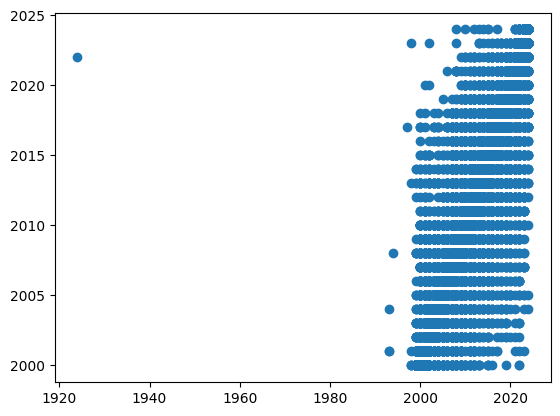

In [27]:
plt.scatter(rhc.year_consult, rhc.year_diag)
plt.show()

**Notes**

* `year_consult` have one outlier data point 1920. Since records started in the 1990's, this may be a typo.
* In the cells below, the value calculated from the dates provided, `consult-diag`, is compared with the value of the dataset variable `consdiag`.
* It can be observed that sometimes `year_consult` is greater than `year_diag`.

In [28]:
df_dates = rhc.copy()
df_dates['consult-diag'] = (rhc.dtdiag - rhc.dtconsult).dt.days

In [29]:
df_dates[['dtconsult', 'dtdiag', 'consult-diag', 'consdiag']]

dtconsult     dtdiag  consult-diag  consdiag
0       2007-10-02 2007-10-03             1         1
1       2014-04-24 2014-05-13            19        19
2       2014-04-08 2014-05-05            27        27
3       2018-09-28 2018-10-10            12        12
4       2020-06-09 2019-08-16          -298       298
...            ...        ...           ...       ...
1257212 2020-11-12 2020-11-12             0         0
1257213 2011-03-09 2011-03-09             0         0
1257214 2011-04-27 2011-07-22            86        86
1257215 2011-06-28 2011-06-28             0         0
1257216 2014-02-24 2013-11-01          -115       115

[1257217 rows x 4 columns]

In [30]:
df_dates[['dtconsult', 'dtdiag', 'consult-diag', 'consdiag']][df_dates.consdiag.isna()]

Empty DataFrame
Columns: [dtconsult, dtdiag, consult-diag, consdiag]
Index: []

In [31]:
# dtconsult > dtdiag
df_dates[['dtconsult', 'dtdiag', 'consult-diag', 'consdiag']][df_dates['year_consult'] > rhc['year_diag']]
# df_dates[['dtconsult', 'dtdiag', 'consult-diag', 'consdiag']][df_dates['dtconsult'] > rhc['dtdiag']]

dtconsult     dtdiag  consult-diag  consdiag
4       2020-06-09 2019-08-16          -298       298
8       2014-01-07 2013-09-04          -125       125
19      2022-02-23 2021-09-24          -152       152
29      2009-03-13 2008-10-01          -163       163
48      2007-01-12 2006-10-31           -73        73
...            ...        ...           ...       ...
1256816 2009-03-23 2008-07-11          -255       255
1256891 2011-01-05 2010-11-26           -40        40
1256961 2011-02-14 2010-12-17           -59        59
1257199 2017-03-20 2016-11-17          -123       123
1257216 2014-02-24 2013-11-01          -115       115

[83406 rows x 4 columns]

In [32]:
# create a new dataframe containing only data from january(1) and february(2) # create a new dataframe containing only data from january(1) and february(2) 
jan_feb_consult = rhc['dtconsult'].dt.month.between(1,2)
df_jan_feb_consult = rhc.loc[jan_feb_consult]

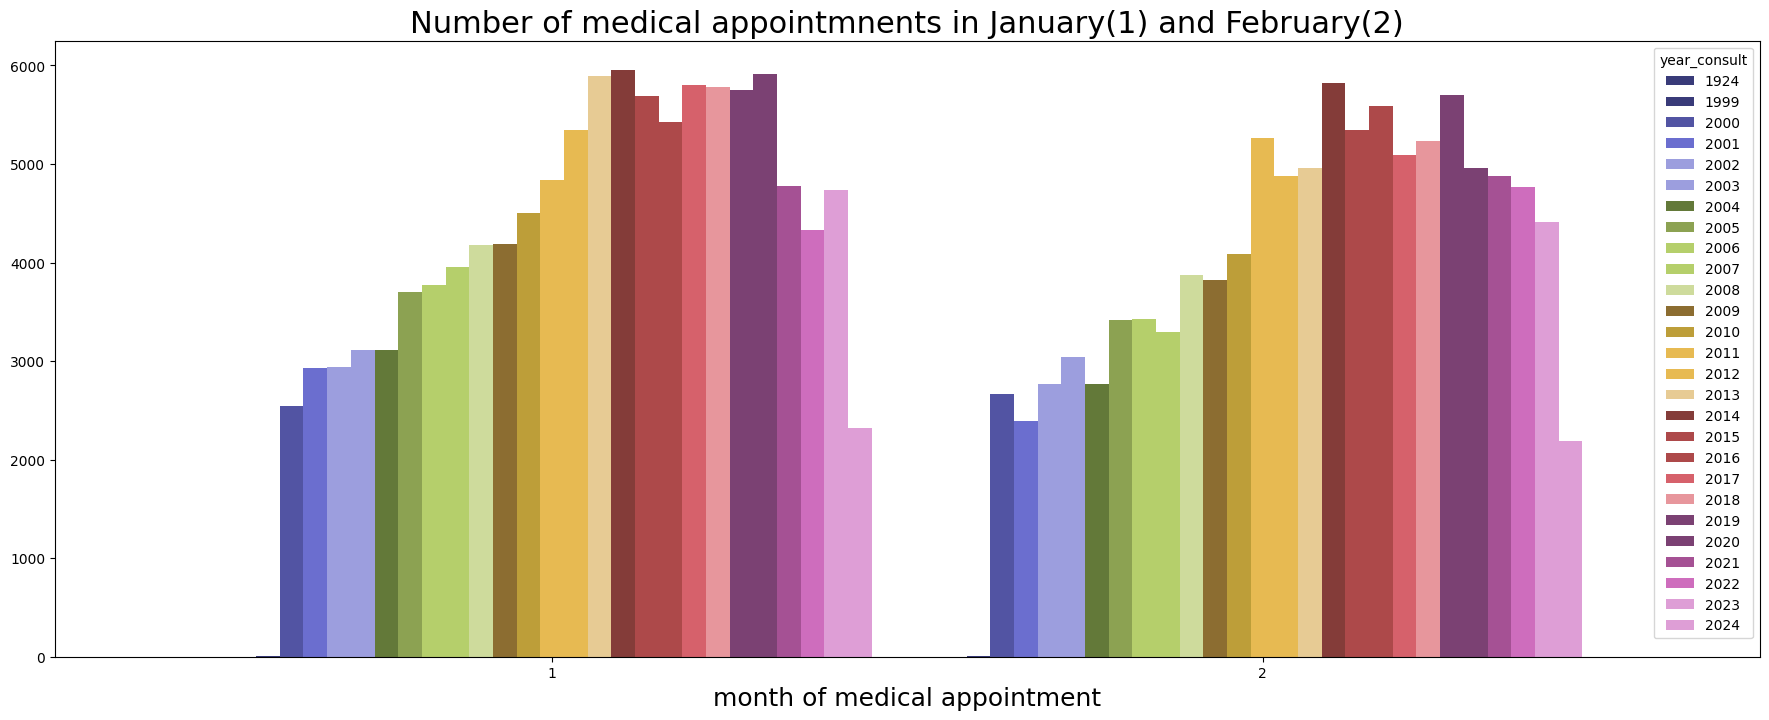

In [33]:
# grouping number o medical appointments during january an february since 2000
df_jan_feb_consult.groupby(['month_consult', 'year_consult']).size().unstack().plot(kind='bar', width=.9, rot=0, stacked=False, figsize=(22,8), colormap='tab20b')
plt.title("Number of medical appointmnents in January(1) and February(2)", fontsize=22)
plt.xlabel("month of medical appointment", fontsize=18)
plt.show()

#### Medical specialty of the first care

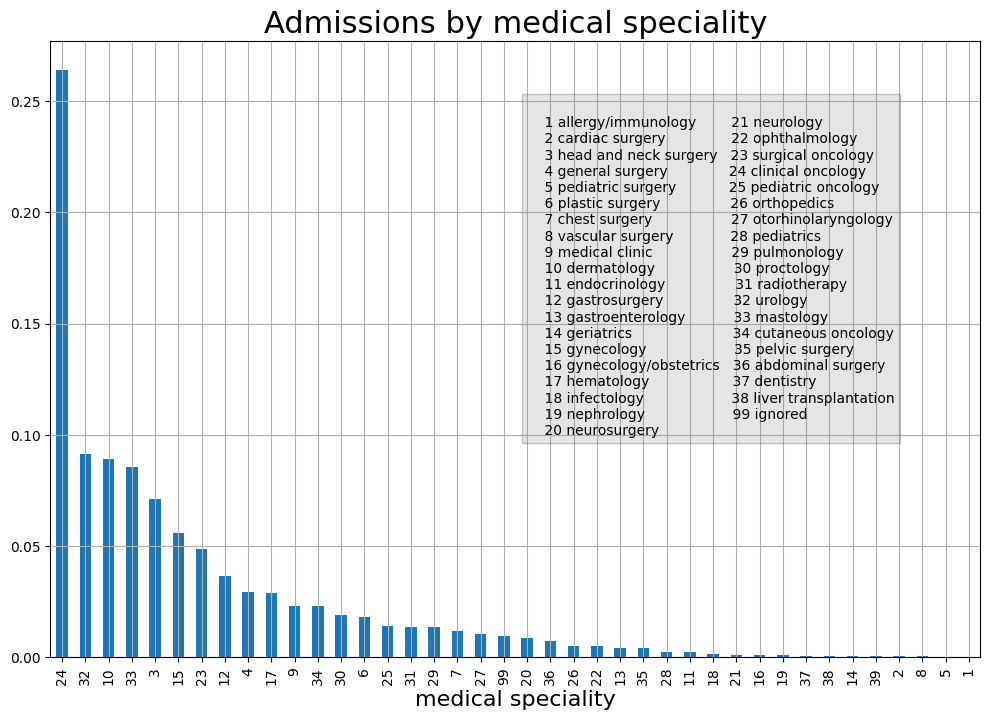

In [34]:
# medical speciality counts
legend_text = medical_speciality()

clinica = rhc['clinica'].value_counts(normalize=True)
clinica.plot.bar(figsize=(12,8))
plt.text(20, 0.1,f'{legend_text}', fontsize = 10, bbox=dict(facecolor='gray', alpha=0.2))
plt.xlabel('medical speciality', fontsize=16)
plt.title("Admissions by medical speciality", fontsize=22)
plt.grid()
plt.show()

#### Medical speciality $\times$ gender

We can compare the medical speciality of the first care with the patient's gender.

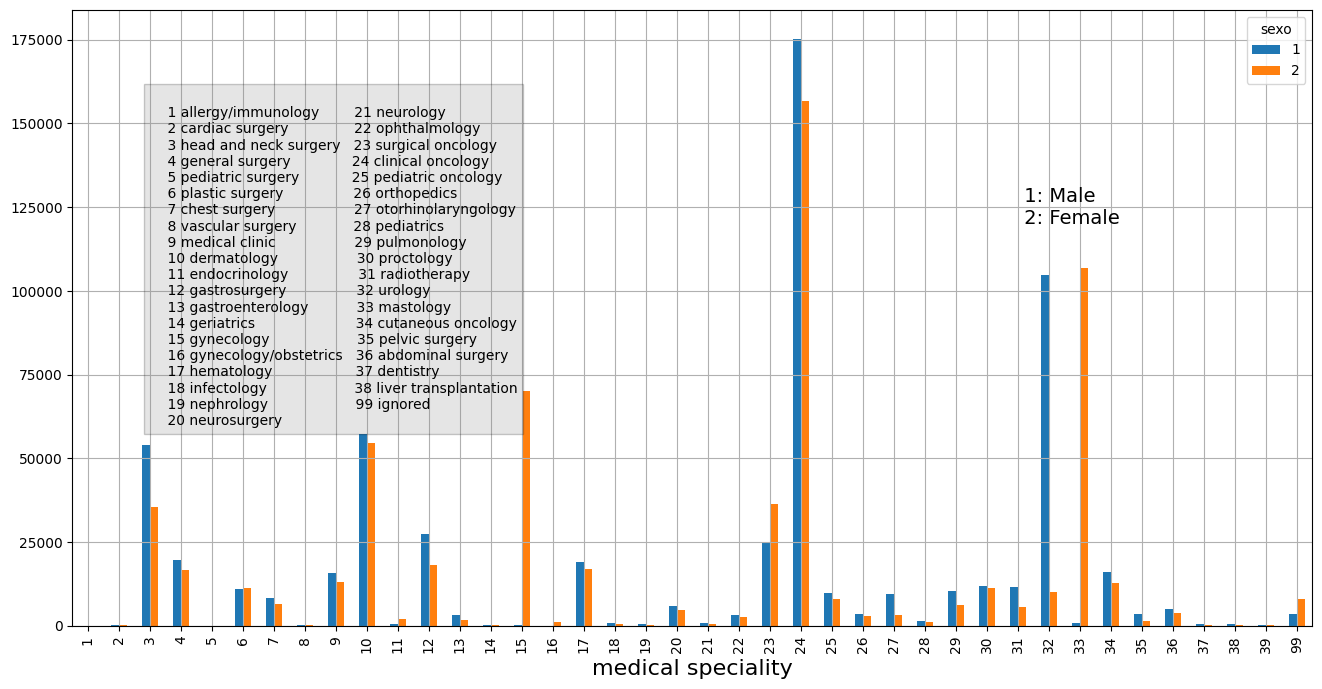

In [35]:
# medical speciality group by gender
rhc.groupby(['clinica', 'sexo']).size().unstack().plot(kind='bar',stacked=False, rot=90, figsize=(16,8))
plt.text(30, 120000,' 1: Male\n 2: Female', fontsize = 14)
plt.text(2, 60000,f'{legend_text}', fontsize = 10, bbox=dict(facecolor='gray', alpha=0.2))
plt.xlabel('medical speciality', fontsize=16)
plt.grid()
plt.show()

#### Medical speciality $\times$ age

In the following three figures, the distribution of the age group by medical speciality can be explored.

For example:
* At medical speciality 10, **dermatology**, the number of entries by gender is similar and the age group peaks at around 73 years.
* At medical speciality 32, **urology**, the predominance of cases is male and the peak is between 66 to 67 years.
* At medical speciality 33, **mastology**, the predominance of cases is female and the peak is located around 49 to 53 years.

Although urology and mastology are more gender-specific we can observe the difference in the age groups of the patients.

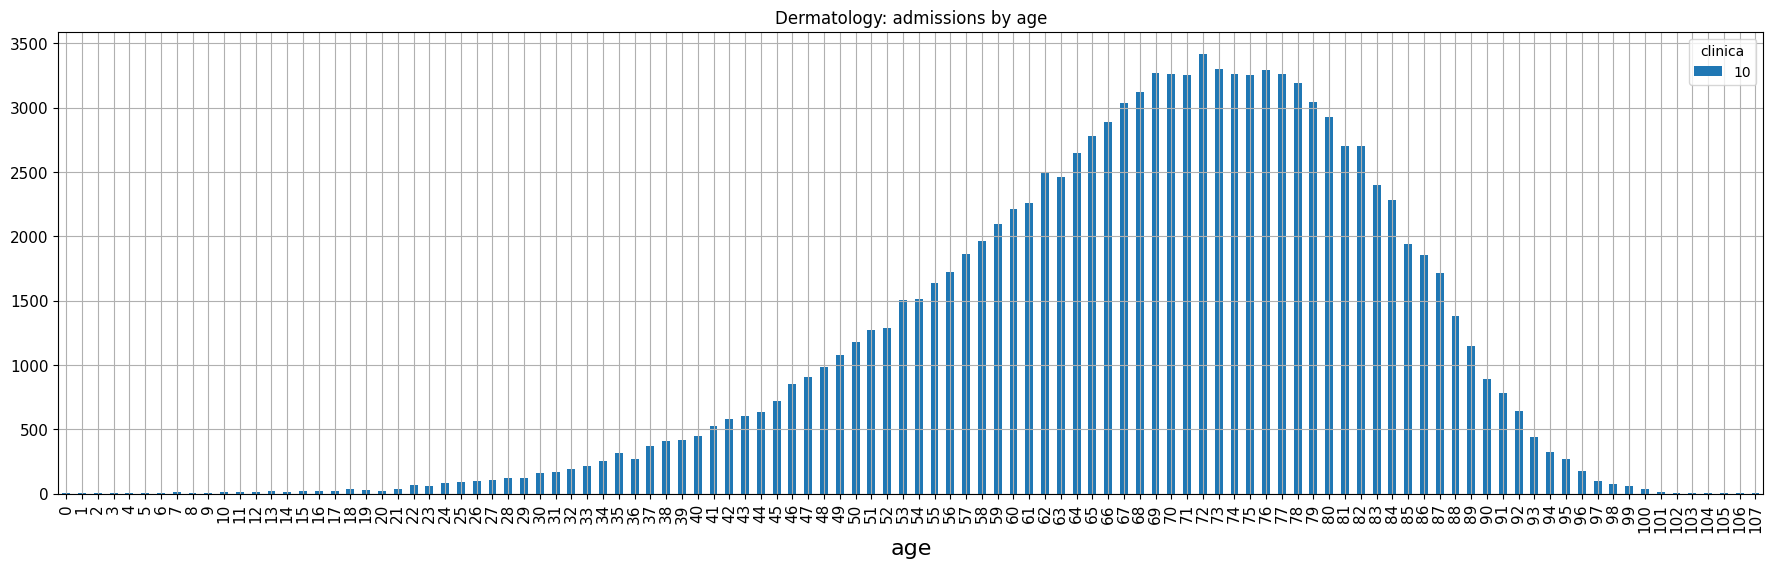

In [36]:
# admitted cases to the medical speciality 10 by age group
onco_10 = rhc.query('9 < clinica < 11')
onco_10.groupby(['idade','clinica']).size().unstack().plot(kind='bar',stacked=False, rot=90, figsize=(22,6), fontsize=11)
plt.title('Dermatology: admissions by age')
plt.xlabel('age', fontsize=16)
plt.grid()
plt.show()

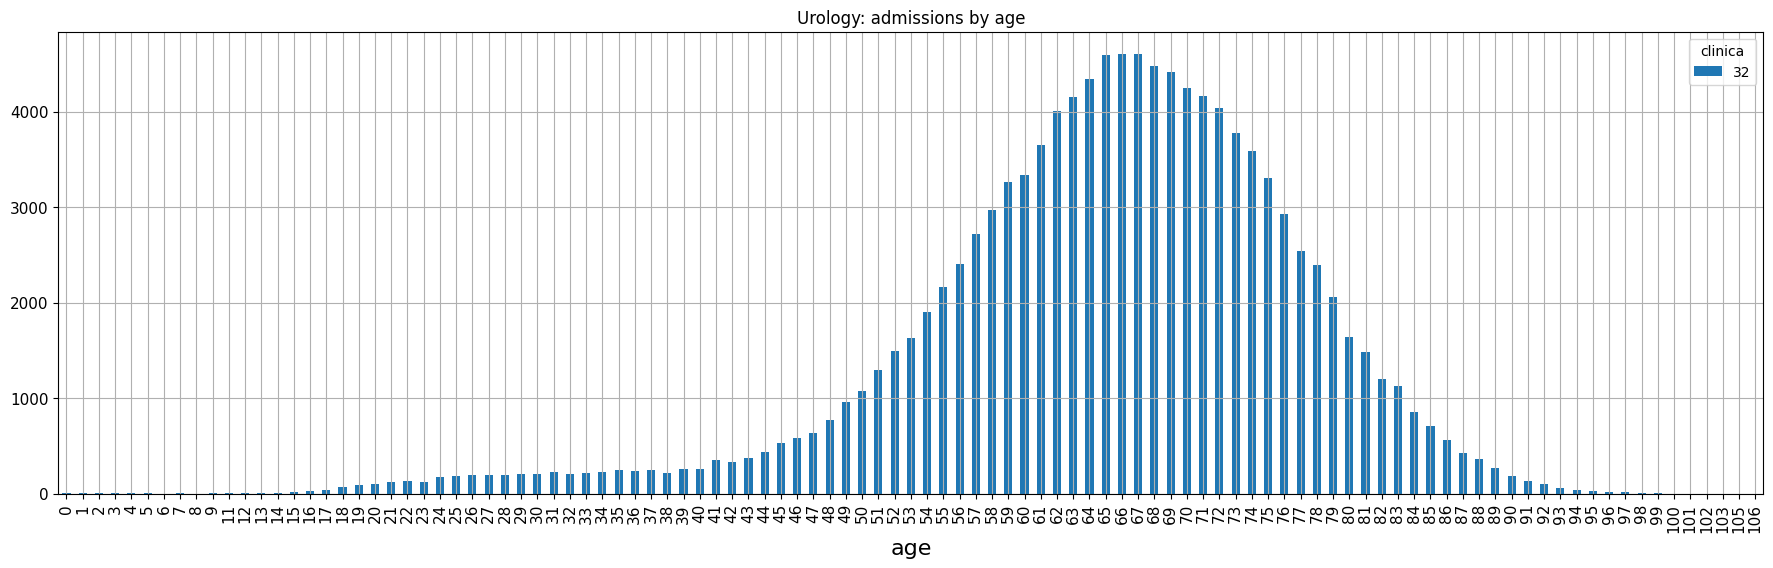

In [37]:
# admitted cases to the medical speciality 32 by age group
onco_32 = rhc.query('31 < clinica < 33')
onco_32.groupby(['idade','clinica']).size().unstack().plot(kind='bar',stacked=False, rot=90, figsize=(22,6), fontsize=11)
plt.title('Urology: admissions by age')
plt.xlabel('age', fontsize=16)
plt.grid()
plt.show()

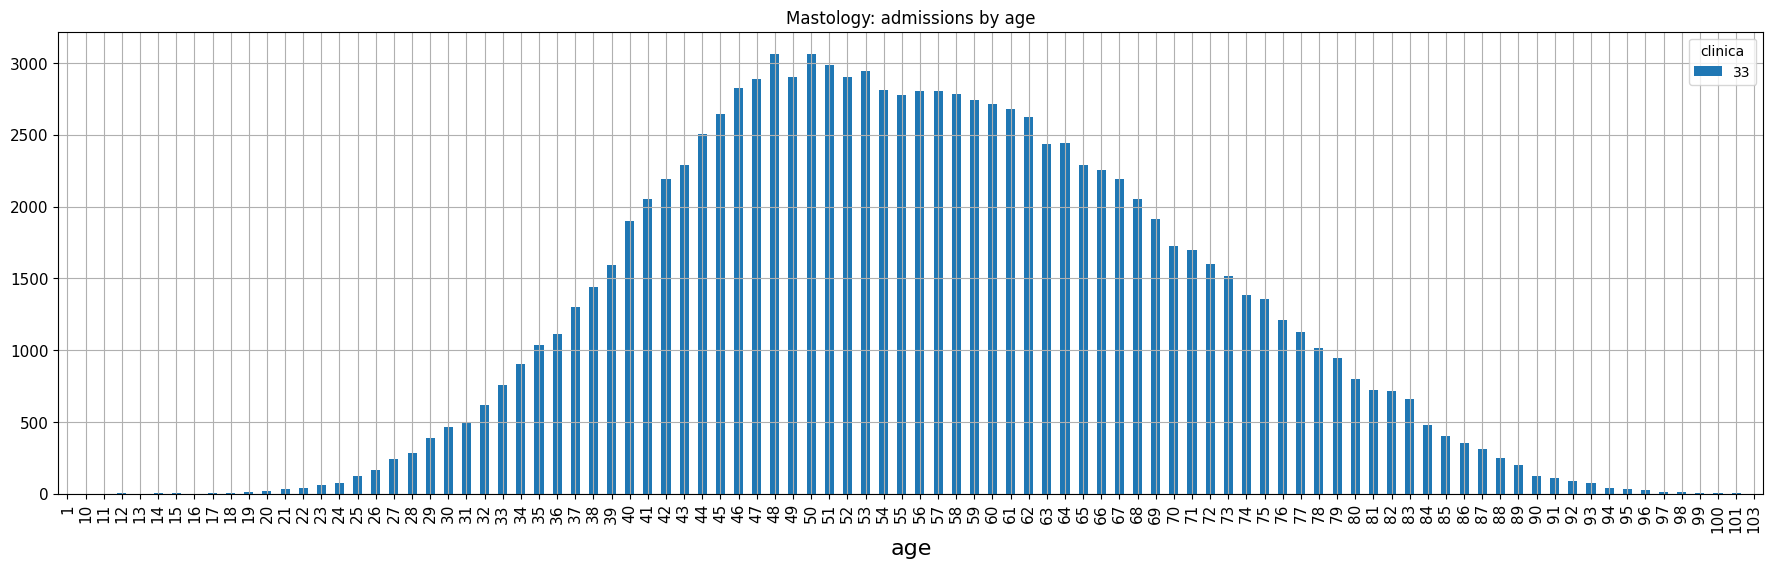

In [38]:
# admitted cases to the medical speciality 33 by age group
onco_33 = rhc.query('32 < clinica < 34')
onco_33.groupby(['idade','clinica']).size().unstack().plot(kind='bar',stacked=False, rot=90, figsize=(22,6), fontsize=11)
plt.title('Mastology: admissions by age')
plt.xlabel('age', fontsize=16)
plt.grid()
plt.show()

If necessary, we can also search in which medical specialities a certain age has checked into most often.

For example, a 1-year-old patient, on average, is admitted more often to the following medical specialities:

* 25 - pediatric oncology
* 28 - pediatrics
* 24 - clinical oncology
* 17 - hematology
* 22 - ophthalmology

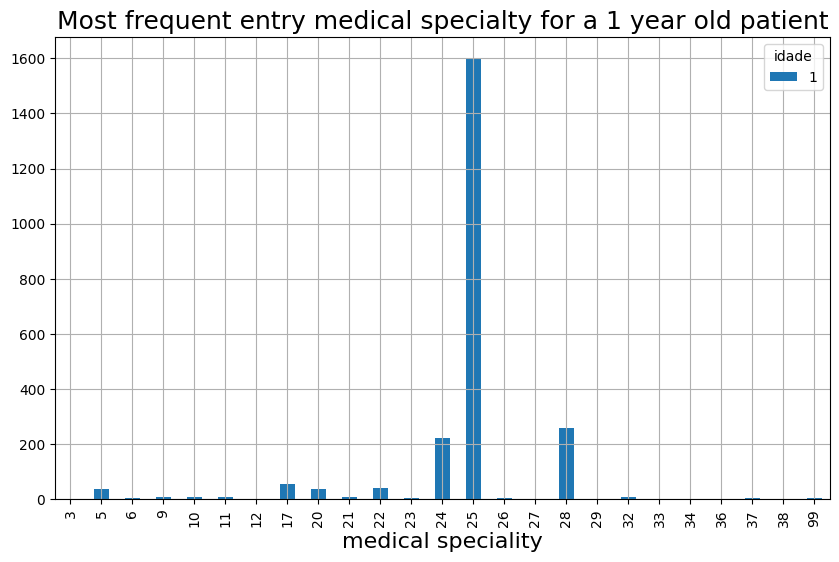

In [39]:
# admitted cases to medical specialities by the age of 1 year old
onco_0_2 = rhc.query('0 < idade < 2 ')
onco_0_2.groupby(['clinica','idade']).size().unstack().plot(kind='bar',stacked=False, rot=90, figsize=(10,6))
plt.title('Most frequent entry medical specialty for a 1 year old patient', fontsize=18)
plt.xlabel('medical speciality', fontsize=16)
plt.grid()
plt.show()

#### Previous diagnosis and treatment

The database documentation states that the `diagprev` attribute can have four values, with the following meanings:
* 1 - without diagnosis/without treatment
* 2 - with diagnosis/without treatment
* 3 - with diagnosis/with treatment
* 4 - others

However, in the dataset, this variable has only two distinct values:
* 1 - without diagnosis/without treatment
* 2 - with diagnosis/without treatment

In [40]:
# normalize count for attribute diagprev
rhc['diagprev'].value_counts(normalize=True)

diagprev
1    0.596802
2    0.403198
Name: proportion, dtype: float64

#### Diagnosis date

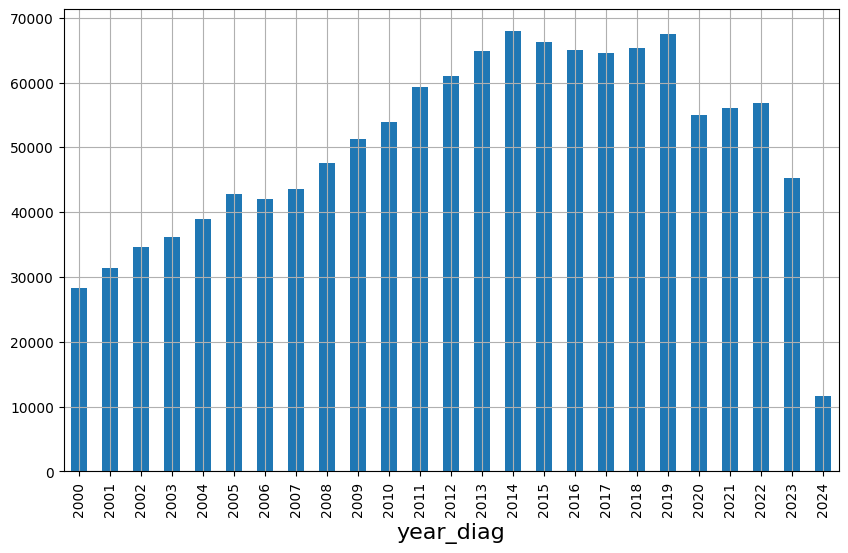

In [41]:
# diagnosis date
year_diag = rhc['year_diag'].value_counts(normalize=False).sort_index(ascending=True)
plt.xlabel('diagnosis date ', fontsize=16)
year_diag.plot.bar(figsize=(10,6))
plt.grid()
plt.show()

#### Type of diagnosis

The possible values for the `basediag` attribute are:
* 1 - clinical examination
* 2 - non-microscopic auxiliary resources
* 3 - microscopic confirmation
* 4 - no information

The database documentation states that the value `4` is used if there is no information available. However, in the dataset, we do not have 4 but `9`instead.

In [42]:
# normalized count for basediag
rhc['basediag'].value_counts(normalize=True).sort_values(ascending=False)

basediag
3    0.982089
2    0.015092
1    0.001934
9    0.000885
Name: proportion, dtype: float64

In [43]:
md(f"About {round(rhc['basediag'].value_counts(normalize=True).sort_values(ascending=False)[3], 3)*100}% of diagnoses were made by microscopic confirmation.")

About 98.2% of diagnoses were made by microscopic confirmation.

#### Topography

The topography, `topo`, indicates where the tumor arose. In the dataset it is distributed among **331** different codes (according to an international classification of diseases), with approximately 24 topographies showing values above 1%. 

The top four topographies, regarding the number of cases are:
* C619 - malignant prostate cancer
* C443 - malignant neoplasm of the skin of other parts and unspecified parts of the face
* C509 - malignant neoplasm of breast, unspecified (except breast skin)
* C539 - cervical malignancy, unspecified

Topographies are also aggregated in topography groups that have in common the region where the tumor arose. They are represented by the feature `topogrup`.

In [44]:
rhc['topo'].nunique()

331

In [45]:
# values above 4% for the attribute topo
rhc['topo'].value_counts(normalize=False)[rhc['topo'].value_counts(normalize=True) > 0.01]

topo
C619    131437
C443    128606
C509     63146
C539     54319
C421     44073
C504     42801
C446     39059
C209     37034
C445     33099
C739     29938
C508     27371
C349     25546
C444     22189
C169     20670
C649     20357
C447     19409
C341     16563
C541     16506
C809     16316
C679     15359
C569     15033
C187     14598
C442     13518
C441     13308
Name: count, dtype: int64

In [46]:
rhc['topo'].value_counts(normalize=False)[rhc['topo'].value_counts(normalize=False) > 1000].shape

(117,)

In [47]:
rhc['topogrup'].value_counts(normalize=False)[rhc['topogrup'].value_counts(normalize=True) > 0.01]

topogrup
C44    287132
C50    174308
C61    131437
C34     58598
C53     57974
C18     49448
C42     47092
C16     45242
C20     37034
C73     29939
C77     22890
C67     22614
C15     22295
C64     20357
C32     19349
C54     19107
C80     16316
C25     16150
C56     15033
C71     14843
Name: count, dtype: int64

In [48]:
rhc['topogrup'].value_counts(normalize=False)[rhc['topogrup'].value_counts(normalize=False) > 1000].shape

(55,)

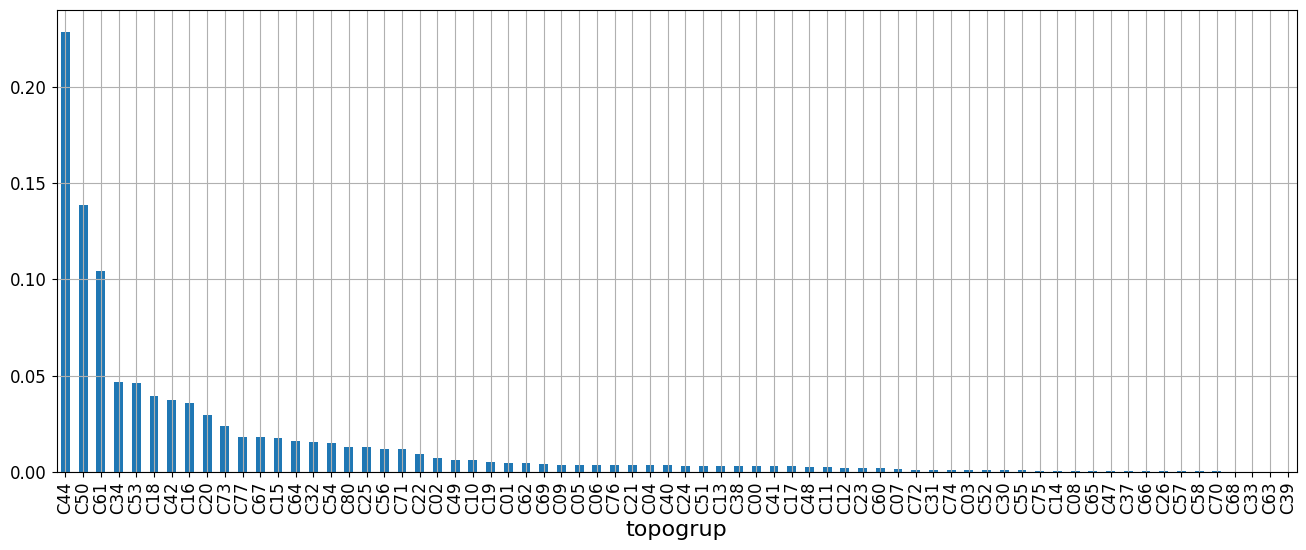

In [49]:
# topography groups
topogrup = rhc['topogrup'].value_counts(normalize=True).sort_values(ascending=False)
plt.xlabel('topography group', fontsize=16)
topogrup.plot.bar(figsize=(16,6), fontsize=12)
plt.grid()
plt.show()

In [50]:
# number of topography groups
rhc['topogrup'].nunique()

70

In [51]:
# values above 4% for the attribute topogrup
rhc['topogrup'].value_counts(normalize=True)[rhc['topogrup'].value_counts(normalize=True) > 0.04]

topogrup
C44    0.228387
C50    0.138646
C61    0.104546
C34    0.046609
C53    0.046113
Name: proportion, dtype: float64

The grouping of topographies in the feature `topogrup` reduces the number of variables (tumor codes) to **70**, as can be seen in the figure above. 

Some of the most frequent group types are:
* C44 - skin
* C50 - breast
* C61 - prostate
* C53 - cervix

The next two figures illustrate how we can cross-check information such as topography and the year of diagnosis in different ways:
1. different topographies observed in 2021
2. frequent occurrences of a specific topography

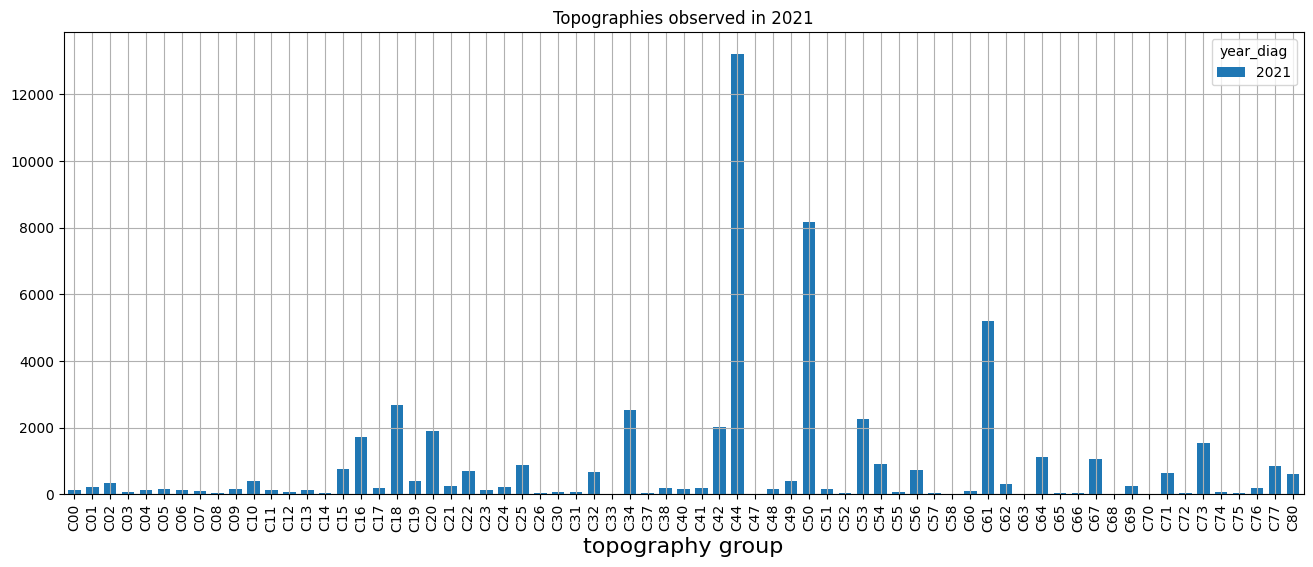

In [52]:
# list of topography groups by year of diagnosis

onco_datadiag = rhc.query('2020 < year_diag < 2022 ')
onco_datadiag.groupby(['topogrup', 'year_diag']).size().unstack().plot(kind='bar',stacked=False, rot=90, width=0.7, figsize=(16,6))
plt.title('Topographies observed in 2021')
plt.xlabel('topography group', fontsize=16)
plt.grid()
plt.show()

#### Morphology

The morphology represents the characteristics of the tumor, including its cell type and biological activity.

The morphology codes with values above 5% are:

* 80703 - Squamous cell carcinoma, SOE
* 81403 - Adenocarcinoma, SOE
* 80903 - Basal cell carcinoma, SOE
* 85003 - Papillary carcinoma, SOE
* 85503 - Acinous cell carcinoma      

**SOE** = no other specification

In [53]:
# morfology counts above 5%
rhc['morfo'].value_counts(normalize=True)[rhc['morfo'].value_counts(normalize=True)>0.05]

morfo
80703    0.152572
81403    0.139629
85003    0.098976
80903    0.088895
85503    0.067065
Name: proportion, dtype: float64

In [54]:
# datapoints where descmorfo values are missing
rhc[rhc['descmorfo'].isna()]

Empty DataFrame
Columns: [institu, escolari, idade, sexo, ufnasc, ufresid, ibge, cidade, cateatend, dtconsult, clinica, diagprev, dtdiag, basediag, topo, topogrup, desctopo, morfo, descmorfo, ec, ecgrup, t, n, m, pt, pn, pm, s, g, localtnm, idmitotic, psa, gleason, outracla, meta01, meta02, meta03, meta04, dttrat, naotrat, tratamento, trathosp, tratfantes, tratfapos, nenhum, cirurgia, radio, quimio, hormonio, tmo, imuno, outros, nenhumant, cirurant, radioant, quimioant, hormoant, tmoant, imunoant, outroant, nenhumapos, cirurapos, radioapos, quimioapos, hormoapos, tmoapos, imunoapos, outroapos, dtultinfo, ultinfo, consdiag, tratcons, diagtrat, anodiag, cici, cicigrup, cicisubgru, faixaetar, laterali, instorig, drs, rras, perdaseg, erro, dtrecidiva, recnenhum, reclocal, recregio, recdist, rec01, rec02, rec03, rec04, dscinst, ibgeaten, drs_inst, rras_inst, cidade_ins, cido, descido, ...]
Index: []

#### Clinical staging and TNM classification

To stage a tumor is to assess its degree of spread. In [this article](https://cancerstaging.org/references-tools/deskreferences/Documents/Principles%20of%20Cancer%20Staging.pdf), you can learn more about the **principles of cancer staging**.

The various names of tumors can be grouped into classes that produce an international nomenclature system.

In clinical tumor staging, cancer cases are divided into groups, according to so-called stages. The staging coding ranges from 0 to IV, being:
* 0 - Primary tumors, classified as in situ
* I - Localized tumors
* II - Tumors with regional involvement by direct extension
* III - Tumors with regional lymph node involvement
* IV - Tumors with distant metastasis

The letters A and B are related to the absence/presence of symptoms (weight loss, fever, sweating).

The letter C is the certainty factor (C-factor), and it represents the intensity of the studies and the validity of the classification:
* C1, confirmation by standard diagnostic means; 
* C2, confirmation by special diagnostic means; 
* C3, confirmation by surgical exploration (including biopsy and cytology); 
* C4, confirmation by the extent of disease following definitive surgery and pathological examination; 
* C5, confirmation by autopsy.


The basis for coding most tumors is the **Classification of malignant tumors** (TNM). Through the TNM system it is possible to describe a clinical extension of the malignant tumor, based on the evaluation of three components:
* T - Extension of the primary tumor
* N - Absence or presence and extension of metastases in regional lymph nodes
* M - Absence or presence of distant metastasis

Each component has a numerical variation:
* T = 0, 1, 2, 3, 4;
* N = 0, 1, 2, 3
* M = 0, 1

In situations where it is not possible to use the TNM classification or the tumor has not been evaluated, the codes used are:
* X - tumors cannot be covered by the professional or by ready information
* Y - tumors for which the TNM classification does not apply, for example, non-heavy tumors, such as leukemias

The combination of letters and numbers provides more accurate information on the extent of the disease for each anatomical location.

In the present data set, the clinical stage `ec` presents 30 distinct records, which when grouped in the` ecgrup`, result in 7 categories. The TNM classification is found in the columns `t`,`n` and `m`.

In [55]:
# clinical staging: number of unique values
rhc['ec'].nunique()

30

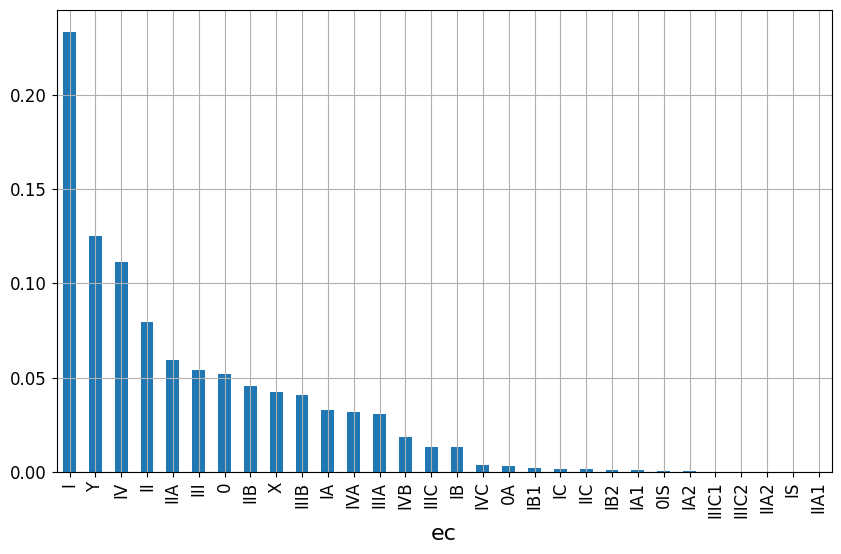

In [56]:
# clinical staging
staging = rhc['ec'].value_counts(normalize=True).sort_values(ascending=False)
plt.xlabel('clinical staging', fontsize=16)
staging.plot.bar(figsize=(10,6), fontsize=12)
plt.grid()
plt.show()

In [57]:
# clinical staging per group
rhc['ecgrup'].nunique()

7

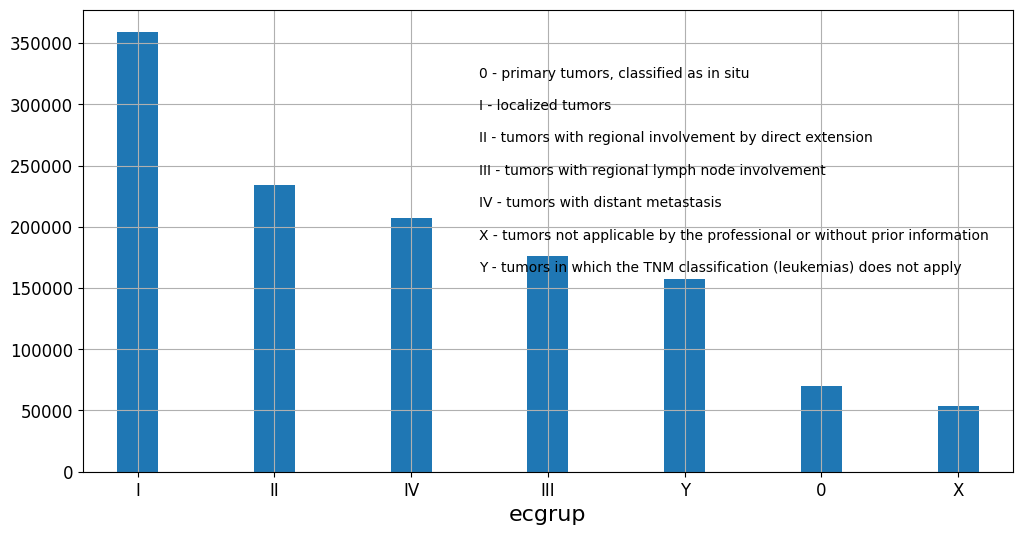

In [58]:
# clinical staging group
staging_group = rhc['ecgrup'].value_counts(normalize=False).sort_values(ascending=False)
plt.xlabel('clinical staging group', fontsize=16)
staging_group.plot.bar(figsize=(12,6), rot=0, width=0.3, fontsize=12)
plt.text(2.5, 150000,''' 
0 - primary tumors, classified as in situ \n
I - localized tumors \n
II - tumors with regional involvement by direct extension \n
III - tumors with regional lymph node involvement \n
IV - tumors with distant metastasis \n
X - tumors not applicable by the professional or without prior information \n
Y - tumors in which the TNM classification (leukemias) does not apply
''', fontsize = 10)
plt.grid()
plt.show()

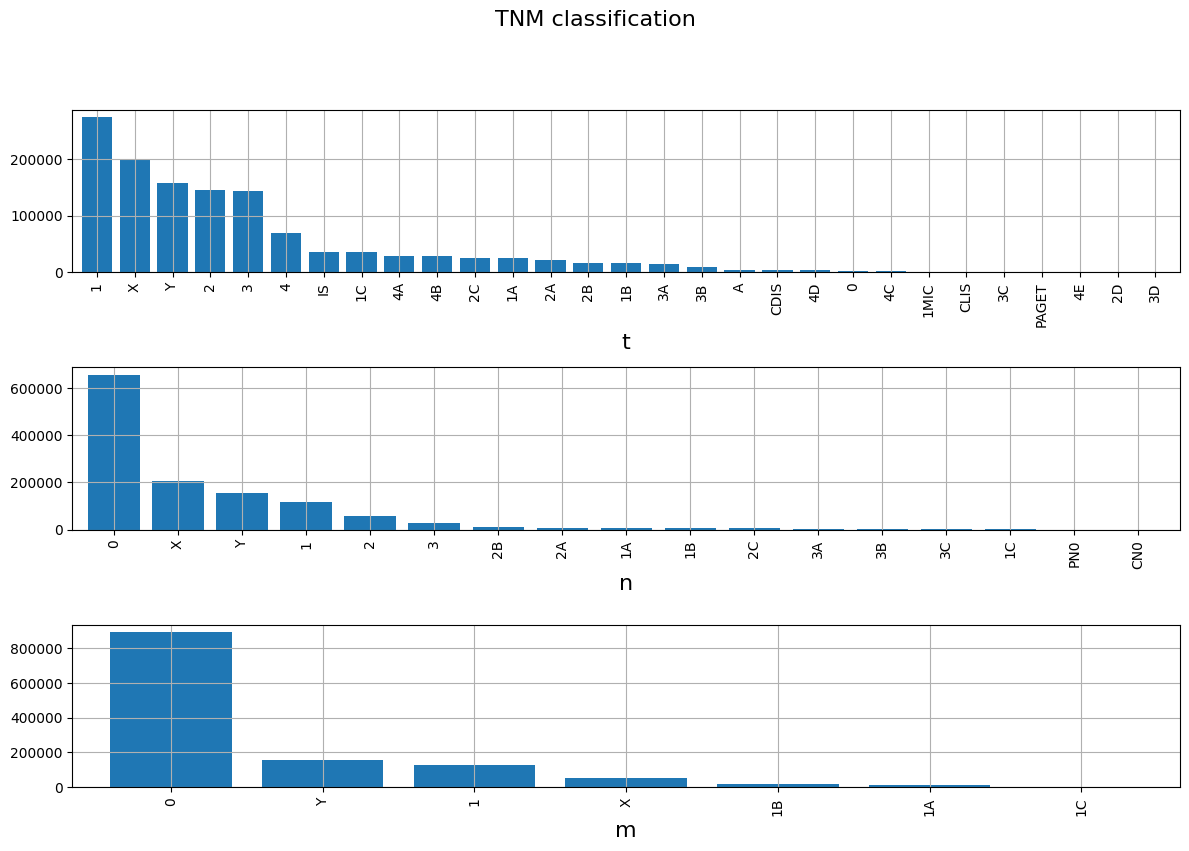

In [59]:
# TNM staging
tnm = ['t', 'n', 'm']

fig = plt.figure()
num = 0

fig.suptitle('TNM classification', fontsize=16, y=1.05)

for item in tnm:
    num += 1
    counts = rhc[item].value_counts(normalize=False)
    ax = fig.add_subplot(4,1,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=0.8,figsize=(12,10), fontsize=10)
    plt.grid()

plt.tight_layout()
#plt.savefig('treatments.jpg')
plt.show()

#### Post-surgical staging (pTNM)

This represents the histopathological classification based on additional evidence obtained through surgery and histological examination.

Considering the three types of pTNM staging, there are some characters that do not fit the existing classifications and suggest an error in filling the field:
* `pt`:`< ... `
* `pn`:`< .`
* `pm`:`< ... `


Although the number of occurrences in these variables is not the same, the values are very similar. Did the character sets mentioned above have been misspelled almost 2000 times?

In [60]:
# post surgical staging
rhc['pt'].value_counts()

pt
1        121778
X        115976
2         58988
Y         48533
3         47444
IS        22434
1C        15179
1A        14607
4         14266
2C        12679
1B        10908
2A         6676
4A         6596
2B         6241
3A         5787
4B         5282
0          4883
3B         3734
A          2566
< ...      1883
CDIS       1542
4D          593
3C          453
1MIC        359
1A1         294
1B1         264
CLIS        212
4C          141
1B2         106
1A2          51
PAGET        18
4E            3
2b            2
T3B           2
T1C           2
T2            2
3a            1
PIS           1
T1A           1
T1B           1
T4B           1
y             1
4b            1
IC            1
T3            1
Name: count, dtype: int64

In [61]:
# post surgical staging
rhc['pm'].value_counts()

pm
0      294930
X      122644
Y       47981
1       19234
1A       2044
< .      1895
1B       1725
1C        142
M0          6
Name: count, dtype: int64

In [62]:
# post surgical staging
rhc['pn'].value_counts()

pn
0        262352
X        138192
Y         48288
1         39457
2         14247
3          4166
1A         3479
2A         3454
1B         2811
2B         2763
< ...      1891
3A         1276
2C          775
1C          420
3B          208
3C           79
PN0           4
N0            3
1B1           1
O             1
2c            1
N3            1
IBII          1
N2B           1
N1            1
Name: count, dtype: int64

In [63]:
# number of patients who underwent surgery
rhc[rhc['trathosp'] == 'A'].shape[0]

471001

The pTNM classification doesn't apply to patients who did not underwent surgery.

#### Degree of classification, g

In [64]:
md(f"About {round(rhc['g'].value_counts(normalize=True).iloc[0].item(), 3)} of the values consist of 8 (not applicable")

About 0.96 of the values consist of 8 (not applicable

In [65]:
rhc['g'].value_counts(normalize=True)

g
8    0.959768
9    0.014247
3    0.009594
2    0.008683
1    0.004332
4    0.003376
Name: proportion, dtype: float64

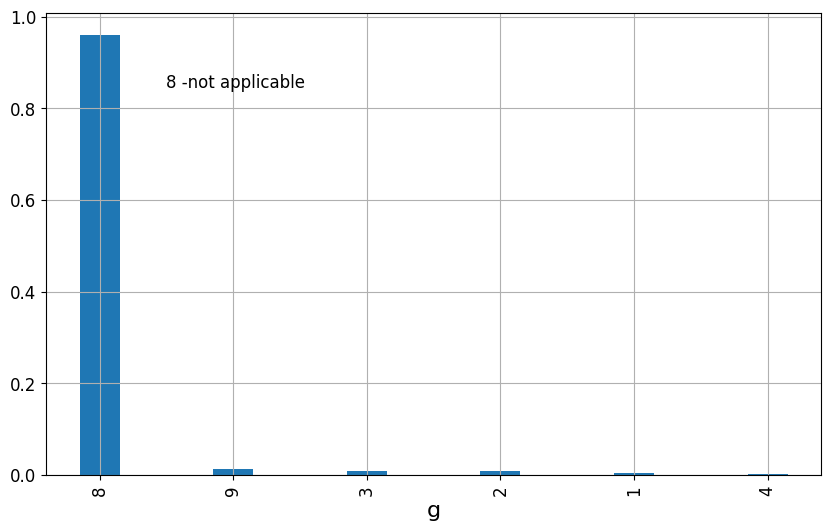

In [66]:
# classification degree
g_degree = rhc['g'].value_counts(normalize=True).sort_values(ascending=False)
plt.xlabel('degree of classification, g', fontsize=16)
g_degree.plot.bar(figsize=(10,6), width=0.3, fontsize=12)
plt.text(0.5, 0.8,''' 
8 -not applicable
''', fontsize = 12)
plt.grid()
plt.show()

#### TNM location

Classification 8 means 'not applicable'.

In [67]:
rhc['localtnm'].value_counts(normalize=True)

localtnm
8    0.993486
2    0.002951
9    0.001755
1    0.000916
3    0.000892
Name: proportion, dtype: float64

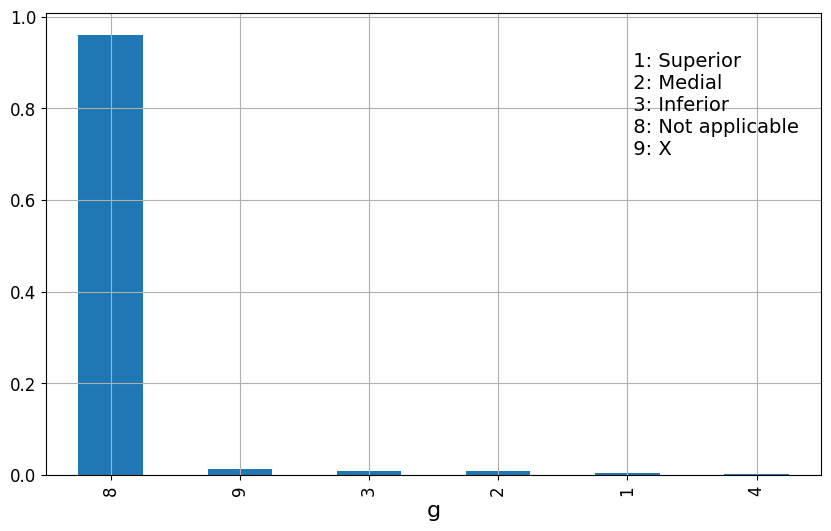

In [68]:
# location
location = rhc['localtnm'].value_counts(normalize=True).sort_values(ascending=False)
plt.xlabel('location', fontsize=16)
g_degree.plot.bar(figsize=(10,6), fontsize=12)
plt.text(4.0, 0.7,' 1: Superior\n 2: Medial\n 3: Inferior\n 8: Not applicable\n 9: X', fontsize = 14)
plt.grid()
plt.show()

#### Mitotic index

The mitotic index gives the capacity of cells to divide and the rate of cell division. It is useful to identify the sites of growth within a tissue and to determine which cell types are dividing.

The mitotic index values in the data set are:
* 1 - high
* 2 - low
* 8 - not applicable
* 9 - X

In [69]:
rhc['idmitotic'].value_counts(normalize=True)

idmitotic
8    0.999091
2    0.000556
1    0.000250
9    0.000103
Name: proportion, dtype: float64

#### PSA (prostate specific antigen)

Variable associated with prostate cancer. The PSA test determines the level of an enzyme, produced by the prostate, in the blood.

* 1 - less than 10
* 2 - greater than or equal to 10 and less than 20
* 3 - greater than or equal to 20
* 8 - not applicable
* 9 - X

In this case, it is expected most of the cases (see below) are not prostate cancer, once they are rated as "not applicable".

For the existing cases, most have a concentration below 10.

In [70]:
rhc['psa'].value_counts(normalize=True)

psa
8    0.950102
1    0.027073
2    0.009606
3    0.008623
9    0.004596
Name: proportion, dtype: float64

#### Gleason

Variable also associated with prostate cancer. A [Gleason](https://www.prostateconditions.org/about-prostate-conditions/prostate-cancer/newly-diagnosed/gleason-score) scale is a score given in prostate cancer based on its microscopic appearance (biopsy).
* 1 - less than or equal to 6
* 2 - equal to 7
* 3 - greater than or equal to 8
* 8 - not applicable
* 9 - X

As in the PSA, most of cases are expected to be non-prostate cancer.

Most of the confirmed cases are rated as 7 and 6 or less.

In [71]:
rhc['gleason'].value_counts(normalize=True)

gleason
8    0.950102
2    0.022172
1    0.013555
3    0.010386
9    0.003786
Name: proportion, dtype: float64

#### Other classifications: `outracla`

In the column `outracla`("other classifications"), specific international classifications, other than TNM, are included, for example,
* FIGO (gynecological tumors)
* Ann Arbor (Hodgking's lymphoma)
* RAI (leukemia)
* CIN (cervical neoplasia)
* ISS (multiple myeloma)
* Clark (skin cancer)
* and others.

Looking more closely, the unique values are widely distributed, i.e., none of which have a high count. However, when analyzing the column, it is observed that the number of individual entries may be much smaller than the one found. This happens because there was no uniformity in filling in the field since the same entry was written in many different ways.

For example: 
* `GRAU 2` (where grau means degree) was written as `GRAU II`, `G II`, `G2`, `G 2`, `GRAU  II`, `GRAUII`, `GRAU2`, `GRAU   2`, and more. 
* Classifications with foreign names like Bormmann may appear as `BORMANN`, `BORMAN`, `BORRMANN`, `BORMAM`, `BORMAN`, and more. 
* Considering also the variation in the number of spaces between characters, it is noted how the number of single items can increase significantly due to operator errors, due to the free-fill-in field.

Having in mind the above issues, the most frequent value is `GRAU II`. Applying filters to eliminate different graphs, the count of this classification is more than doubled.

In [72]:
# number of unique values in the feature outracla
rhc['outracla'].describe()

count      73545
unique      8427
top       GRAU 2
freq        6613
Name: outracla, dtype: object

In [73]:
# top five counts for outcla var
rhc['outracla'].value_counts().head(9)

outracla
GRAU 2       6613
GRAU II      6023
GRAU 3       4971
GRAU III     4171
GRAU 1       3930
GRAU I       2962
GLEASON 6    1816
GLEASON 7    1742
G II         1182
Name: count, dtype: int64

We can cross the data of the features `outracla` with` topo` and compare the classifications attributed to the topologies. 

Since the `outracla` column contains a lot of null data, we can use the `.notnull ()` method to filter the desired results.

In [74]:
# select columns outracla & topo in a new dataframe
onco_selection = rhc.loc[:,['outracla','topo']][rhc['outracla'].notnull()]
onco_selection

outracla  topo
4           EC4 PT4 PN2 PN0  C028
43                        I  C619
63                    81453  C509
88                    G III  C119
130                      IV  C349
...                     ...   ...
1256276      GRAU NUCLEAR 3  C504
1256287  CLARK 3 BRESLOW 03  C445
1256296     TRIPLO NEGATIVO  C501
1256334       GLEASON 10 55  C619
1257193        GLEASON 6274  C619

[73545 rows x 2 columns]

The new dataframe can be used to filter the data using any keyword (_substring_). In the example below, a chosen _substring_ is `GRAU`.

In [75]:
# creates a new dataframe with outracla and topo with instances containing the substring GRAU
outracla_grau_only = onco_selection.loc[:,['outracla','topo']][onco_selection['outracla'].str.contains('GRAU')]
outracla_grau_only

outracla  topo
714                    GRAU 1  C509
1042       T2N0MX GRAU HIST 3  C679
1608                   GRAU 2  C163
2022                   GRAU 3  C509
2957     T1NXMX GRAU HISTOP 2  C509
...                       ...   ...
1256084       GRAU NUCLEAR II  C506
1256106        GRAU NUCLEAR 3  C501
1256187        GRAU NUCLEAR 3  C504
1256243        GRAU NUCLEAR 3  C504
1256276        GRAU NUCLEAR 3  C504

[31393 rows x 2 columns]

It is also possible to determine the frequency of the values that present the substring `GRAU` present in` outracla`.

In [76]:
# counts of classification GRAU in outracla
outracla_grau_only['outracla'].value_counts()

outracla
GRAU 2                  6613
GRAU II                 6023
GRAU 3                  4971
GRAU III                4171
GRAU 1                  3930
                        ... 
T2N0MX GRAU III SBR        1
ALTO GRAU FISH NEG         1
TXN2MX GRAU HISTOL 2       1
GRAU 4 OMS                 1
GRAU III OMS               1
Name: count, Length: 461, dtype: int64

As noted earlier, it is observed that the number of unique entries may be much lower since the same entry was entered in different ways. 

In addition, some substrings that could be used to filter the data are mixed with other classifications, adding another difficulty in separating the variables.

The same procedure applied above can be repeated with another substrings. Below is an example using  the `GLEASON` substing.

In [77]:
# creates a new dataframe with outracla and topo with instances containing the substring GLEASON
outracla_gleason_only = onco_selection.loc[:,['outracla','topo']][onco_selection['outracla'].str.contains('GLEASON')]
outracla_gleason_only

outracla  topo
2369        T3NXMX GLEASON 8  C619
3119               GLEASON 7  C619
27524       GLEASON 7  PSA 2  C619
27877       T2N0MX GLEASON 7  C619
28393    GLEASON 6PSA:  0096  C619
...                      ...   ...
1256125            GLEASON 5  C619
1256157            GLEASON 6  C619
1256184           GLEASON 10  C619
1256334        GLEASON 10 55  C619
1257193         GLEASON 6274  C619

[7253 rows x 2 columns]

In the Gleason score, two grades are assigned for each patient regarding the tumor areas. The first number represent the cells that make up the largest area of the tumor, the second one represent the cells of the next largest area. This can lead to the following combinations:
* Gleason 3+3=6 
* Gleason 3+4=7 
* Gleason 4+3=7 
* Gleason 4+4=8 
* Gleason 3+5=8 
* Gleason 5+3=8
* Gleason 4+5=9 
* Gleason 5+4=9 
* Gleason 5+5=10 

In addition, to each combination can also be attributed a grade, for example:
* Grade 1 (Gleason 6)
* Grade 2 (Gleason 3+4=7)
* Grade 3 (Gleason 4+3=7)
* Grade 4 (Gleason 8)
* Grade 5 (Gleason 9-10)

In the dataset this can appear in very different ways.

In [78]:
# counts of classification GLEASON in outracla
outracla_gleason_only['outracla'].value_counts()

outracla
GLEASON 6             1816
GLEASON 7             1742
GLEASON 6 33           333
GLEASON 9              295
GLEASON 8              281
                      ... 
PSA 1703 GLEASON 7       1
GLEASON 6 PSA 5          1
PSA 13 GLEASON 7         1
GLEASON 6 PSA 521        1
GLEASON 7  PSA 65        1
Name: count, Length: 501, dtype: int64

354 cases were found with the substring `GLEASON`

In [79]:
# unique values for GLEASON in outracla with counts greater than 10
outracla_gleason_only['outracla'].value_counts()[outracla_gleason_only['outracla'].value_counts() > 10].nunique()

36

By filtering data that contains 10 or more entries for the `GLEASON` substring, the number of occurrences has decreased from more than 300 to aroud 30. Again, note (see the figure below) that there is no uniformity when filling the 'outracla' field.

This irregular filling pattern is repeated throughout the column. Other examples are presented below, such as the substrings FIGO and BORMAN, remembering that this graph may have other variations not detected by this search pattern.

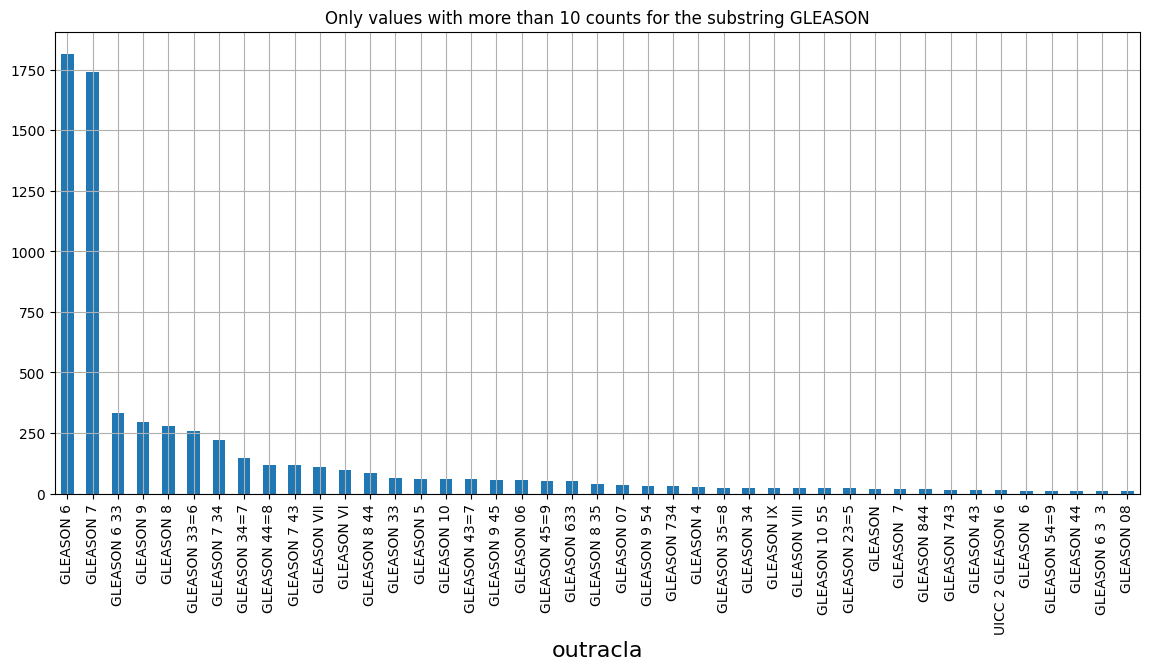

In [80]:
# plot of GLEASON with counts greater than 10
gleason = outracla_gleason_only['outracla'].value_counts()[outracla_gleason_only['outracla'].value_counts() > 10]
plt.xlabel("outracla (substring GLEASON)", fontsize=16)
gleason.plot.bar(figsize=(14,6))
plt.title('Only values with more than 10 counts for the substring GLEASON')
plt.grid()
plt.show()

In [81]:
# creates a new dataframe with outracla and topo with instances containing the substring FIGO
outracla_figo_only = onco_selection.loc[:,['outracla','topo']][onco_selection['outracla'].str.contains('FIGO')]
outracla_figo_only

outracla  topo
773           FIGO IC  C541
2091         FIGO IIC  C569
2475         FIGO IIA  C541
3193         FIGO IA2  C539
24815       FIGO IIIC  C569
...               ...   ...
1212295  EC IIIC FIGO  C569
1214233       FIGO IB  C541
1220057       FIGO IB  C539
1222950  EC FIGO IIIC  C541
1227266      FIGO IIB  C539

[1489 rows x 2 columns]

In [82]:
# counts of classification FIGO in outracla
outracla_figo_only['outracla'].value_counts()

outracla
EC FIGO 0               75
FIGO IB                 67
EC FIGO IB              59
FIGO 0                  57
EC FIGO IIIC            51
EC FIGO IIB             42
EC FIGO IIIB            42
FIGO IIIC               36
EC IIIC FIGO            34
EC FIGO IA              32
FIGO IA                 29
EC IB FIGO              26
FIGO                    23
FIGO IIIB               22
EC 0 FIGO               21
FIGO IIB                21
FIGO IC                 20
EC FIGO IC              19
FIGO IIA                18
EC IIIB FIGO            18
EC 0  FIGO              17
EC IIIC  FIGO           16
EC FIGO IIIA            16
EC IV FIGO              15
EC IA FIGO              14
EC IB  FIGO             13
EC FIGO IV              13
EC IB1 FIGO             13
FIGO II                 12
FIGO IV                 12
EC IV  FIGO             12
EC IIB FIGO             12
EC FIGO IIA             12
EC FIGO IVA             11
FIGO I                  10
EC IIIB  FIGO            9
FIGO IB1           

In [83]:
# creates a new dataframe with outracla and topo with instances containing the substring BORMAN
outracla_bormann_only = onco_selection.loc[:,['outracla','topo']][onco_selection['outracla'].str.contains('BORMAN')]

In [84]:
# counts of classification BORMAN in outracla
outracla_bormann_only['outracla'].value_counts()

outracla
BORMAN III              32
BORMANN III             22
BORMAN IV               20
BORMAN II               12
BORMANN IV               5
BORMANN II               3
BORMANN 2                2
BORMANN 3                2
BORMAN                   2
BORMAN I                 2
BORMANN IV INFILTRAT     1
BORMANN III  II C        1
GRAU II BORMANN IV       1
BORMANN TIPO III         1
GRAU III  BORMANN IV     1
TIPO II FR BORMAN        1
BORMANN                  1
BORMANN I                1
BORMAN  III              1
Name: count, dtype: int64

In [85]:
# search for specific terms in outracla column
rhc[rhc['outracla'].astype(str).str.contains("GLOMERU")]

institu  escolari  idade  sexo ufnasc ufresid       ibge  \
819840    18597         4     28     2     SP      SP  3541000.0   

              cidade  cateatend  dtconsult  clinica  diagprev     dtdiag  \
819840  PRAIA GRANDE          2 2015-12-30        9         1 2016-03-03   

        basediag  topo topogrup      desctopo  morfo  \
819840         2  C421      C42  MEDULA OSSEA  97603   

                            descmorfo ec ecgrup  t  n  m   pt   pn   pm  s  g  \
819840  DOENCA IMUNOPROLIFERATIVA SOE  Y      Y  Y  Y  Y  NaN  NaN  NaN  8  8   

        localtnm  idmitotic  psa  gleason              outracla meta01 meta02  \
819840         8          8    8        8  GLOMERULONEFRITE LUP    NaN    NaN   

       meta03 meta04     dttrat  naotrat tratamento trathosp tratfantes  \
819840    NaN    NaN 2016-03-04        8          C        C          J   

       tratfapos  nenhum  cirurgia  radio  quimio  hormonio  tmo  imuno  \
819840         J       0         0      0       1         0    0      0   

        outros  nenhumant  cirurant  radioant  quimioant  hormoant  tmoant  \
819840       0          1         0         0          0         0       0   

        imunoant  outroant  nenhumapos  cirurapos  radioapos  quimioapos  \
819840         0         0           1          0          0           0   

        hormoapos  tmoapos  imunoapos  outroapos  dtultinfo  ultinfo  \
819840          0        0          0          0 2023-04-06        2   

        consdiag  tratcons  diagtrat  anodiag cici cicigrup cicisubgru  \
819840        64      65.0       1.0     2016  NaN      NaN        NaN   

       faixaetar  laterali instorig                       drs     rras  \
819840     20-29         8      NaN  DRS 04  Baixada Santista  RRAS 07   

        perdaseg  erro dtrecidiva  recnenhum  reclocal  recregio  recdist  \
819840         0     0        NaT          1         0         0        0   

       rec01 rec02 rec03 rec04                     dscinst  ibgeaten  \
819840   NaN   NaN   NaN   NaN  BENEF PORTUGUESA DE SANTOS   3548500   

                        drs_inst rras_inst cidade_ins     cido  \
819840  DRS 04  Baixada Santista   RRAS 07     SANTOS  97603.0   

                               descido  habilit  \
819840  DOENCA IMUNOPROLIFERATIVA, SOE        2   

                                   habit11  habilit1  habilit2  year_consult  \
819840  UNACON com Serviço de Radioterapia         1         1          2015   

        year_diag  year_ultinfo  year_recidiva  year_trat  month_consult  
819840       2016        2023.0           <NA>       2016             12

In [86]:
# locating an specific entry
grouped = rhc.groupby('outracla')
grouped.get_group("CLARK V BRESLOW 7 MM")

institu  escolari  idade  sexo ufnasc ufresid       ibge cidade  \
793445    21636         1     90     2     SP      SP  3555000.0   TUPA   

        cateatend  dtconsult  clinica  diagprev     dtdiag  basediag  topo  \
793445          9 2009-12-04       23         1 2009-12-18         3  C447   

       topogrup                              desctopo  morfo  \
793445      C44  PELE DO QUADRIL E MEMBROS INFERIORES  87443   

                                            descmorfo    ec ecgrup   t   n  m  \
793445  MELANOMA LENTIGINOSO MALIGNO DAS EXTREMIDADES  IIIB    III  4B  1A  0   

        pt  pn pm  s  g  localtnm  idmitotic  psa  gleason  \
793445  4B  1A  0  8  8         8          8    8        8   

                    outracla meta01 meta02 meta03 meta04     dttrat  naotrat  \
793445  CLARK V BRESLOW 7 MM    NaN    NaN    NaN    NaN 2009-12-18        8   

       tratamento trathosp tratfantes tratfapos  nenhum  cirurgia  radio  \
793445          A        A          J         J       0         1      0   

        quimio  hormonio  tmo  imuno  outros  nenhumant  cirurant  radioant  \
793445       0         0    0      0       0          1         0         0   

        quimioant  hormoant  tmoant  imunoant  outroant  nenhumapos  \
793445          0         0       0         0         0           1   

        cirurapos  radioapos  quimioapos  hormoapos  tmoapos  imunoapos  \
793445          0          0           0          0        0          0   

        outroapos  dtultinfo  ultinfo  consdiag  tratcons  diagtrat  anodiag  \
793445          0 2010-08-15        3        14      14.0       0.0     2009   

       cici cicigrup cicisubgru faixaetar  laterali instorig              drs  \
793445  NaN      NaN        NaN       70+         2      NaN  DRS 09  Marilia   

           rras  perdaseg  erro dtrecidiva  recnenhum  reclocal  recregio  \
793445  RRAS 10         0     0        NaT          1         0         0   

        recdist rec01 rec02 rec03 rec04               dscinst  ibgeaten  \
793445        0   NaN   NaN   NaN   NaN  HOSP AMARAL CARVALHO   3525300   

             drs_inst rras_inst cidade_ins     cido  \
793445  DRS 06  Bauru   RRAS 09        JAU  87443.0   

                                              descido  habilit  \
793445  MELANOMA LENTIGINOSO MALIGNO DAS EXTREMIDADES        7   

                                          habit11  habilit1  habilit2  \
793445  CACON com Serviço de Oncologia Pediátrica         3         2   

        year_consult  year_diag  year_ultinfo  year_recidiva  year_trat  \
793445          2009       2009        2010.0           <NA>       2009   

        month_consult  
793445             12

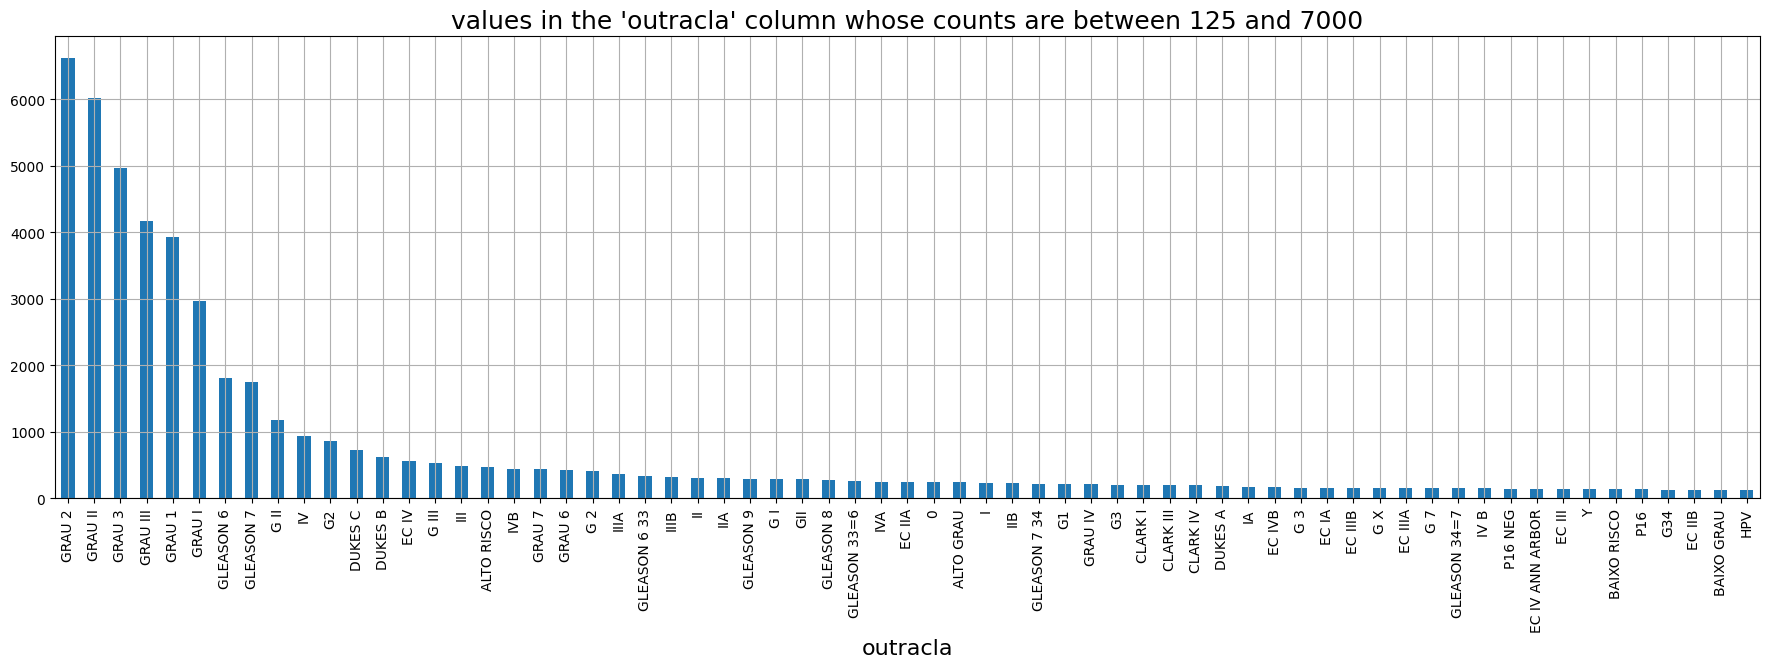

In [87]:
# plot of column outracla entries with counts between 125 and 7000.
(rhc['outracla']
    .value_counts(normalize=False)[((rhc['outracla']
    .value_counts(normalize=False) >= 125) & (rhc['outracla']
    .value_counts(normalize=False) <= 7000))]
    .plot.bar(figsize=(22,6))
    )
plt.xlabel("outracla", fontsize=16)
plt.title("values in the 'outracla' column whose counts are between 125 and 7000", fontsize=18)
plt.grid()
plt.show()

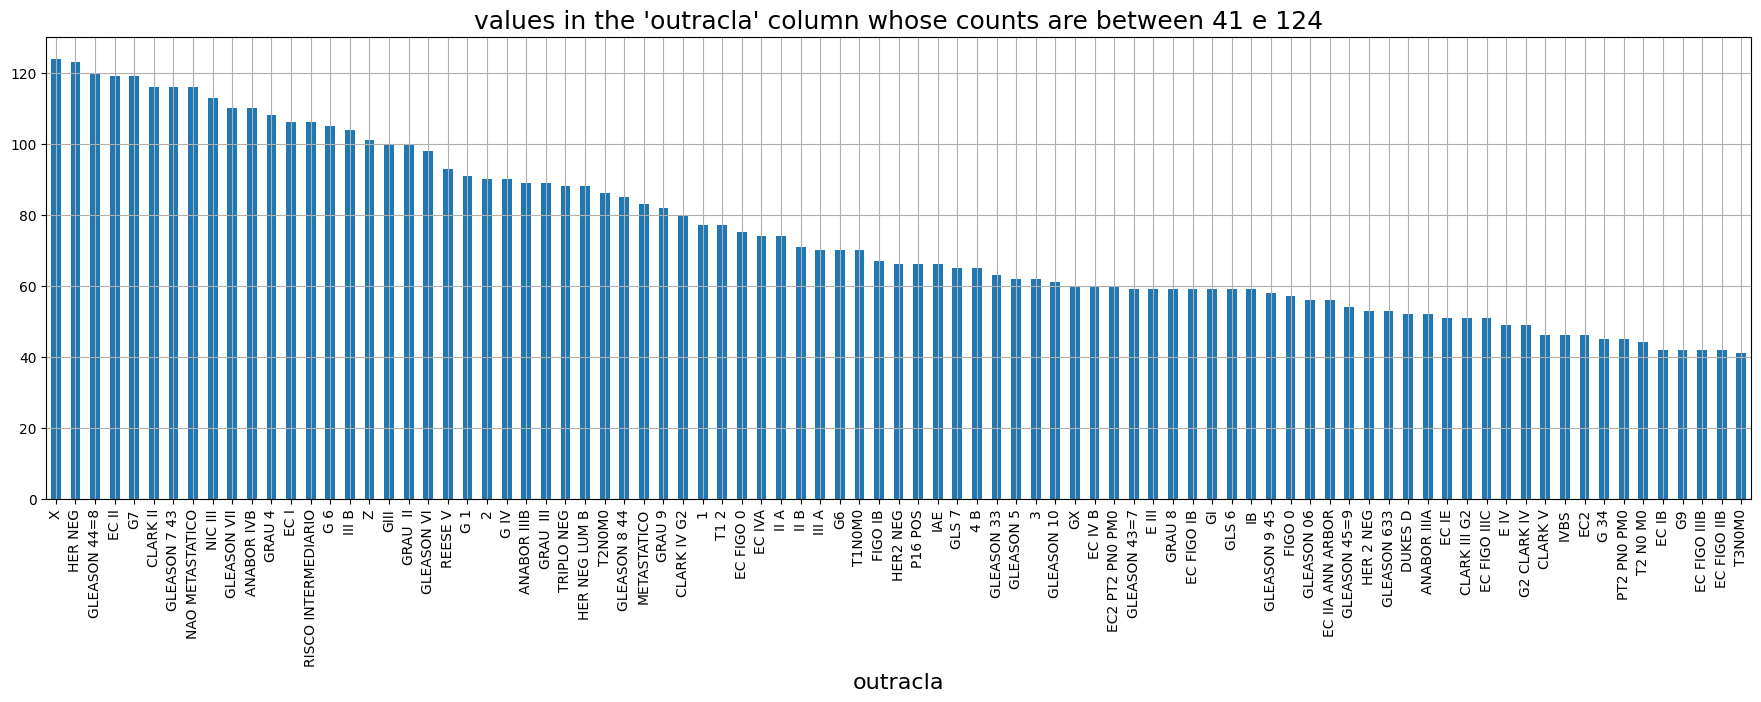

In [88]:
# plot of column outracla entries with counts between 41 and 124.
(rhc['outracla']
    .value_counts(normalize=False)[((rhc['outracla']
    .value_counts(normalize=False) >= 41) & (rhc['outracla']
    .value_counts(normalize=False) <= 124))]
    .plot.bar(figsize=(22,6))
    )
plt.xlabel("outracla", fontsize=16)
plt.title("values in the 'outracla' column whose counts are between 41 e 124", fontsize=18)
plt.grid()
plt.show()

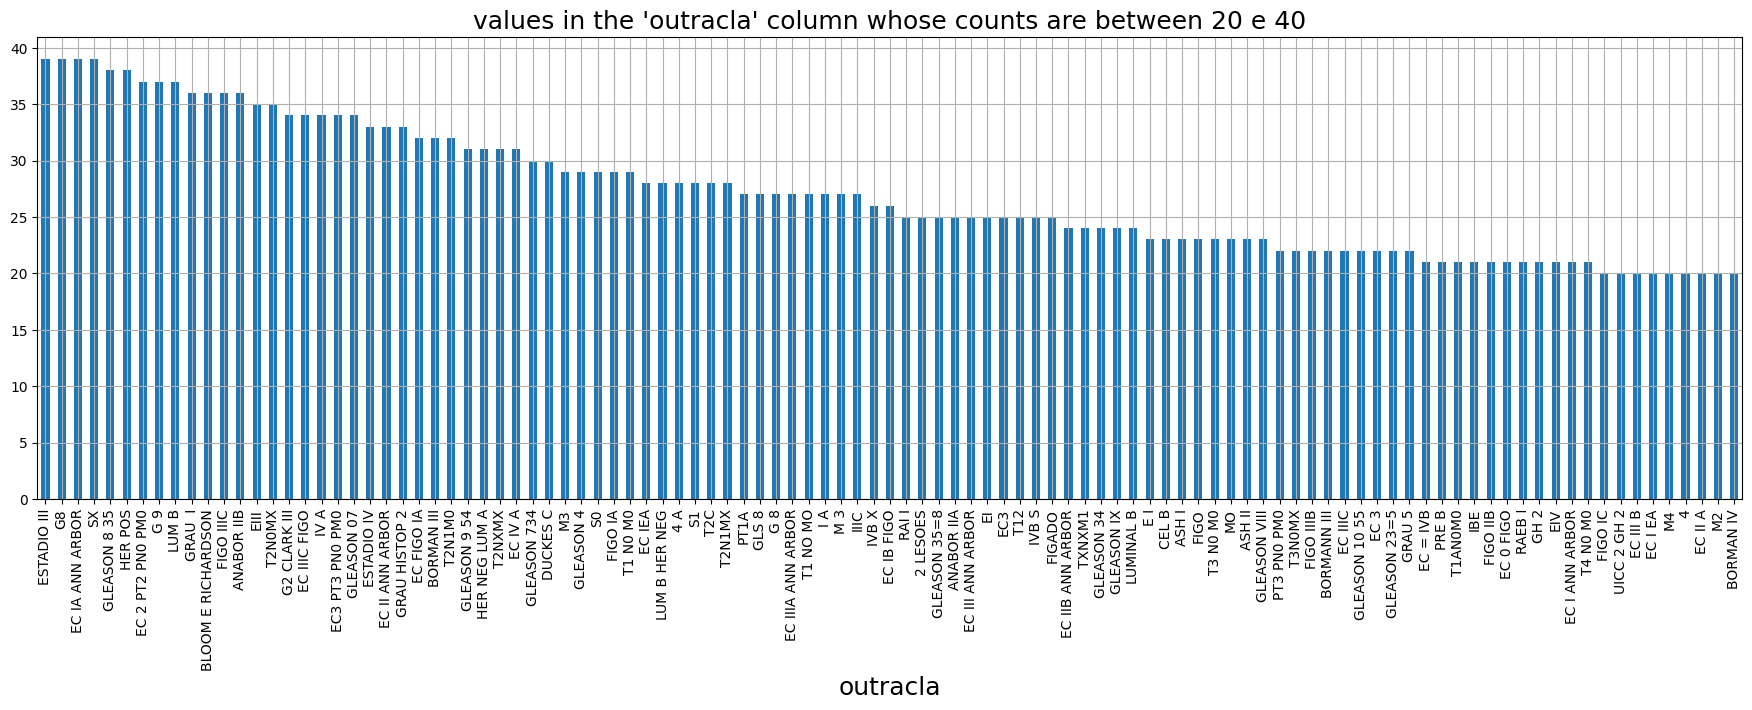

In [89]:
# plot of column outracla entries with counts between 20 and 40.
(rhc['outracla']
    .value_counts(normalize=False)[((rhc['outracla']
    .value_counts(normalize=False) >= 20) & (rhc['outracla']
    .value_counts(normalize=False) <= 40))]
    .plot.bar(figsize=(22,6))
    )
plt.xlabel("outracla", fontsize=18)
plt.title("values in the 'outracla' column whose counts are between 20 e 40", fontsize=18)
plt.grid()
plt.show()

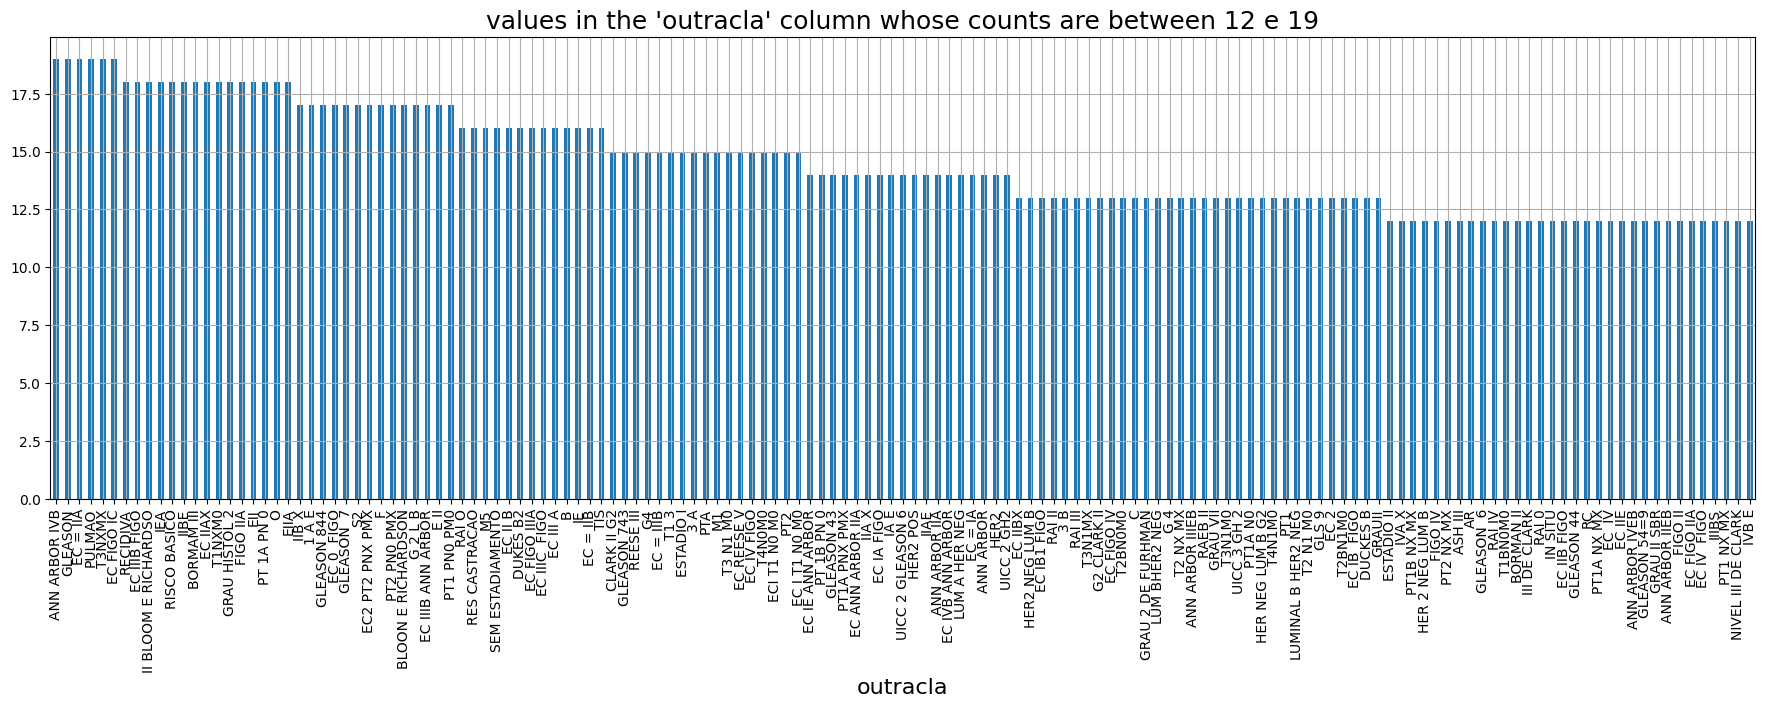

In [90]:
# plot  of column outracla entries with counts between 12 and 19.
(rhc['outracla']
    .value_counts(normalize=False)[((rhc['outracla']
    .value_counts(normalize=False) >= 12) & (rhc['outracla']
    .value_counts(normalize=False) <= 19))]
    .plot.bar(figsize=(22,6))
    )
plt.xlabel("outracla", fontsize=16)
plt.title("values in the 'outracla' column whose counts are between 12 e 19", fontsize=18)
plt.grid()
plt.show()

In [91]:
# unique values of column outracla entries with counts between 2 and 11.
(rhc['outracla']
    .value_counts(normalize=False)[((rhc['outracla']
    .value_counts(normalize=False) >= 2) & (rhc['outracla']
    .value_counts(normalize=False) <= 11))]
)

outracla
PT1C PN0 PMX            11
GLEASON 6 3  3          11
T4N1MX                  11
T4N1M1                  11
HER2 PURO               11
                        ..
GRA I                    2
CLARKIII BRESLOW 1MM     2
ESTADIO B                2
PT2PN2PM0                2
SEIO ENDODERMICO         2
Name: count, Length: 1792, dtype: int64

In [92]:
# # unique values of column outracla entries with counts equal to 1.
(rhc['outracla']
    .value_counts(normalize=False)[(rhc['outracla']
    .value_counts(normalize=False) == 1)]
)

outracla
CLARK IIBRESLOW 02    1
T2NXMX UICC3 GH2      1
T2NXM0 UICC 3         1
TX N2B MO             1
GLEAOSN 6             1
                     ..
B 8 MM CLARK IV       1
FISH HER2             1
GLEASON 6 34          1
CLARK III B12 MM      1
HER2FISH NEGLUM B     1
Name: count, Length: 6231, dtype: int64

##### Remarks on `outracla`

The `outracla` columns contains unique information about specific types of cancer, so it seems important to retrieve this data.

In `outracla` column, with a total of 6048 non-zero values, has the following characteristics:

In [93]:
md(f"""
{count_entries_outracla(125, 7000, rhc)} entries with unique values (counts) between 125 and 7000\n
{count_entries_outracla(41, 124, rhc)} entries with unique values between 41 and 124\n
{count_entries_outracla(20, 40, rhc)} entries with unique values between 20 and 40\n
{count_entries_outracla(12, 19, rhc)} entries with unique values between 12 and 19\n
{count_entries_outracla(2, 11, rhc)} entries with unique values between 2 and 11\n
{count_entries_outracla(1, 1, rhc)} entries with 1 unique value\n
{rhc['outracla'].nunique()} unique values in the 'outracla'")
""")


65 entries with unique values (counts) between 125 and 7000

87 entries with unique values between 41 and 124

105 entries with unique values between 20 and 40

147 entries with unique values between 12 and 19

1792 entries with unique values between 2 and 11

6231 entries with 1 unique value

8427 unique values in the 'outracla'")


Although there is a range of tumor classifications, they do not add up to this amount of unique values observed.

A **possible solution** to reduce this number would be to create filters using regular expressions, for example, to identify the different substrings of interest, to later standardize the nomeclature by correcting input errors. However the lack of a pattern when filling the field can lead to loss of information. A better approach could be to separate the dataset by topography groups and then try to filter the values with the help of this knowledge.

Considering that this field stores unique and important information may be it would be helpful to design a new approach when collecting the data. Taking into account that the errors are made by the user when filling in the form, this problem could be solved by implementing, for example a drop-down menu instead of a free-fill field form or even creating new columns for specific cancer classifications.

#### Indication of metastases

Metastasis is the spread of cancer cells to new regions of the body.

In the dataset, there are four classifications filled with CID-O coding (an international classification system), they are represented by the columns:
* `meta01`
* `meta02`
* `meta03`
* `meta04`

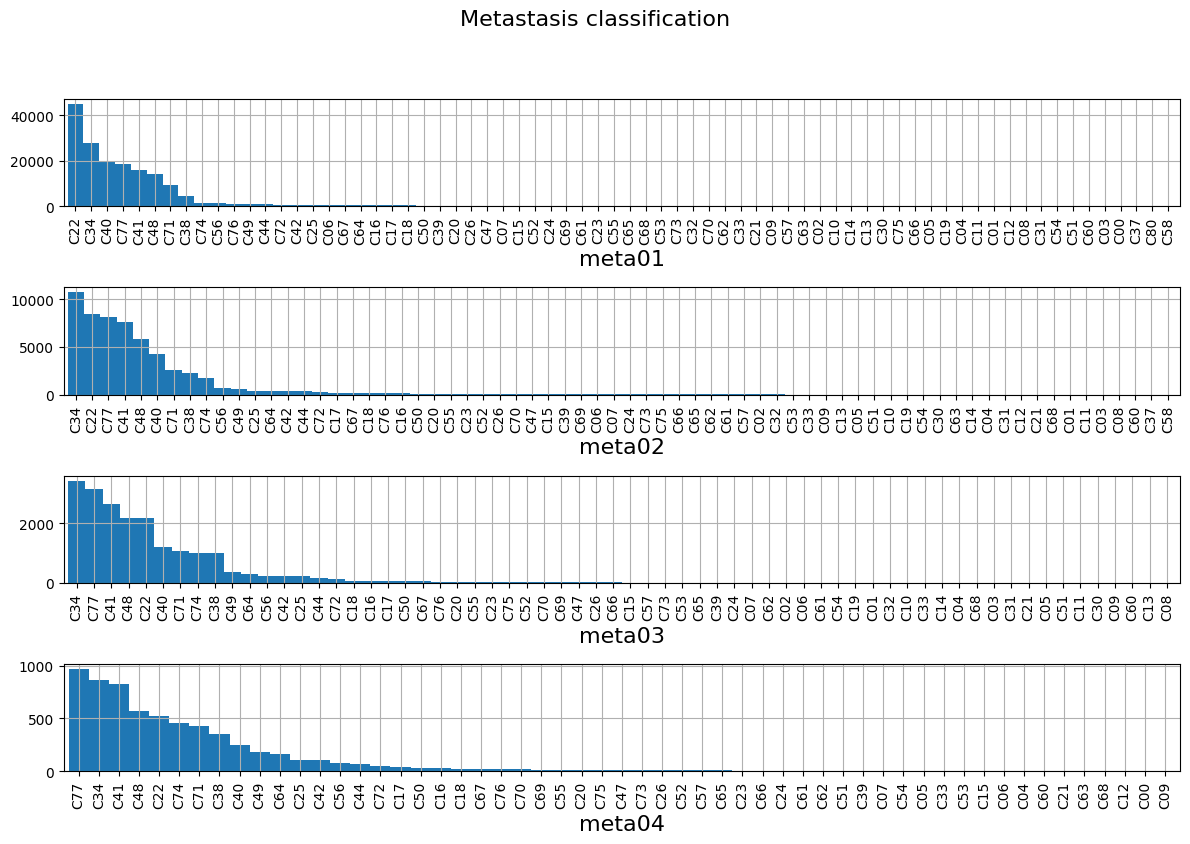

In [94]:
# metastasis classification
metas = ['meta01', 'meta02', 'meta03', 'meta04']

fig = plt.figure()
num = 0

fig.suptitle('Metastasis classification', fontsize=16, y=1.05)

for item in metas:
    num += 1
    counts = rhc[item].value_counts(normalize=False)
    ax = fig.add_subplot(4,1,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=1,figsize=(12,8), fontsize=10)
    plt.grid()

plt.tight_layout()
#plt.savefig('treatments.jpg')
plt.show()

In [95]:
# top 10 cancer types by topogrup with metastasis
rhc['topogrup'][rhc['meta01'].notna()].value_counts(normalize=True).head(10)*100

topogrup
C34    17.992118
C50     9.848534
C80     9.479706
C16     9.176068
C61     8.545889
C18     7.878122
C25     4.853497
C20     4.768924
C15     3.608995
C64     2.457288
Name: proportion, dtype: float64

In [96]:
# top 10 cancer types by topogrup with metastasis
rhc['topogrup'][rhc['meta02'].notna()].value_counts(normalize=True).head(10)*100

topogrup
C34    20.865968
C50    12.676230
C80     9.471090
C16     7.746194
C18     7.712752
C61     5.878729
C20     4.799789
C25     4.113350
C64     3.571240
C15     2.816158
Name: proportion, dtype: float64

In [97]:
# top 10 cancer types by topogrup with metastasis
rhc['topogrup'][rhc['meta03'].notna()].value_counts(normalize=True).head(10)*100

topogrup
C34    24.489496
C50    15.219627
C80    10.871162
C18     6.787131
C16     5.910582
C64     4.098722
C61     3.834288
C20     3.589442
C25     3.584545
C15     2.423975
Name: proportion, dtype: float64

In [98]:
# top 10 cancer types by topogrup with metastasis
rhc['topogrup'][rhc['meta04'].notna()].value_counts(normalize=True).head(10)*100

topogrup
C34    27.884313
C50    14.948130
C80    12.621817
C18     5.752908
C64     4.904118
C16     4.746935
C25     2.876454
C61     2.797862
C20     2.703552
C53     2.357749
Name: proportion, dtype: float64

#### Treatment starting date 

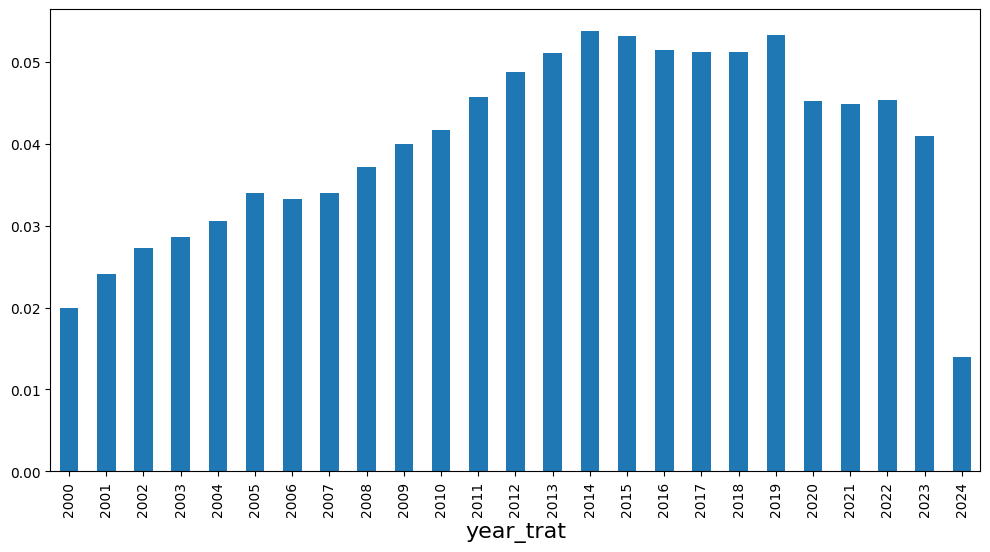

In [99]:
# plot of the treatment start date
year_trat =rhc['year_trat'].value_counts(normalize=True).sort_index(ascending=True)
plt.xlabel('treatment starting date', fontsize=16)
year_trat.plot.bar(figsize=(12,6))
plt.show()

#### Reason for not doing the treatment, `naotrat`

Most of the data correspond to cases with treatment, being followed by:

* 8 - doesn't apply (if treatment is included)
* 5 - death from cancer
* 7 - others
* 2 - advanced disease, lack of clinical conditions 

The data can be better viewed in the figure below, which has been omitted item 8.

In [100]:
# reason for not treating
# rhc.naotrat.value_counts(normalize=False)

In [101]:
# missing values for dttrat when a treatment was not done
rhc[['dtconsult', 'dtdiag', 'dttrat', 'naotrat']][rhc.naotrat != 8]

dtconsult     dtdiag     dttrat  naotrat
27      2006-12-13 2006-08-02        NaT        7
37      2018-06-14 2018-06-28        NaT        5
64      2000-01-24 2000-01-24        NaT        5
121     2004-12-30 2004-12-30        NaT        5
198     2010-07-02 2010-07-12 2010-07-12        7
...            ...        ...        ...      ...
1256652 2010-06-10 2010-07-15        NaT        7
1256653 2010-06-02 2010-07-15        NaT        7
1256670 2011-02-15 2011-03-03        NaT        7
1257095 2011-02-28 2011-04-11        NaT        7
1257200 2009-01-24 2009-01-24        NaT        5

[101890 rows x 4 columns]

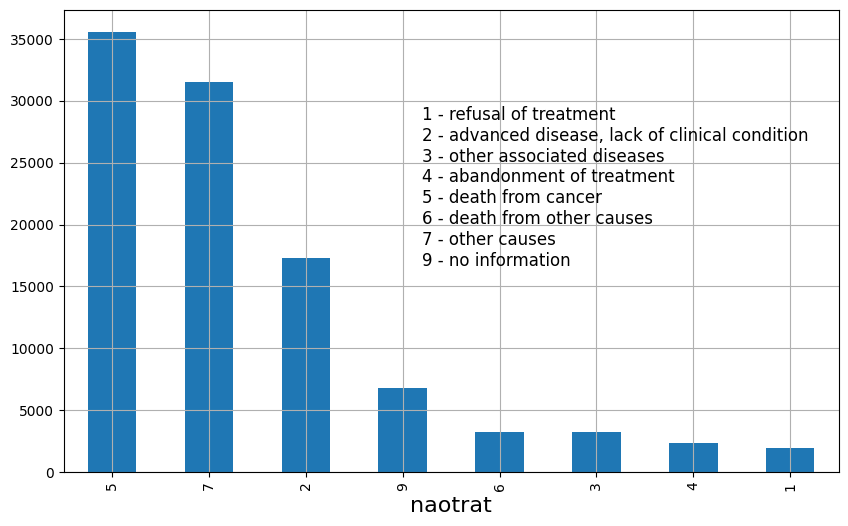

In [102]:
# plot of reason for not treating
nao_trat = rhc['naotrat'].value_counts(normalize=False)[rhc['naotrat'].value_counts(normalize=True) < 0.9]
plt.xlabel('reason for not doing the treatment ', fontsize=16)
nao_trat.plot.bar(figsize=(10,6))
plt.text(3.2, 15000, '''
1 - refusal of treatment
2 - advanced disease, lack of clinical condition
3 - other associated diseases
4 - abandonment of treatment
5 - death from cancer
6 - death from other causes
7 - other causes
9 - no information
''', fontsize=12)
plt.grid()
plt.show()

#### Treatments applied

The treatments are grouped by types, which are used individually or in combination:

* A: Surgery
* B: Radiotherapy 
* C: Chemotherapy
* D: Surgery + Radiotherapy
* E: Surgery + Chemotherapy
* F: Radiotherapy + Chemotherapy
* G: Surgery + Radiotherapy + Chemotherapy
* H: Surgery + Radiotherapy + Chemotherapy + Hormone
* I: Other treatment combinations
* J: No treatment has done

Treatments are also grouped by periods (before, during and after):

* `tratamento`: treatments done
* `trathosp`: treatments done at the hospital
* `tratfantes`: treatments done before / during admission outside the hospital
* `tratfaopos`: treatments done after admission outside the hospital

The information provided by the RHC does not make it clear what is the difference between the data present in the `treatment` and` trathosp` columns. A visual analysis (see figure below) of the data indicates very similar trends. However, when comparing the numbers (see below), the differences are evident.

The data indicate that most patients underwent some surgical procedure. The next figure illustrates which treatments were most used.

In [103]:
# summary of the column 'tratamento'
rhc.tratamento.describe()

count     1257217
unique         10
top             A
freq       461717
Name: tratamento, dtype: object

In [104]:
# summary of the column 'trathosp'
rhc.trathosp.describe()

count     1257217
unique         10
top             A
freq       471001
Name: trathosp, dtype: object

In [105]:
# comparing counts for the columns 'tratamento' and 'trathosp'
trat = rhc.tratamento.value_counts().sort_index()
trath = rhc.trathosp.value_counts().sort_index()
blank ='   '
tratamento = 'treatment'
trathosp = 'treatment at the hospital'
dif = '|difference|'
print('-'*55)
#print(f'tratamento{blank}trathosp')
print(f'{tratamento:>10}{trathosp:>30}{dif:>15}')
print('-'*55)
for item in range(len(trat)):
    print(f'{trat.index[item]}{trat[item]:>10}{trath.index[item]:>15}{trath[item]:>10}{(abs(trat[item] - trath[item])):> 15}')
print('-'*55)

-------------------------------------------------------
 treatment     treatment at the hospital   |difference|
-------------------------------------------------------
A    461717              A    471001           9284
B     57210              B     55499           1711
C    124686              C    135069          10383
D     46796              D     42233           4563
E     80244              E     83234           2990
F     82049              F     74515           7534
G     62761              G     55182           7579
H     36562              H     30567           5995
I    203878              I    201572           2306
J    101314              J    108345           7031
-------------------------------------------------------


/tmp/ipykernel_211682/3001813220.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{trat.index[item]}{trat[item]:>10}{trath.index[item]:>15}{trath[item]:>10}{(abs(trat[item] - trath[item])):> 15}')


In [106]:
# summary of the column 'tratfantes'
rhc.tratfantes.describe()

count     1257217
unique          4
top             J
freq      1257211
Name: tratfantes, dtype: object

In [107]:
# summary of the column 'tratfapos'
rhc.tratfapos.describe()

count     1257217
unique         10
top             J
freq      1187462
Name: tratfapos, dtype: object

In [108]:
# summary of the column 'tratfantes'
rhc['tratfantes'].value_counts(normalize=False)

tratfantes
J    1257211
A          3
C          2
B          1
Name: count, dtype: int64

In [109]:
# summary of the column 'tratfapos'
rhc['tratfapos'].value_counts(normalize=False)

tratfapos
J    1187462
B      37747
I      15586
C       7393
A       5089
F       2383
D        639
E        551
G        282
H         85
Name: count, dtype: int64

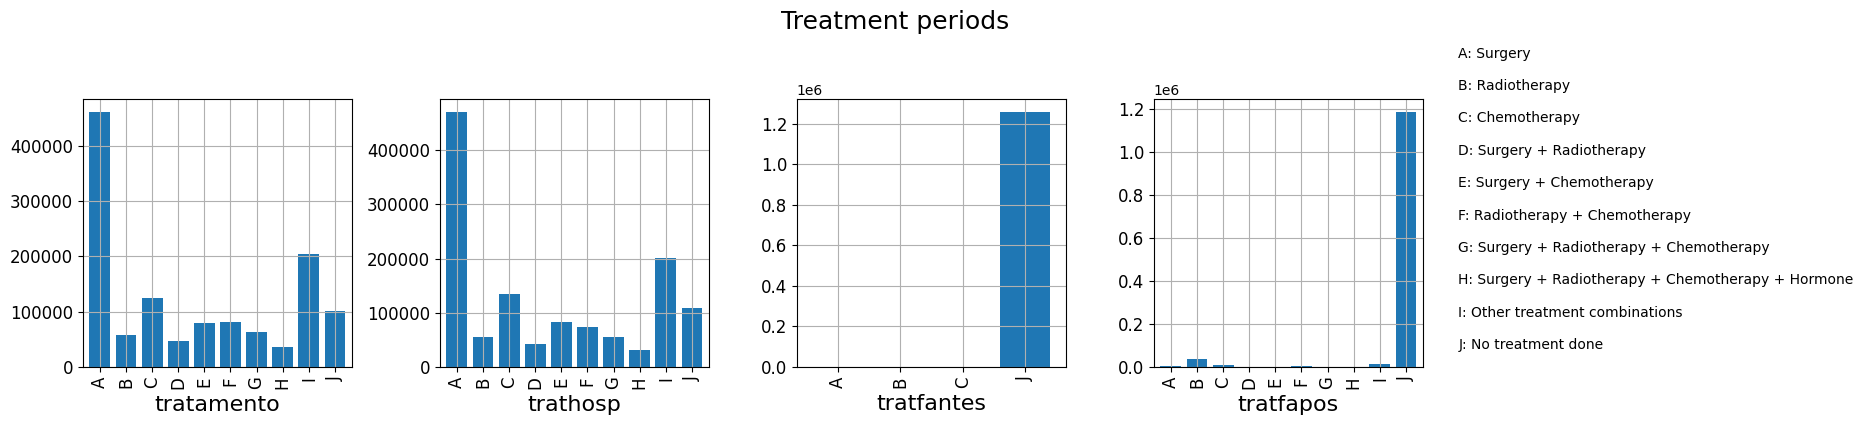

In [110]:
# treatment period
treats = ['tratamento', 'trathosp', 'tratfantes', 'tratfapos']

fig = plt.figure()
num = 0

fig.suptitle('Treatment periods', fontsize=18, y=1.05)

for item in treats:
    num += 1
    counts = rhc[item].value_counts(normalize=False).sort_index()
    ax = fig.add_subplot(1,5,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=0.8,figsize=(18,4), fontsize=12)
    plt.grid()

plt.tight_layout()
plt.text(11,7000,'''
A: Surgery\n
B: Radiotherapy\n 
C: Chemotherapy\n
D: Surgery + Radiotherapy\n
E: Surgery + Chemotherapy\n
F: Radiotherapy + Chemotherapy\n
G: Surgery + Radiotherapy + Chemotherapy\n
H: Surgery + Radiotherapy + Chemotherapy + Hormone\n
I: Other treatment combinations\n
J: No treatment done
''')
#plt.savefig('treatments.jpg')
plt.show()

The column J indicates whether or not the patient was treated at the hospital. Most of the patients were treated at the hospital.

This data is in agreement with that previously presented for the column `naotrat` which indicates the reason for not treating, when applicable.

In [111]:
# reason for not treating
rhc['nenhum'].value_counts(normalize=True)

nenhum
0    0.913852
1    0.086148
Name: proportion, dtype: float64

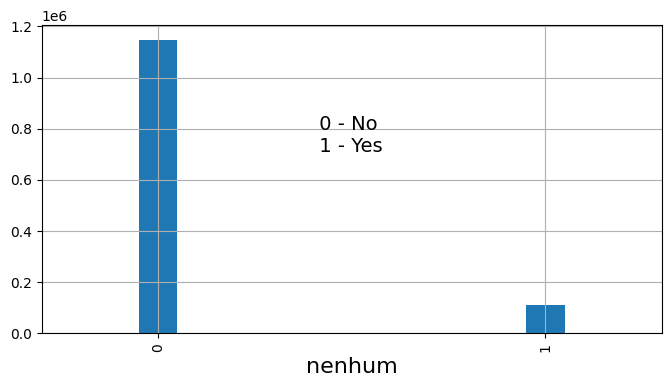

In [112]:
# treatment received at the hospital
none = rhc['nenhum'].value_counts(normalize=False).sort_index(ascending=True)
plt.xlabel('no treatment received at the hospital', fontsize=16)
none.plot.bar(width=0.1,figsize=(8,4))
plt.text(0.4, 710000,' 0 - No\n 1 - Yes', fontsize = 14)
plt.grid()
plt.show()

#### Periods of treatment received at the hospital (before, during, after)

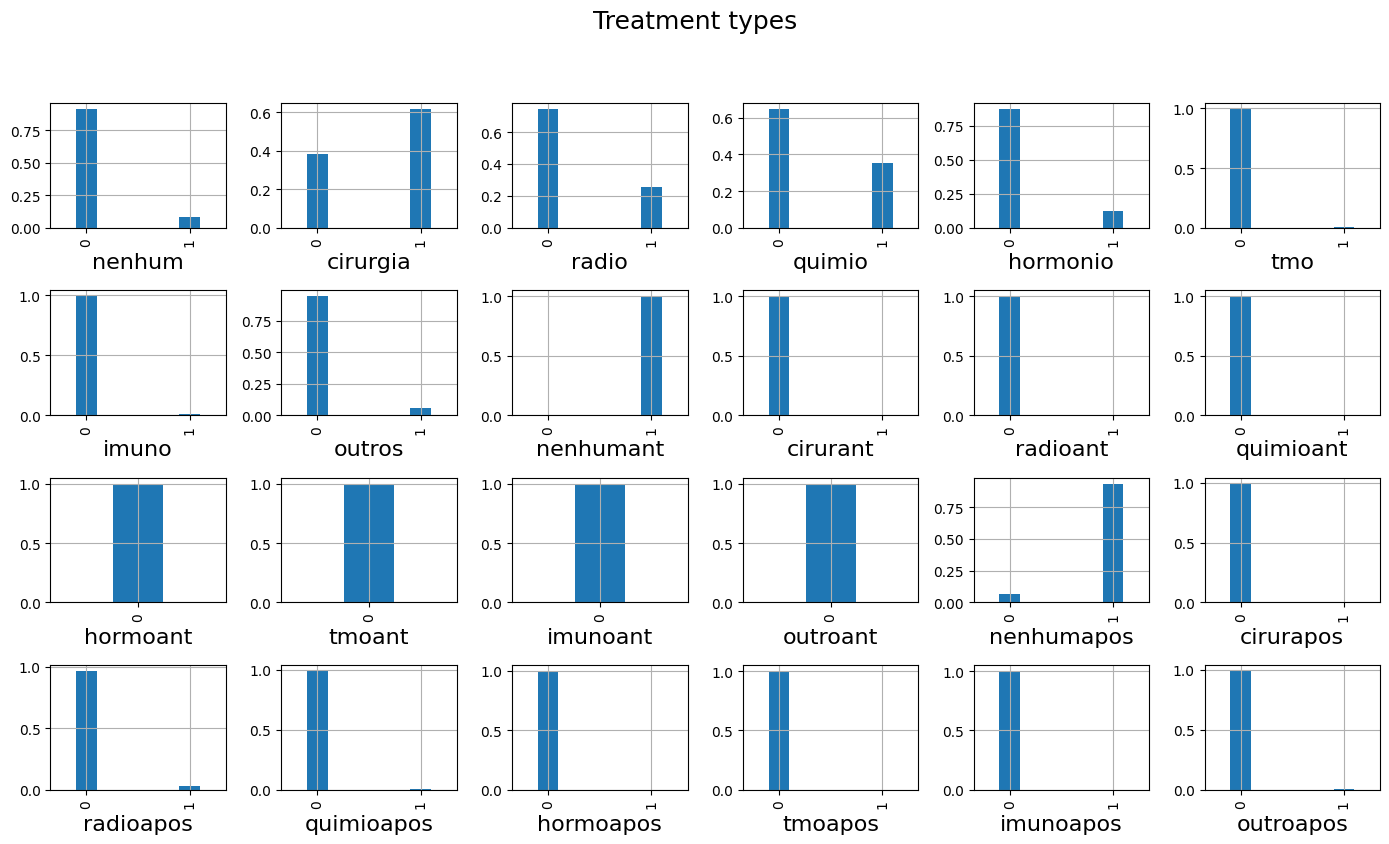

In [113]:
# plot of treatment types
treatments = ['nenhum',     # no treatment at the hospital 
              'cirurgia',   # surgery at the hospital
              'radio',      # radiotherapy at the hospital
              'quimio',     # chemotherapy at the hospital
              'hormonio',   # hormone at the hospital
              'tmo',        # bone marrow transplant at the hospital
              'imuno',      # imunotherapy at the hospital
              'outros',     # other treatments at the hospital
              'nenhumant',  # no treatment before admission
              'cirurant',   # surgery before admission
              'radioant',   # radiotherapy before admission
              'quimioant',  # chemotherapy before admission
              'hormoant',   # hormone before admission
              'tmoant',     # bone marrow transplant before admission
              'imunoant',   # imunotherapy before admission
              'outroant',   # other treatment before admission
              'nenhumapos', # no treatment after admission
              'cirurapos',  # surgery after admission
              'radioapos',  # radiotherapy after admission
              'quimioapos', # chemotherapy after admission
              'hormoapos',  # hormone after admission
              'tmoapos',    # bone marrow transplant after admission
              'imunoapos',  # imunotherapy after admission
              'outroapos'   # other treatments after admission
             ]

fig = plt.figure()
num = 0

fig.suptitle('Treatment types', fontsize=18, y=1.05)

for item in treatments:
    num += 1
    counts = rhc[item].value_counts(normalize=True).sort_index(ascending=True)
    ax = fig.add_subplot(4,6,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=0.2,figsize=(14,8))
    plt.grid()
    
plt.tight_layout()
#plt.savefig('treatments.jpg')
plt.show()

Columns `quimioant`, `hormoant`, `tmoant`, `imunoant`, `outroant` contains only one value and can be removed. 

In [114]:
# counts for the chosen column
rhc.hormoant.value_counts()

hormoant
0    1257217
Name: count, dtype: int64

#### Year of the last information about the patient

The data increases over the years, as the RHC started to be increasingly fed by data from the participating hospitals in the FOSP network.

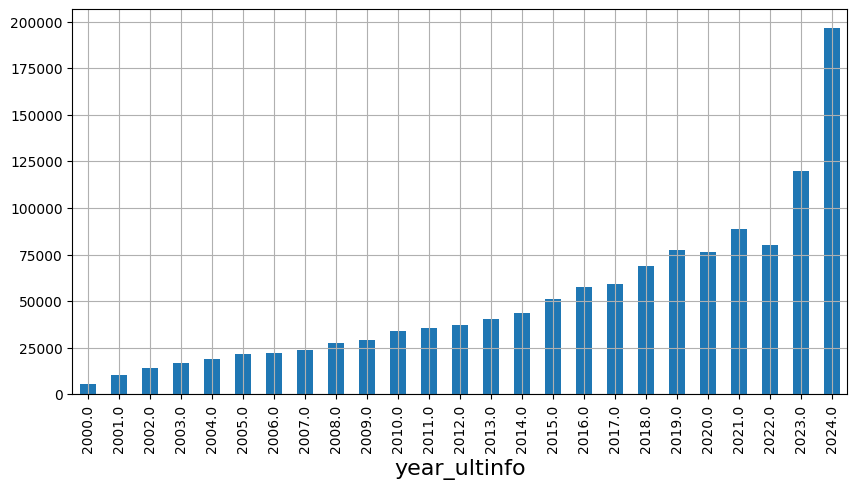

In [115]:
# plot date of last information about the patient
year_ultinfo = rhc['year_ultinfo'].value_counts(normalize=False).sort_index(ascending=True)
plt.xlabel('year of the last information about the patient', fontsize=16)
year_ultinfo.plot.bar(figsize=(10,5))
plt.grid()
plt.show()

#### Last information from the patient

In [116]:
# unique values for ultinfo
rhc.ultinfo.unique()

array([3, 2, 4, 1])

In [117]:
# counts for ultinfo
rhc.ultinfo.value_counts()

ultinfo
2    517070
3    368421
4    239739
1    131987
Name: count, dtype: int64

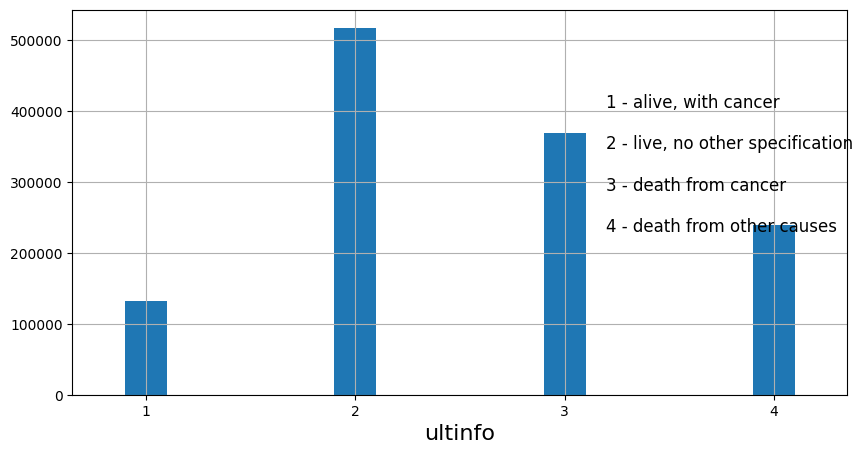

In [118]:
ultinfo = rhc['ultinfo'].value_counts(normalize=False).sort_index(ascending=True)
plt.xlabel('last information from the patient', fontsize=16)
plt.text(2.2, 200000,
'''
1 - alive, with cancer \n
2 - live, no other specification\n
3 - death from cancer \n
4 - death from other causes
''', fontsize = 12)
ultinfo.plot.bar(width=0.2,figsize=(10,5), rot=0)
plt.grid()
plt.show()

#### Time intervals between events

The intervals, in days, are presented for the following events:
* consultation and diagnosis, `consdiag`
* consultation and treatment, `tratcons`
* treatment and diagnosis, `diagtrat` 

In general, the data is well distributed and has a large number of unique values. Because of this and for the sake of clarity, the figure below was prepared considering only values whose presence is greater than 0.5%.

In [119]:
# counts for the interval in days between consultation and diagnosis
rhc.consdiag.value_counts().sort_values(ascending=False)

consdiag
0       199173
1        49258
7        26716
2        22598
14       21635
         ...  
4962         1
4686         1
1754         1
5154         1
3282         1
Name: count, Length: 3367, dtype: int64

In [120]:
# counts for the interval in days between consultation and treatment
rhc.tratcons.value_counts().sort_values(ascending=False)

tratcons
0.0       117271
1.0        33766
7.0        18707
14.0       15322
2.0        15033
           ...  
4039.0         1
3914.0         1
3581.0         1
5889.0         1
3461.0         1
Name: count, Length: 2811, dtype: int64

In [121]:
# counts for the interval in days between treatment and diagnosis
rhc.diagtrat.value_counts().sort_values(ascending=False)

diagtrat
0.0       358297
1.0        11355
35.0        8854
42.0        8621
49.0        8478
           ...  
4683.0         1
4086.0         1
2185.0         1
3031.0         1
4212.0         1
Name: count, Length: 3023, dtype: int64

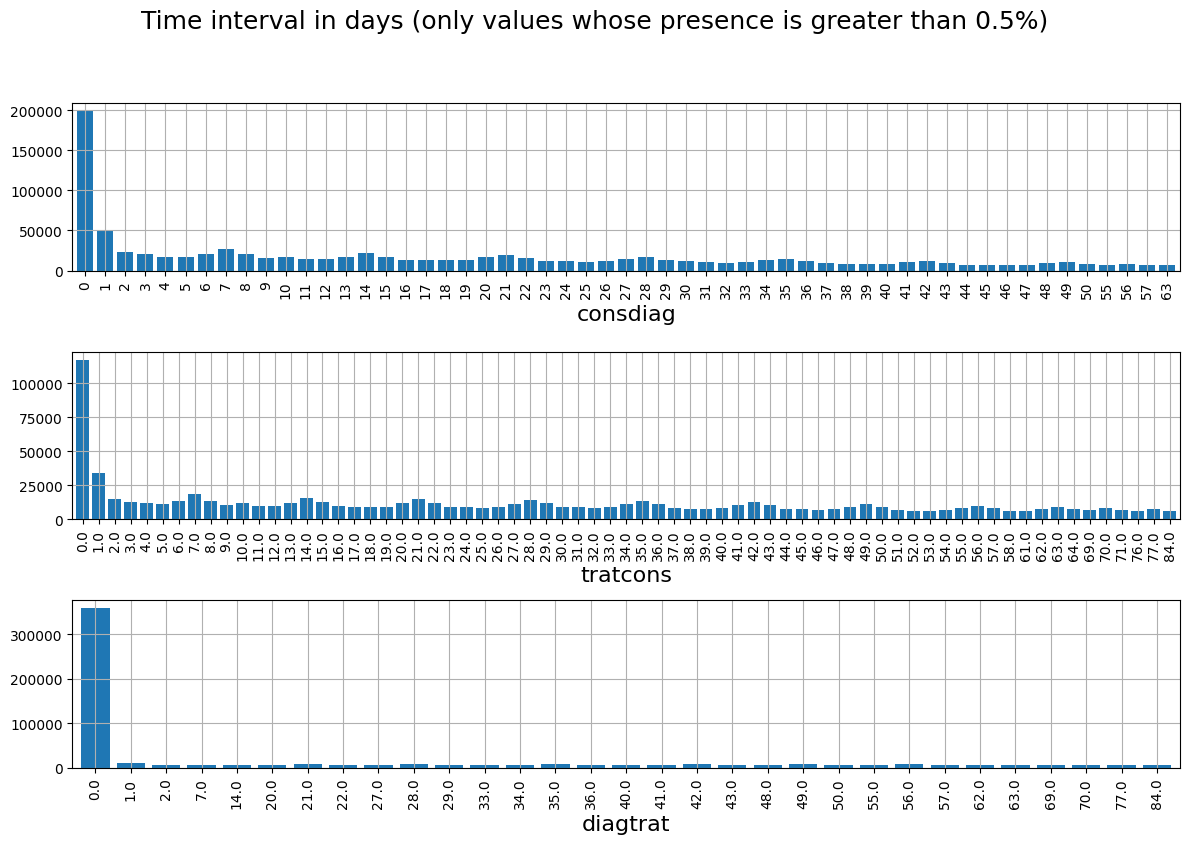

In [122]:
# plot time intervals between events
# only data with more than 0.5 percent of counts is shown 

time_interval = ['consdiag', 'tratcons', 'diagtrat']

fig = plt.figure()
num = 0

fig.suptitle('Time interval in days (only values whose presence is greater than 0.5%)', fontsize=18, y=1.05)

for item in time_interval:
    num += 1
    
    counts = (
    rhc[item]
    .value_counts(normalize=False)[rhc[item]
    .value_counts(normalize=True) > 0.005].sort_index()
    )
    
    ax = fig.add_subplot(3,1,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=0.8,figsize=(12,8), fontsize=10)
    plt.grid()

plt.tight_layout()
#plt.savefig('treatments.jpg')
plt.show()

#### Year of diagnosis

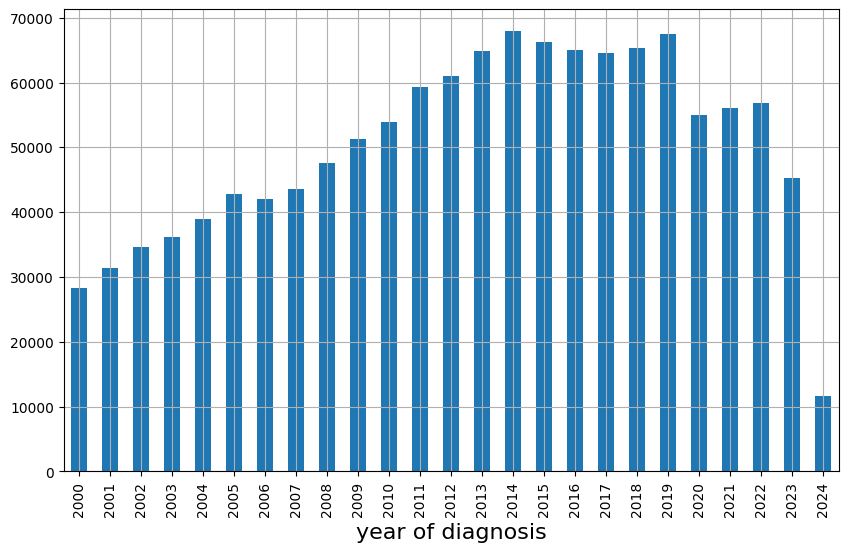

In [123]:
# diagnosis year
rhc['anodiag'].value_counts(normalize=False).sort_index().plot.bar(figsize=(10,6))

plt.xlabel('year of diagnosis', fontsize=16)
plt.grid()
plt.show()

#### Pediatric cancer

For pediatric tumors the International Classification for Childhood Cancer (CICI) is applied.

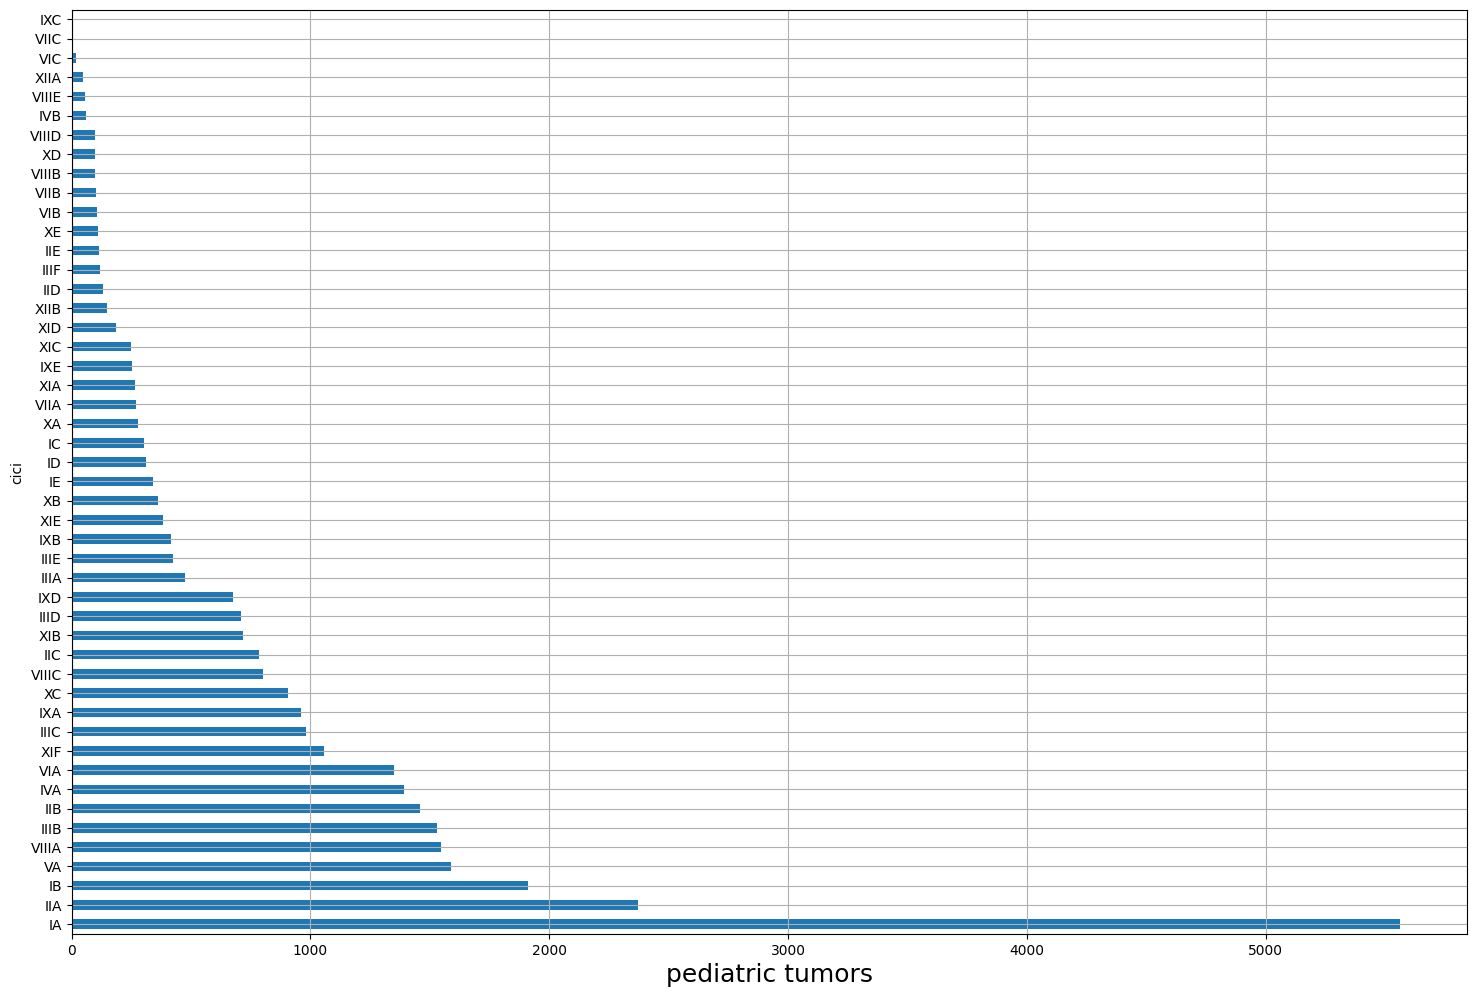

In [124]:
# pediatric cancer 
# The International Incidence of Childhood Cancer (IICC)
rhc.cici.value_counts().plot.barh(figsize=(18, 12))
plt.xlabel('pediatric tumors', fontsize=18)
plt.grid()
plt.show()

/home/smv/.local/share/virtualenvs/Cancer-hospital-records-P2WNE_gk/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


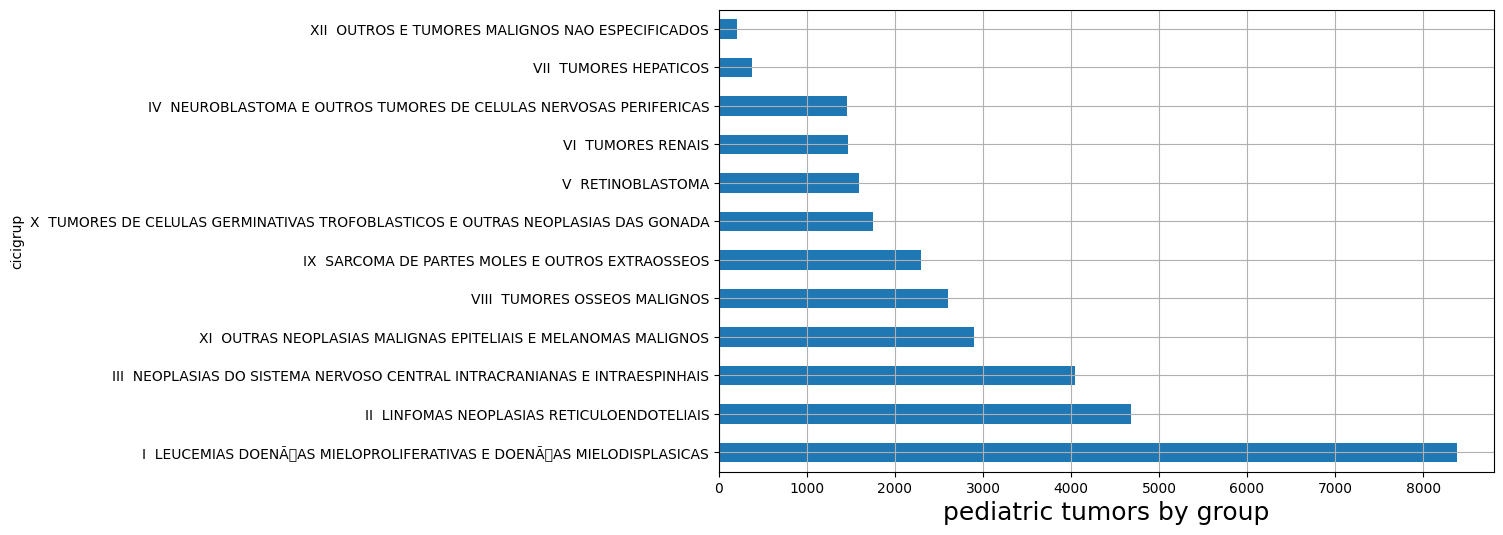

In [125]:
# pediatric cancer by group
# The International Incidence of Childhood Cancer (IICC)
rhc.cicigrup.value_counts().plot.barh(figsize=(10,6))
plt.xlabel('pediatric tumors by group', fontsize=18)
plt.grid()
plt.show()

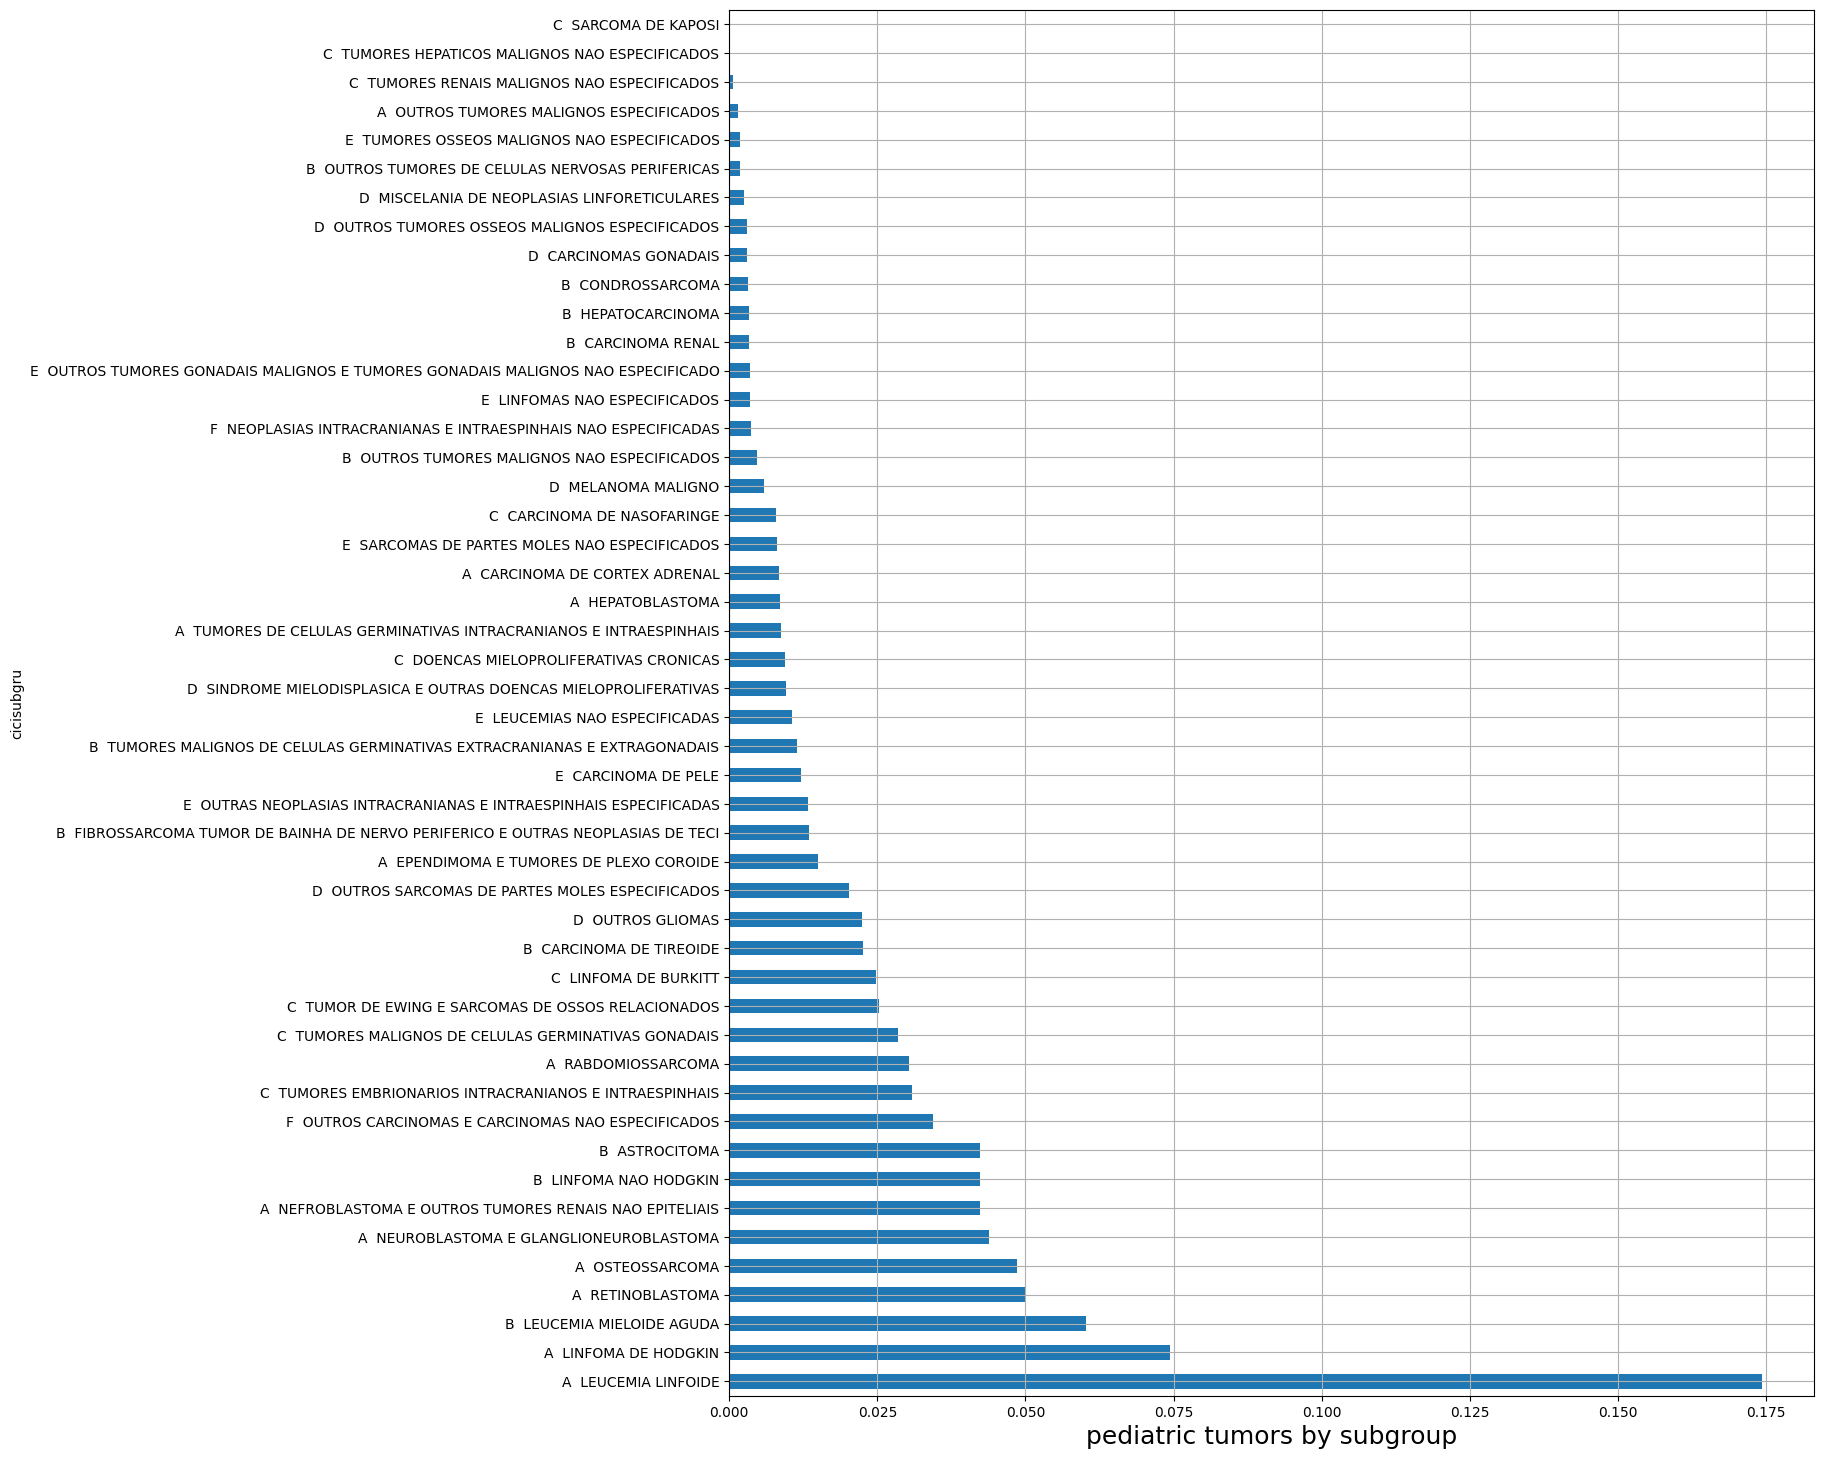

In [126]:
# # pediatric cancer by subgroup
# The International Incidence of Childhood Cancer (IICC)
rhc.cicisubgru.value_counts(normalize=True).plot.barh(figsize=(14,18))
plt.xlabel('pediatric tumors by subgroup', fontsize=18)
plt.grid()
plt.show()

#### Patient's age range

In [127]:
rhc.faixaetar.describe()

count     1257217
unique          8
top           70+
freq       389511
Name: faixaetar, dtype: object

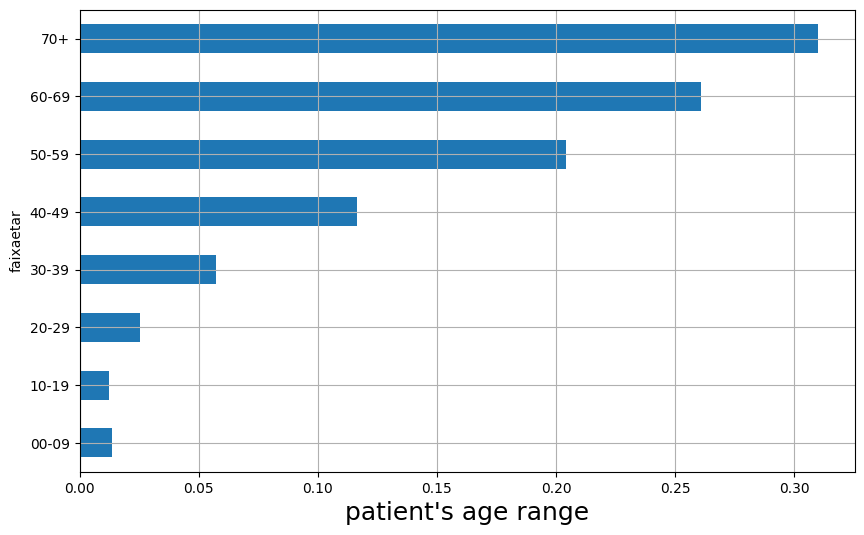

In [128]:
# age range
rhc.faixaetar.value_counts(normalize=True).sort_index().plot.barh(figsize=(10,6))
plt.xlabel("patient's age range", fontsize=18)
plt.grid()
plt.show()

#### Tumor laterality

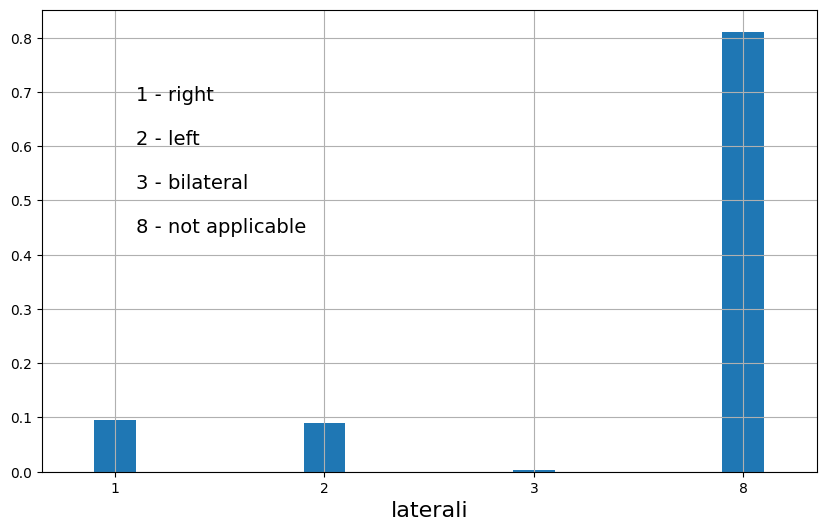

In [129]:
# plot of tumor laterality
laterali = rhc['laterali'].value_counts(normalize=True).sort_index(ascending=True)
plt.xlabel('laterality', fontsize=16)
plt.text(0.1,0.4,
'''
1 - right \n
2 - left \n
3 - bilateral \n
8 - not applicable
''', fontsize = 14)
laterali.plot.bar(width=0.2,figsize=(10,6), rot=0)
plt.grid()
plt.show()

#### Home institution

In [130]:
# home institution
rhc.instorig.describe()

count                  721
unique                 278
top       999999  IGNORADO
freq                   182
Name: instorig, dtype: object

/home/smv/.local/share/virtualenvs/Cancer-hospital-records-P2WNE_gk/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/smv/.local/share/virtualenvs/Cancer-hospital-records-P2WNE_gk/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


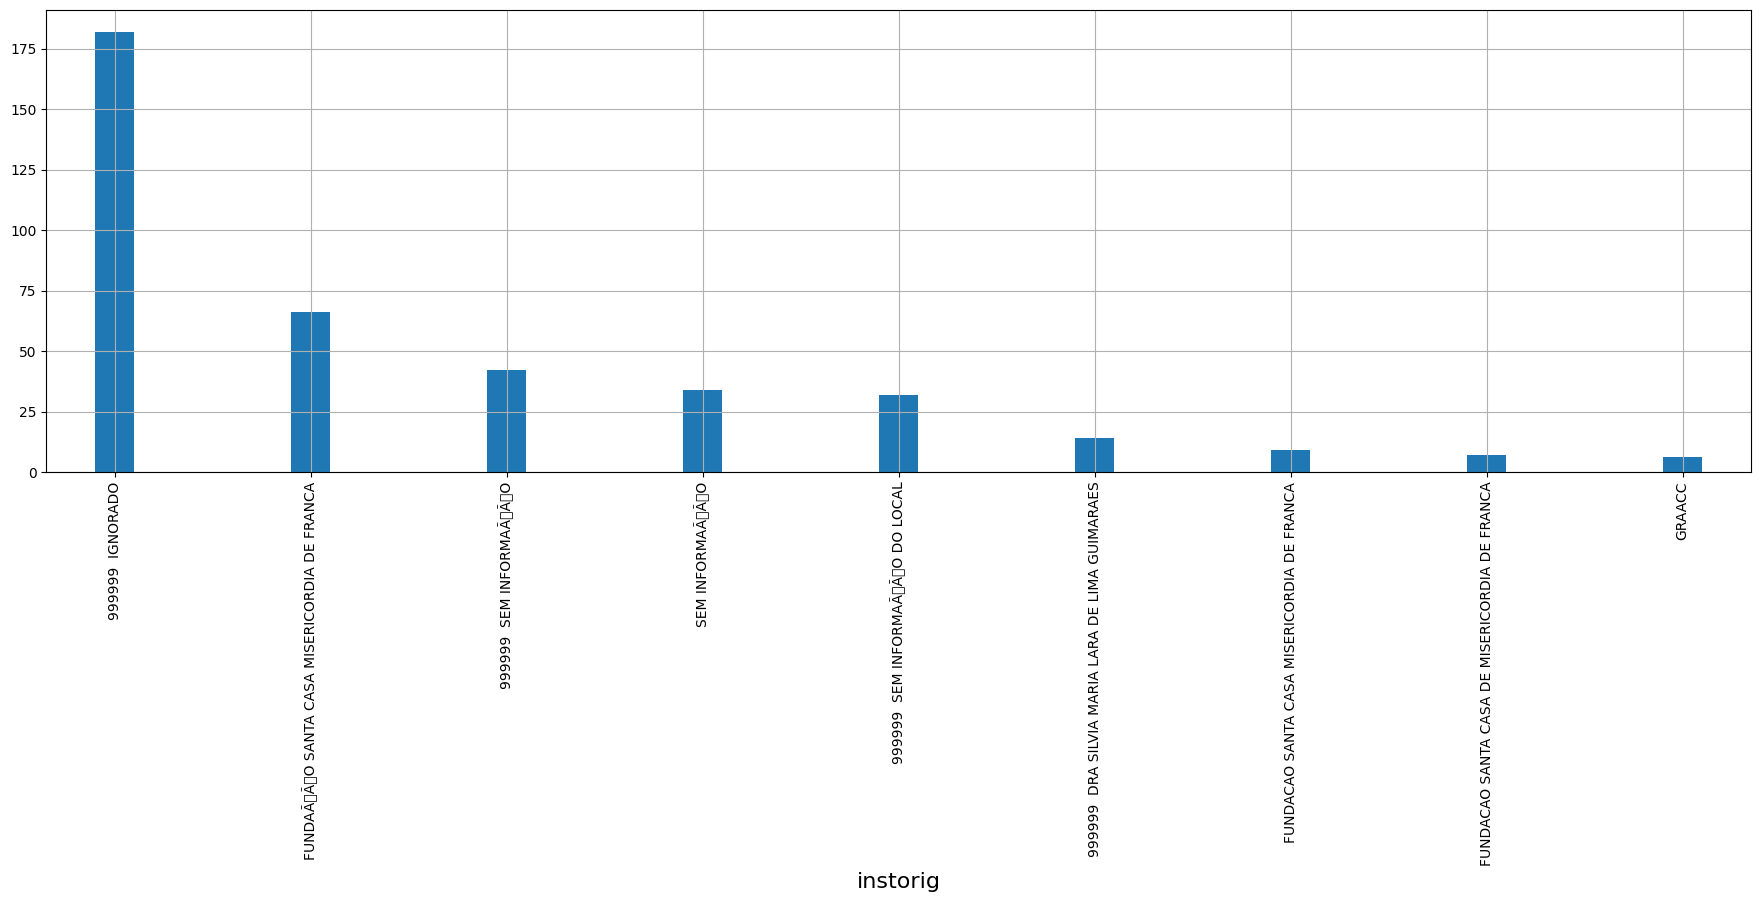

In [131]:
# plot of home institution
instorig =rhc.instorig.value_counts(normalize=False)[rhc.instorig.value_counts(normalize=False) > 5]
plt.xlabel('home institution', fontsize=16)
instorig.plot.bar(width=0.2,figsize=(22,6))
plt.grid()
plt.show()

#### Regional health departments (DRS) of the state of São Paulo

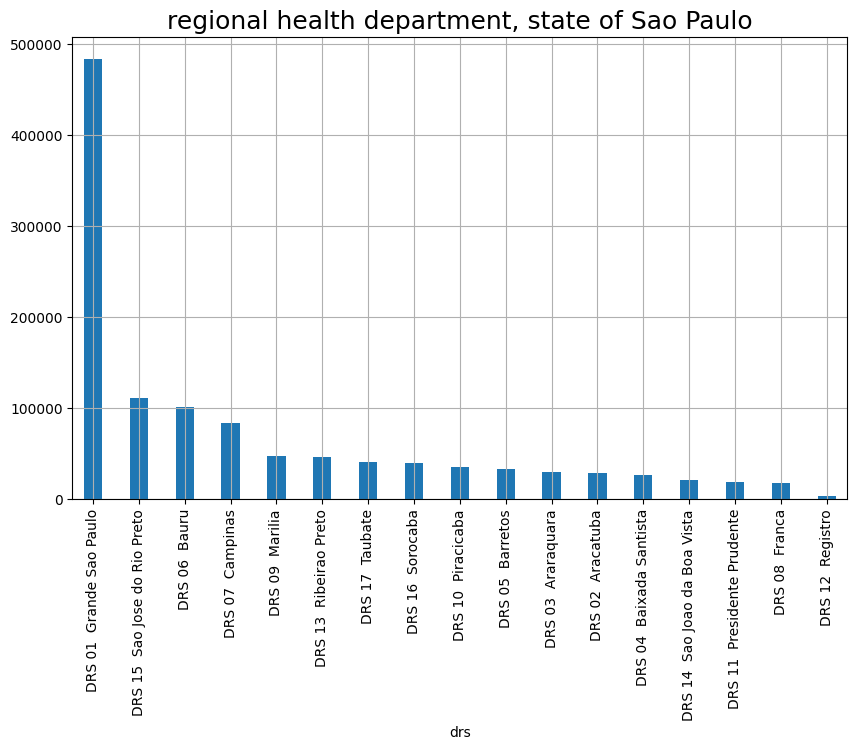

In [132]:
# plot for regional health department, state of Sao Paulo
drs = rhc.drs.value_counts(normalize=False)
plt.title('regional health department, state of Sao Paulo', fontsize=18)
drs.plot.bar(width=0.4,figsize=(10,6))
plt.grid()
plt.show()

In [133]:
# number o cities having drs as nan
rhc['cidade'][rhc.drs.isna()].nunique()

2427

In [134]:
# esidence state and drs as nan
rhc['ufresid'][rhc.drs.isna()].nunique()

28

In [135]:
# residence city when drs is not nan plus residence state is not SP
rhc['cidade'][(rhc.drs.notna()) & (rhc.ufresid !='SP')].unique()

array([], dtype=object)

In [136]:
rhc[rhc['cidade'] == 'AGUA DOCE']

institu  escolari  idade  sexo ufnasc ufresid       ibge     cidade  \
408164    21636         4     67     2     SP      SP  4200408.0  AGUA DOCE   
428159    20737         2     73     1     SC      SC  4200408.0  AGUA DOCE   

        cateatend  dtconsult  clinica  diagprev     dtdiag  basediag  topo  \
408164          9 2004-12-09       23         2 2004-09-30         3  C446   
428159          2 2016-08-19       24         2 2016-03-16         3  C443   

       topogrup                                           desctopo  morfo  \
408164      C44                 PELE DO OMBRO E MEMBROS SUPERIORES  87433   
428159      C44  PELE DE OUTRAS PARTES E DE PARTES NAO ESPECIFI...  80903   

                                 descmorfo  ec ecgrup  t  n  m   pt   pn   pm  \
408164  MELANOMA DE PROPAGACAO SUPERFICIAL  II     II  3  0  0    3    0    0   
428159           CARCINOMA BASOCELULAR SOE  II     II  2  0  0  NaN  NaN  NaN   

        s  g  localtnm  idmitotic  psa  gleason              outracla meta01  \
408164  8  8         8          8    8        8  CLARK IV BRES 1 37MM    NaN   
428159  8  8         8          8    8        8                   NaN    NaN   

       meta02 meta03 meta04     dttrat  naotrat tratamento trathosp  \
408164    NaN    NaN    NaN 2004-12-16        8          A        A   
428159    NaN    NaN    NaN 2017-03-16        8          B        B   

       tratfantes tratfapos  nenhum  cirurgia  radio  quimio  hormonio  tmo  \
408164          J         J       0         1      0       0         0    0   
428159          J         J       0         0      1       0         0    0   

        imuno  outros  nenhumant  cirurant  radioant  quimioant  hormoant  \
408164      0       0          1         0         0          0         0   
428159      0       0          1         0         0          0         0   

        tmoant  imunoant  outroant  nenhumapos  cirurapos  radioapos  \
408164       0         0         0           1          0          0   
428159       0         0         0           1          0          0   

        quimioapos  hormoapos  tmoapos  imunoapos  outroapos  dtultinfo  \
408164           0          0        0          0          0 2024-01-23   
428159           0          0        0          0          0 2019-03-07   

        ultinfo  consdiag  tratcons  diagtrat  anodiag cici cicigrup  \
408164        2        70       7.0      77.0     2004  NaN      NaN   
428159        2       156     209.0     365.0     2016  NaN      NaN   

       cicisubgru faixaetar  laterali instorig  drs rras  perdaseg  erro  \
408164        NaN     60-69         8      NaN  NaN   99         0     0   
428159        NaN       70+         8      NaN  NaN   99         0     0   

       dtrecidiva  recnenhum  reclocal  recregio  recdist rec01 rec02 rec03  \
408164        NaT          1         0         0        0   NaN   NaN   NaN   
428159        NaT          1         0         0        0   NaN   NaN   NaN   

       rec04               dscinst  ibgeaten          drs_inst rras_inst  \
408164   NaN  HOSP AMARAL CARVALHO   3525300     DRS 06  Bauru   RRAS 09   
428159   NaN          FUND PIO XII   3505500  DRS 05  Barretos   RRAS 13   

       cidade_ins     cido                             descido  habilit  \
408164        JAU  87433.0  MELANOMA DE PROPAGACAO SUPERFICIAL        7   
428159   BARRETOS  80903.0          CARCINOMA BASOCELULAR, SOE        7   

                                          habit11  habilit1  habilit2  \
408164  CACON com Serviço de Oncologia Pediátrica         3         2   
428159  CACON com Serviço de Oncologia Pediátrica         3         2   

        year_consult  year_diag  year_ultinfo  year_recidiva  year_trat  \
408164          2004       2004        2024.0           <NA>       2004   
428159          2016       2016        2019.0           <NA>       2017   

        month_consult  
408164             12  
428159              8

In [137]:
rhc['cidade'][(rhc.drs.isna()) & (rhc.ufresid=='SP')]

408164    AGUA DOCE
Name: cidade, dtype: object

The city of AGUA DOCE is located in the state of SC, so it seems that for the row 699793 the `ufresid` maybe incorrect since its value is equal to `SP`.

#### Regional health care networks (RRAS) in the state of São Paulo

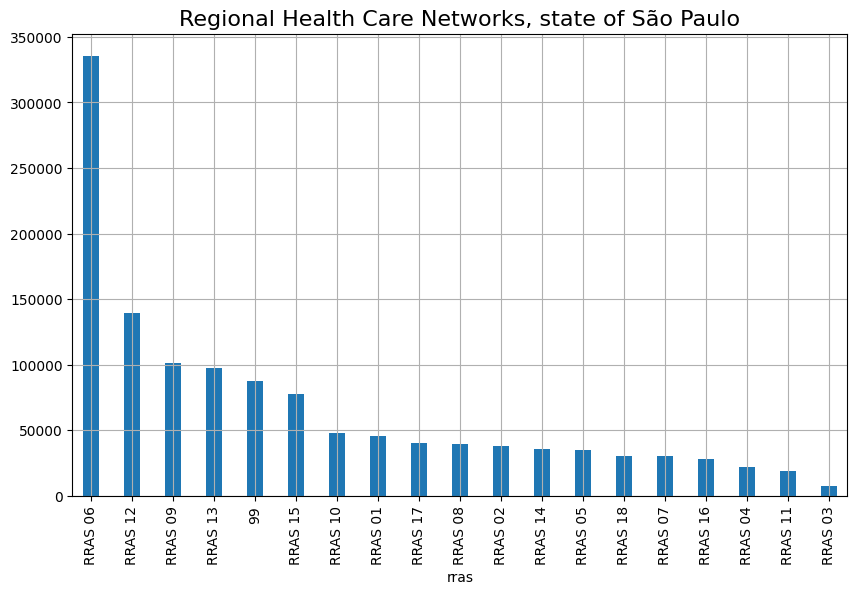

In [138]:
# plot for regional health care networks, state of Sao Paulo
rras = rhc.rras.value_counts(normalize=False)
plt.title('Regional Health Care Networks, state of São Paulo', fontsize=16)
rras.plot.bar(width=0.4,figsize=(10,6))
plt.grid()
plt.show()

#### Loss of patient follow-up

In [139]:
# loss of patient follow-up counts
rhc.perdaseg.value_counts(normalize=True)

perdaseg
0    0.895275
1    0.104725
Name: proportion, dtype: float64

#### Admission with error

In [140]:
# error counts
rhc.erro.value_counts(normalize=False)

erro
0    1257217
Name: count, dtype: int64

#### Institution's IBGE code

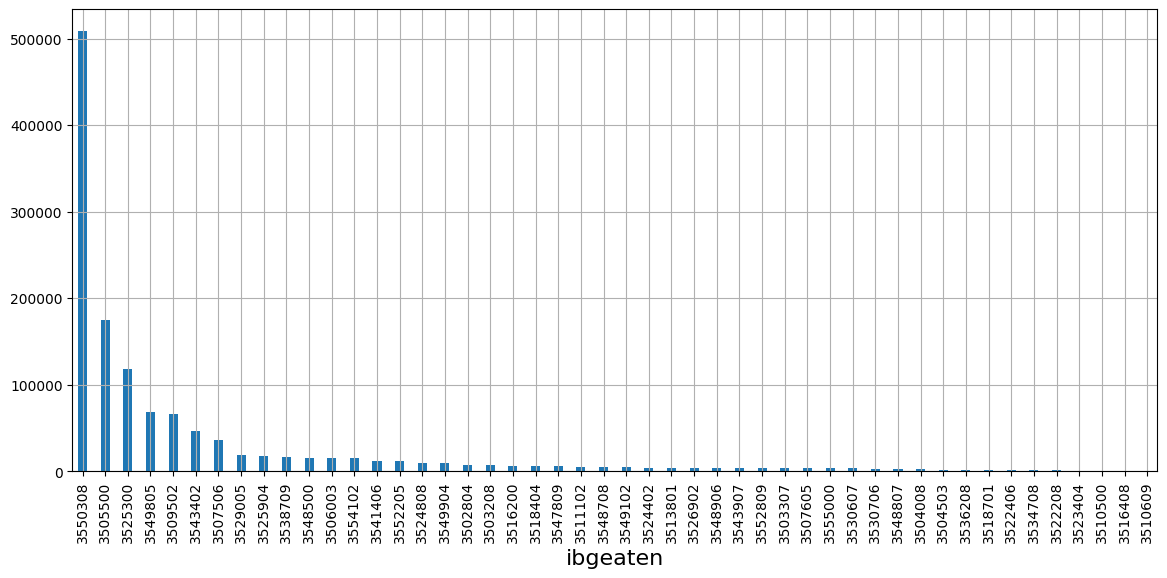

In [141]:
# plot of institution's IBGE code counts
ibgeaten = rhc.ibgeaten.value_counts(normalize=False)
plt.xlabel("Institution's IBGE code", fontsize=16)
ibgeaten.plot.bar(width=0.4,figsize=(14,6))
plt.grid()
plt.show()

#### Relapse

The term **relapse** refers to the return of cancer after undergoing a treatment that aimed to cure it:
* locoregional recurrence (when the disease may return in the same region as the previous tumor)
* metastatic relapse (when the disease manifests itself in another part of the body)

The following columns contain information about relapse:
* `year_recidiva` (date of the last occurrence of recurrence)
* `recnenhum` (with/without recurrence, this is our 'label')
* `reclocal` (local recurrence)
* `recgregio` (regional recurrence)
* `recdist` (distant recurrence/metastasis)

##### Create the new column ```relapse``` having as value inverted positive and negative class

In [142]:
rhc['relapse'] = np.where(rhc['recnenhum'], 1, 0)

In [143]:
rhc['relapse'] = np.where(rhc['recnenhum'], 0, 1)

In [144]:
rhc.recnenhum.value_counts()

recnenhum
1    1144749
0     112468
Name: count, dtype: int64

In [145]:
rhc.relapse.value_counts()

relapse
0    1144749
1     112468
Name: count, dtype: int64

In [146]:
rhc[['recnenhum', 'relapse']]

recnenhum  relapse
0                0        1
1                1        0
2                1        0
3                1        0
4                1        0
...            ...      ...
1257212          1        0
1257213          1        0
1257214          1        0
1257215          1        0
1257216          1        0

[1257217 rows x 2 columns]

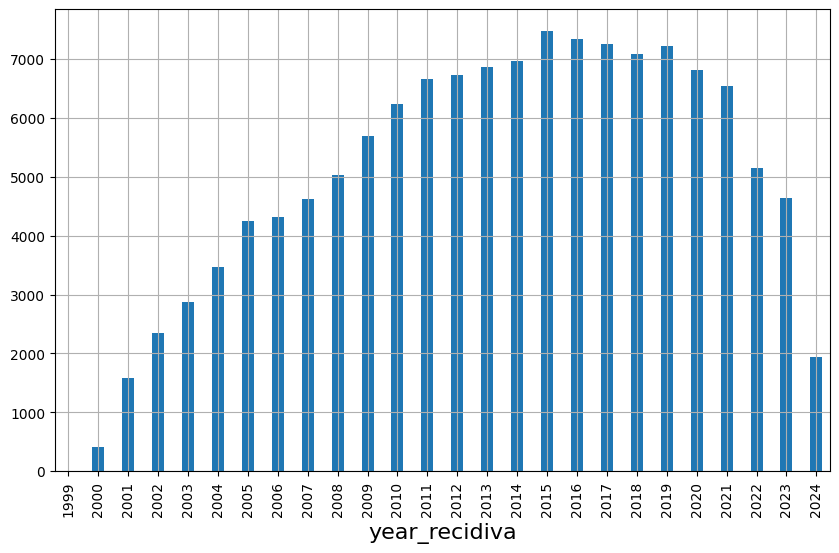

In [147]:
# plot of relapse counts
year_recidiva = rhc.year_recidiva.value_counts(normalize=False)[rhc.year_recidiva.value_counts(normalize=False) < 800000]
plt.xlabel('date of the last relapse', fontsize=16)
year_recidiva.sort_index().plot.bar(width=0.4,figsize=(10,6))
plt.grid()
plt.show()

In [148]:
rhc.year_recidiva.unique()

<IntegerArray>
[2008, <NA>, 2020, 2006, 2018, 2011, 2001, 2013, 2021, 2009, 2012, 2014, 2010,
 2015, 2016, 2007, 2003, 2005, 2022, 2004, 2017, 2019, 2023, 2002, 2024, 2000,
 1999]
Length: 27, dtype: Int64

In [149]:
# relapse yes(0)/no(1), overall dataset
rhc.recnenhum.value_counts(normalize=True)

recnenhum
1    0.910542
0    0.089458
Name: proportion, dtype: float64

In [150]:
#mean_global_relapse = 1 - rhc.recnenhum.mean()
#mean_global_relapse

In [151]:
#rhc[rhc.sexo == 2].recnenhum.mean()

It we are consider all types of cancer presented in the dataset, the attribute `recnenhum`, representing our label, shows that the total dataset presents less 10% of cancer with recurrence (label 0). It means that we have an imbalanced dataset. 

However, a better approach would be to separate the dataset by cancer type, represented by the 331 topography codes or by the 70 topography groups, with and without recurrence. Let's try this below.  

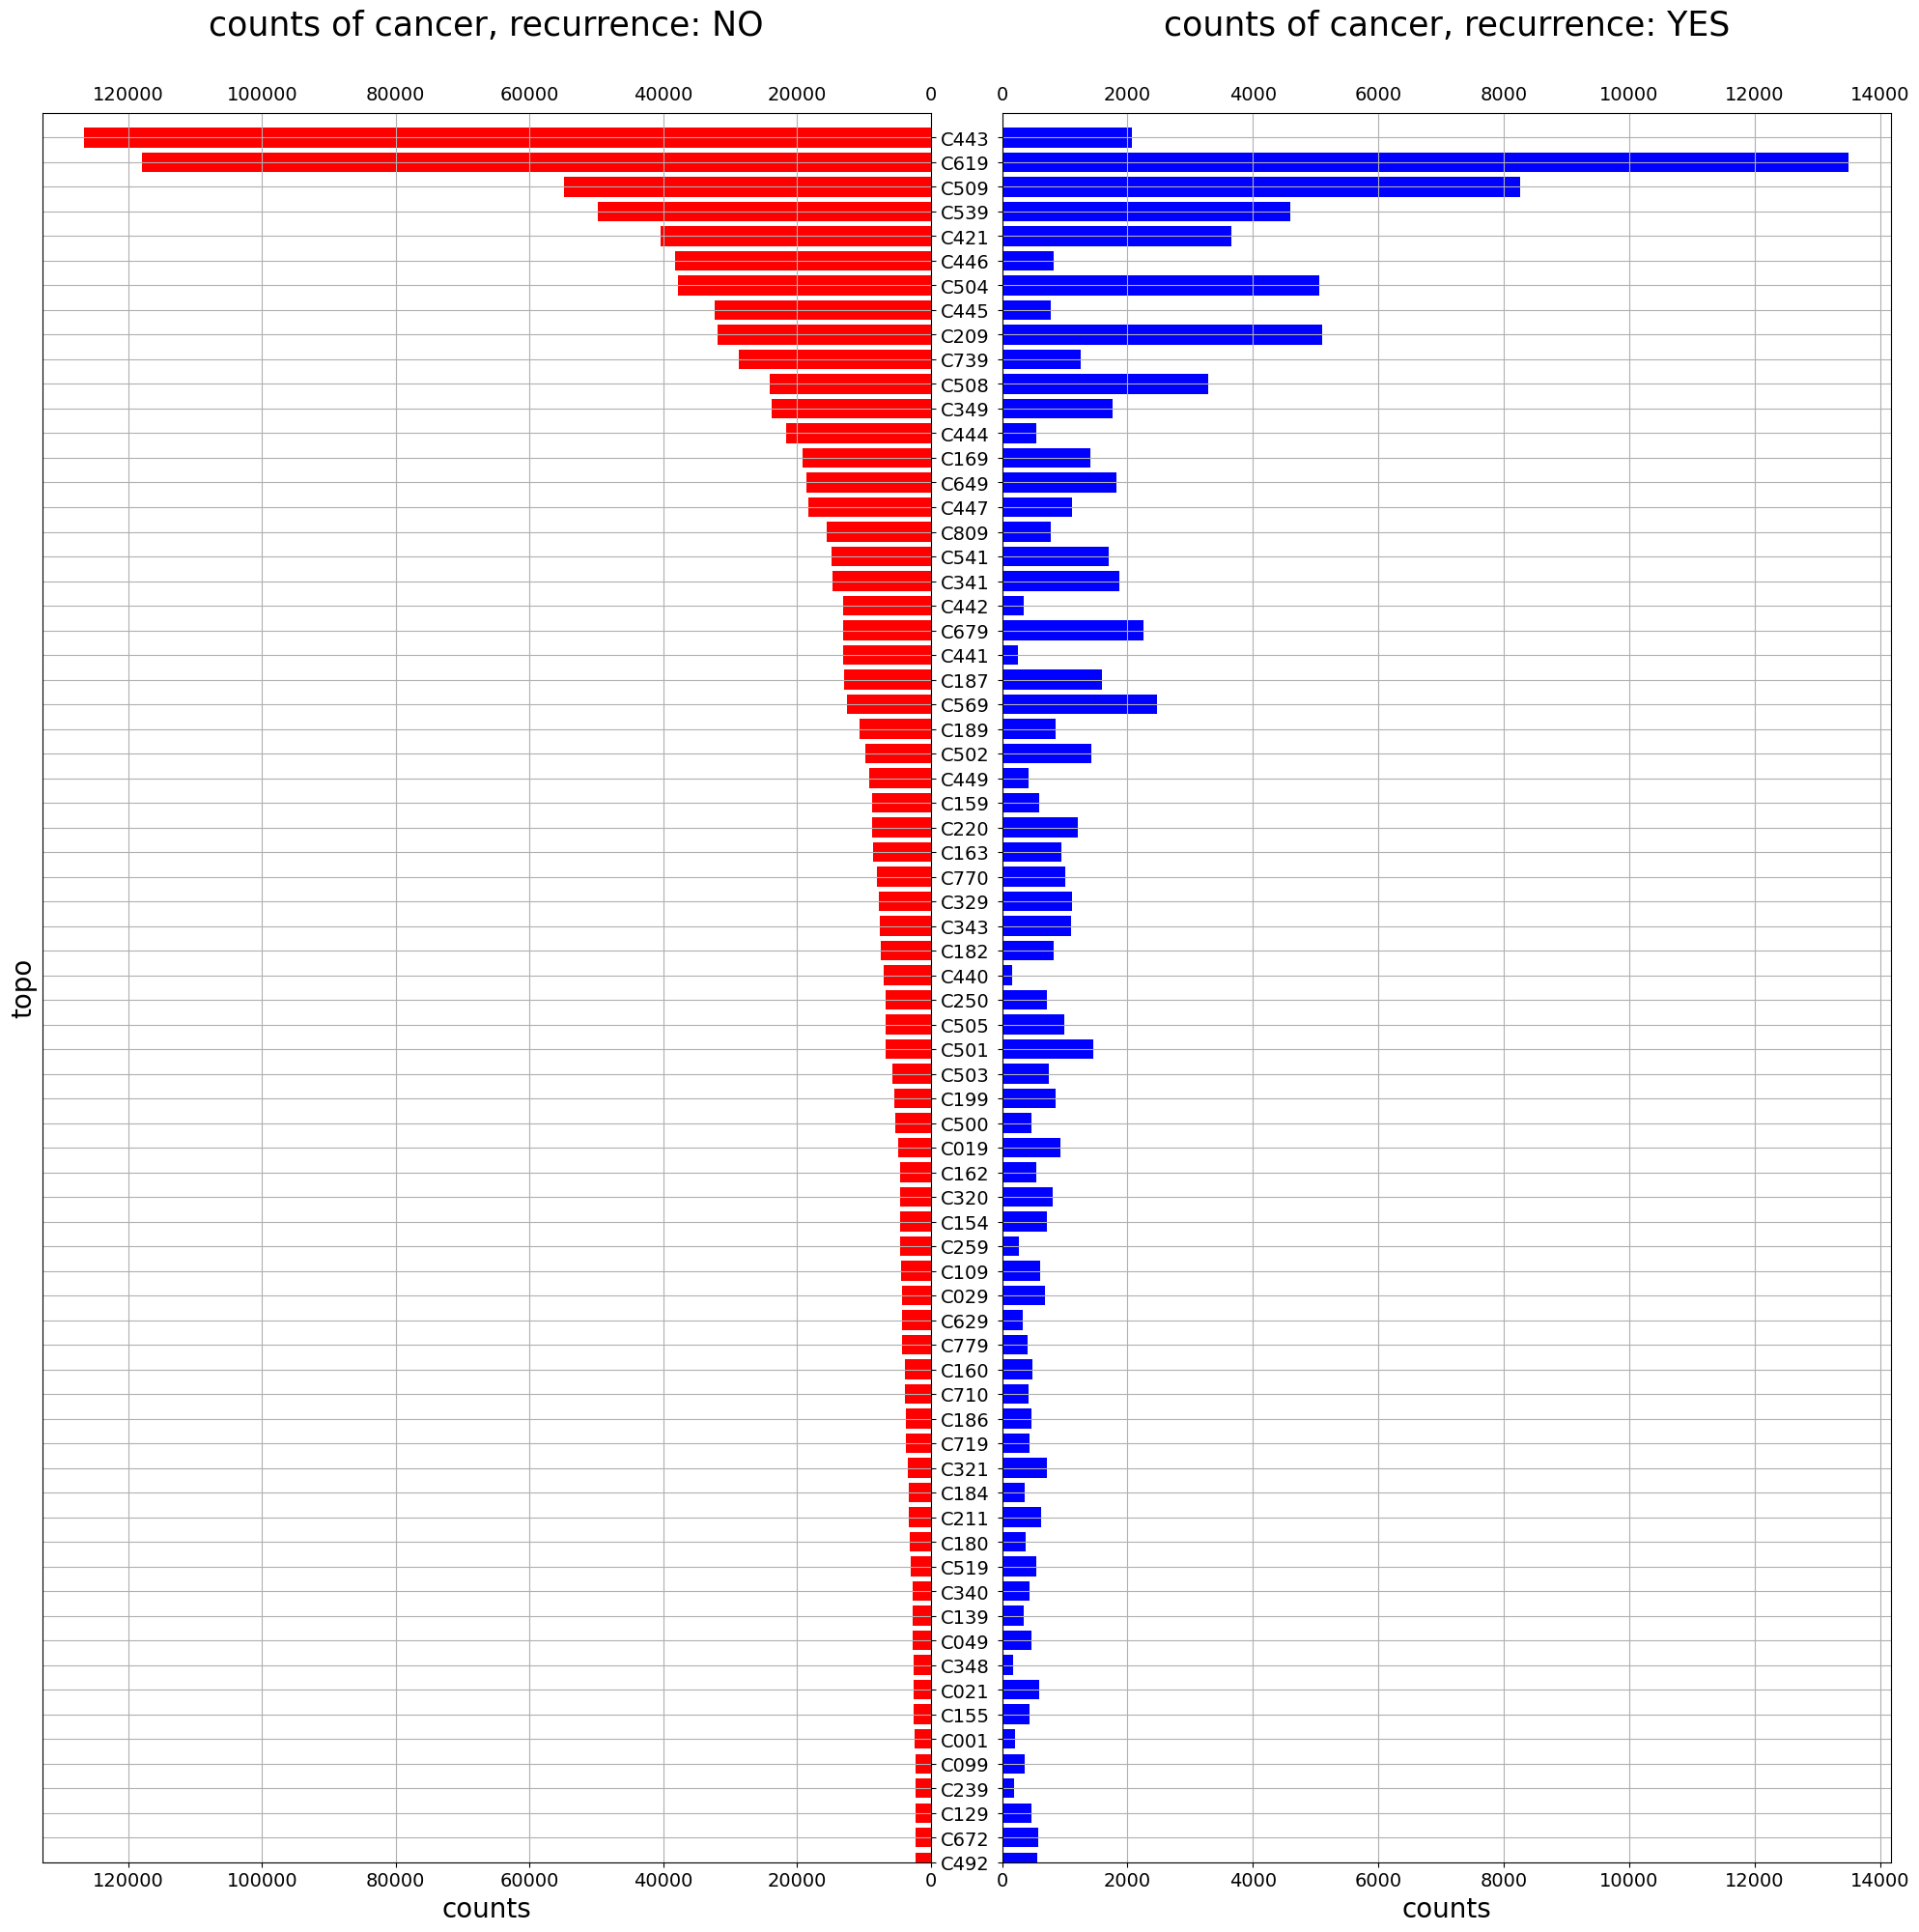

In [152]:
# df01, target_column = separate_recnenhum('topogrup', 'recnenhum', rhc)
df01, target_column = separate_recnenhum('topo', 'recnenhum', rhc)

# create a plot considering absolute count values
x0 = df01['rec0_counts']
x1 = df01['rec1_counts']

y = df01[target_column]

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(20, 20))
axes[0].barh(y, x1, align='center', color='red')
#axes[0].set(title='No cancer recurrence')
axes[0].set_title('counts of cancer, recurrence: NO',fontsize= 25, y=1.04) 
axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].set(yticks=y)
axes[0].yaxis.tick_right()
axes[0].grid()
axes[0].tick_params(axis='both', which='major', labeltop=True, labelsize=14)
axes[0].set_xlabel(f'counts', fontsize=20)
axes[0].set_ylabel(f'{target_column}', fontsize=20)

axes[1].barh(y, x0, align='center', color='blue')
#axes[1].set(title='Cancer recurrence')
axes[1].set_title('counts of cancer, recurrence: YES',fontsize= 25, y=1.04)
axes[1].grid(which='both', axis='both')
axes[1].tick_params(axis='both', which='major', labeltop=True, labelsize=14)
axes[1].set_xlabel(f'counts', fontsize=20)

fig.tight_layout()
fig.subplots_adjust(wspace=0.08)
#plt.ylim((311, -1)) # help to remove white space before and after the bars
plt.ylim((70, -1)) # help to remove white space before and after the bars
#plt.savefig(fname='topo_rec.jpg', format='jpeg')
plt.show()

Once we have the counts for each type of cancer we can also calculate the recurrence ratios. Now we can select cancer types by counts and/or by recurrence ratio.

In [153]:
ratio = ratio_recnenhum(df01) 

# show recurrence for cases with more than 50000 counts
ratio[ratio['rec1_counts']>50000]

topo  rec1_counts  rec0_counts   rec_sum  rec0_ratio  rec1_ratio
0  C443       126536       2070.0  128606.0         1.6        98.4
1  C619       117939      13498.0  131437.0        10.3        89.7
2  C509        54882       8264.0   63146.0        13.1        86.9

In [154]:
# show recurrence considering cases with more than 16% of recurrence (rare cases in this dataset)
ratio[ratio['rec0_ratio']>16]

topo  rec1_counts  rec0_counts  rec_sum  rec0_ratio  rec1_ratio
23   C569        12561       2472.0  15033.0        16.4        83.6
37   C501         6802       1457.0   8259.0        17.6        82.4
54   C321         3430        715.0   4145.0        17.2        82.8
63   C021         2587        586.0   3173.0        18.5        81.5
68   C129         2308        476.0   2784.0        17.1        82.9
69   C672         2287        571.0   2858.0        20.0        80.0
70   C492         2287        563.0   2850.0        19.8        80.2
72   C402         2123        524.0   2647.0        19.8        80.2
73   C051         2042        411.0   2453.0        16.8        83.2
93   C062         1389        283.0   1672.0        16.9        83.1
100  C678         1165        379.0   1544.0        24.5        75.5
102  C711         1125        315.0   1440.0        21.9        78.1
111  C712          937        205.0   1142.0        18.0        82.0
112  C300          936        184.0   1120.0        16.4        83.6
117  C310          866        186.0   1052.0        17.7        82.3
123  C491          819        186.0   1005.0        18.5        81.5
126  C414          806        192.0    998.0        19.2        80.8
145  C713          614        144.0    758.0        19.0        81.0
146  C102          609        130.0    739.0        17.6        82.4
147  C495          605        131.0    736.0        17.8        82.2
149  C400          588        113.0    701.0        16.1        83.9
150  C040          570        117.0    687.0        17.0        83.0
151  C031          552        106.0    658.0        16.1        83.9
152  C670          549        110.0    659.0        16.7        83.3
154  C601          540        110.0    650.0        16.9        83.1
155  C674          518        100.0    618.0        16.2        83.8
157  C494          511        102.0    613.0        16.6        83.4
173  C100          369         81.0    450.0        18.0        82.0
177  C740          350         69.0    419.0        16.5        83.5
180  C413          329         63.0    392.0        16.1        83.9
182  C052          326         72.0    398.0        18.1        81.9
185  C403          307         59.0    366.0        16.1        83.9
194  C671          264         53.0    317.0        16.7        83.3
197  C030          257         55.0    312.0        17.6        82.4
198  C673          257         61.0    318.0        19.2        80.8
199  C020          257         53.0    310.0        17.1        82.9
201  C496          255         54.0    309.0        17.5        82.5
205  C089          234         46.0    280.0        16.4        83.6
206  C041          225         49.0    274.0        17.9        82.1
214  C714          186         37.0    223.0        16.6        83.4
220  C111          169         36.0    205.0        17.6        82.4
222  C048          166         34.0    200.0        17.0        83.0
223  C322          164         37.0    201.0        18.4        81.6
240  C058          100         23.0    123.0        18.7        81.3
241  C695           98         28.0    126.0        22.2        77.8
244  C741           96         21.0    117.0        17.9        82.1
245  C570           91         36.0    127.0        28.3        71.7
248  C510           89         21.0    110.0        19.1        80.9
252  C311           79         17.0     96.0        17.7        82.3
257  C470           75         17.0     92.0        18.5        81.5
260  C709           71         16.0     87.0        18.4        81.6
263  C113           66         16.0     82.0        19.5        80.5
272  C472           57         15.0     72.0        20.8        79.2
275  C061           50         10.0     60.0        16.7        83.3
282  C471           42         13.0     55.0        23.6        76.4
291  C677           35          8.0     43.0        18.6        81.4
292  C005           33          7.0     40.0        17.5        82.5
295

In [155]:
# visualize some limit values for recurrence: more than 1000 datapoints with recurrence greater than 15%
ratio[(ratio['rec1_counts']>4000) & (ratio['rec0_ratio']>15)]

topo  rec1_counts  rec0_counts  rec_sum  rec0_ratio  rec1_ratio
23  C569        12561       2472.0  15033.0        16.4        83.6
37  C501         6802       1457.0   8259.0        17.6        82.4
41  C019         4948        926.0   5874.0        15.8        84.2

From the above tables we can see that some types of cancer can be less imbalanced than the overall dataset.

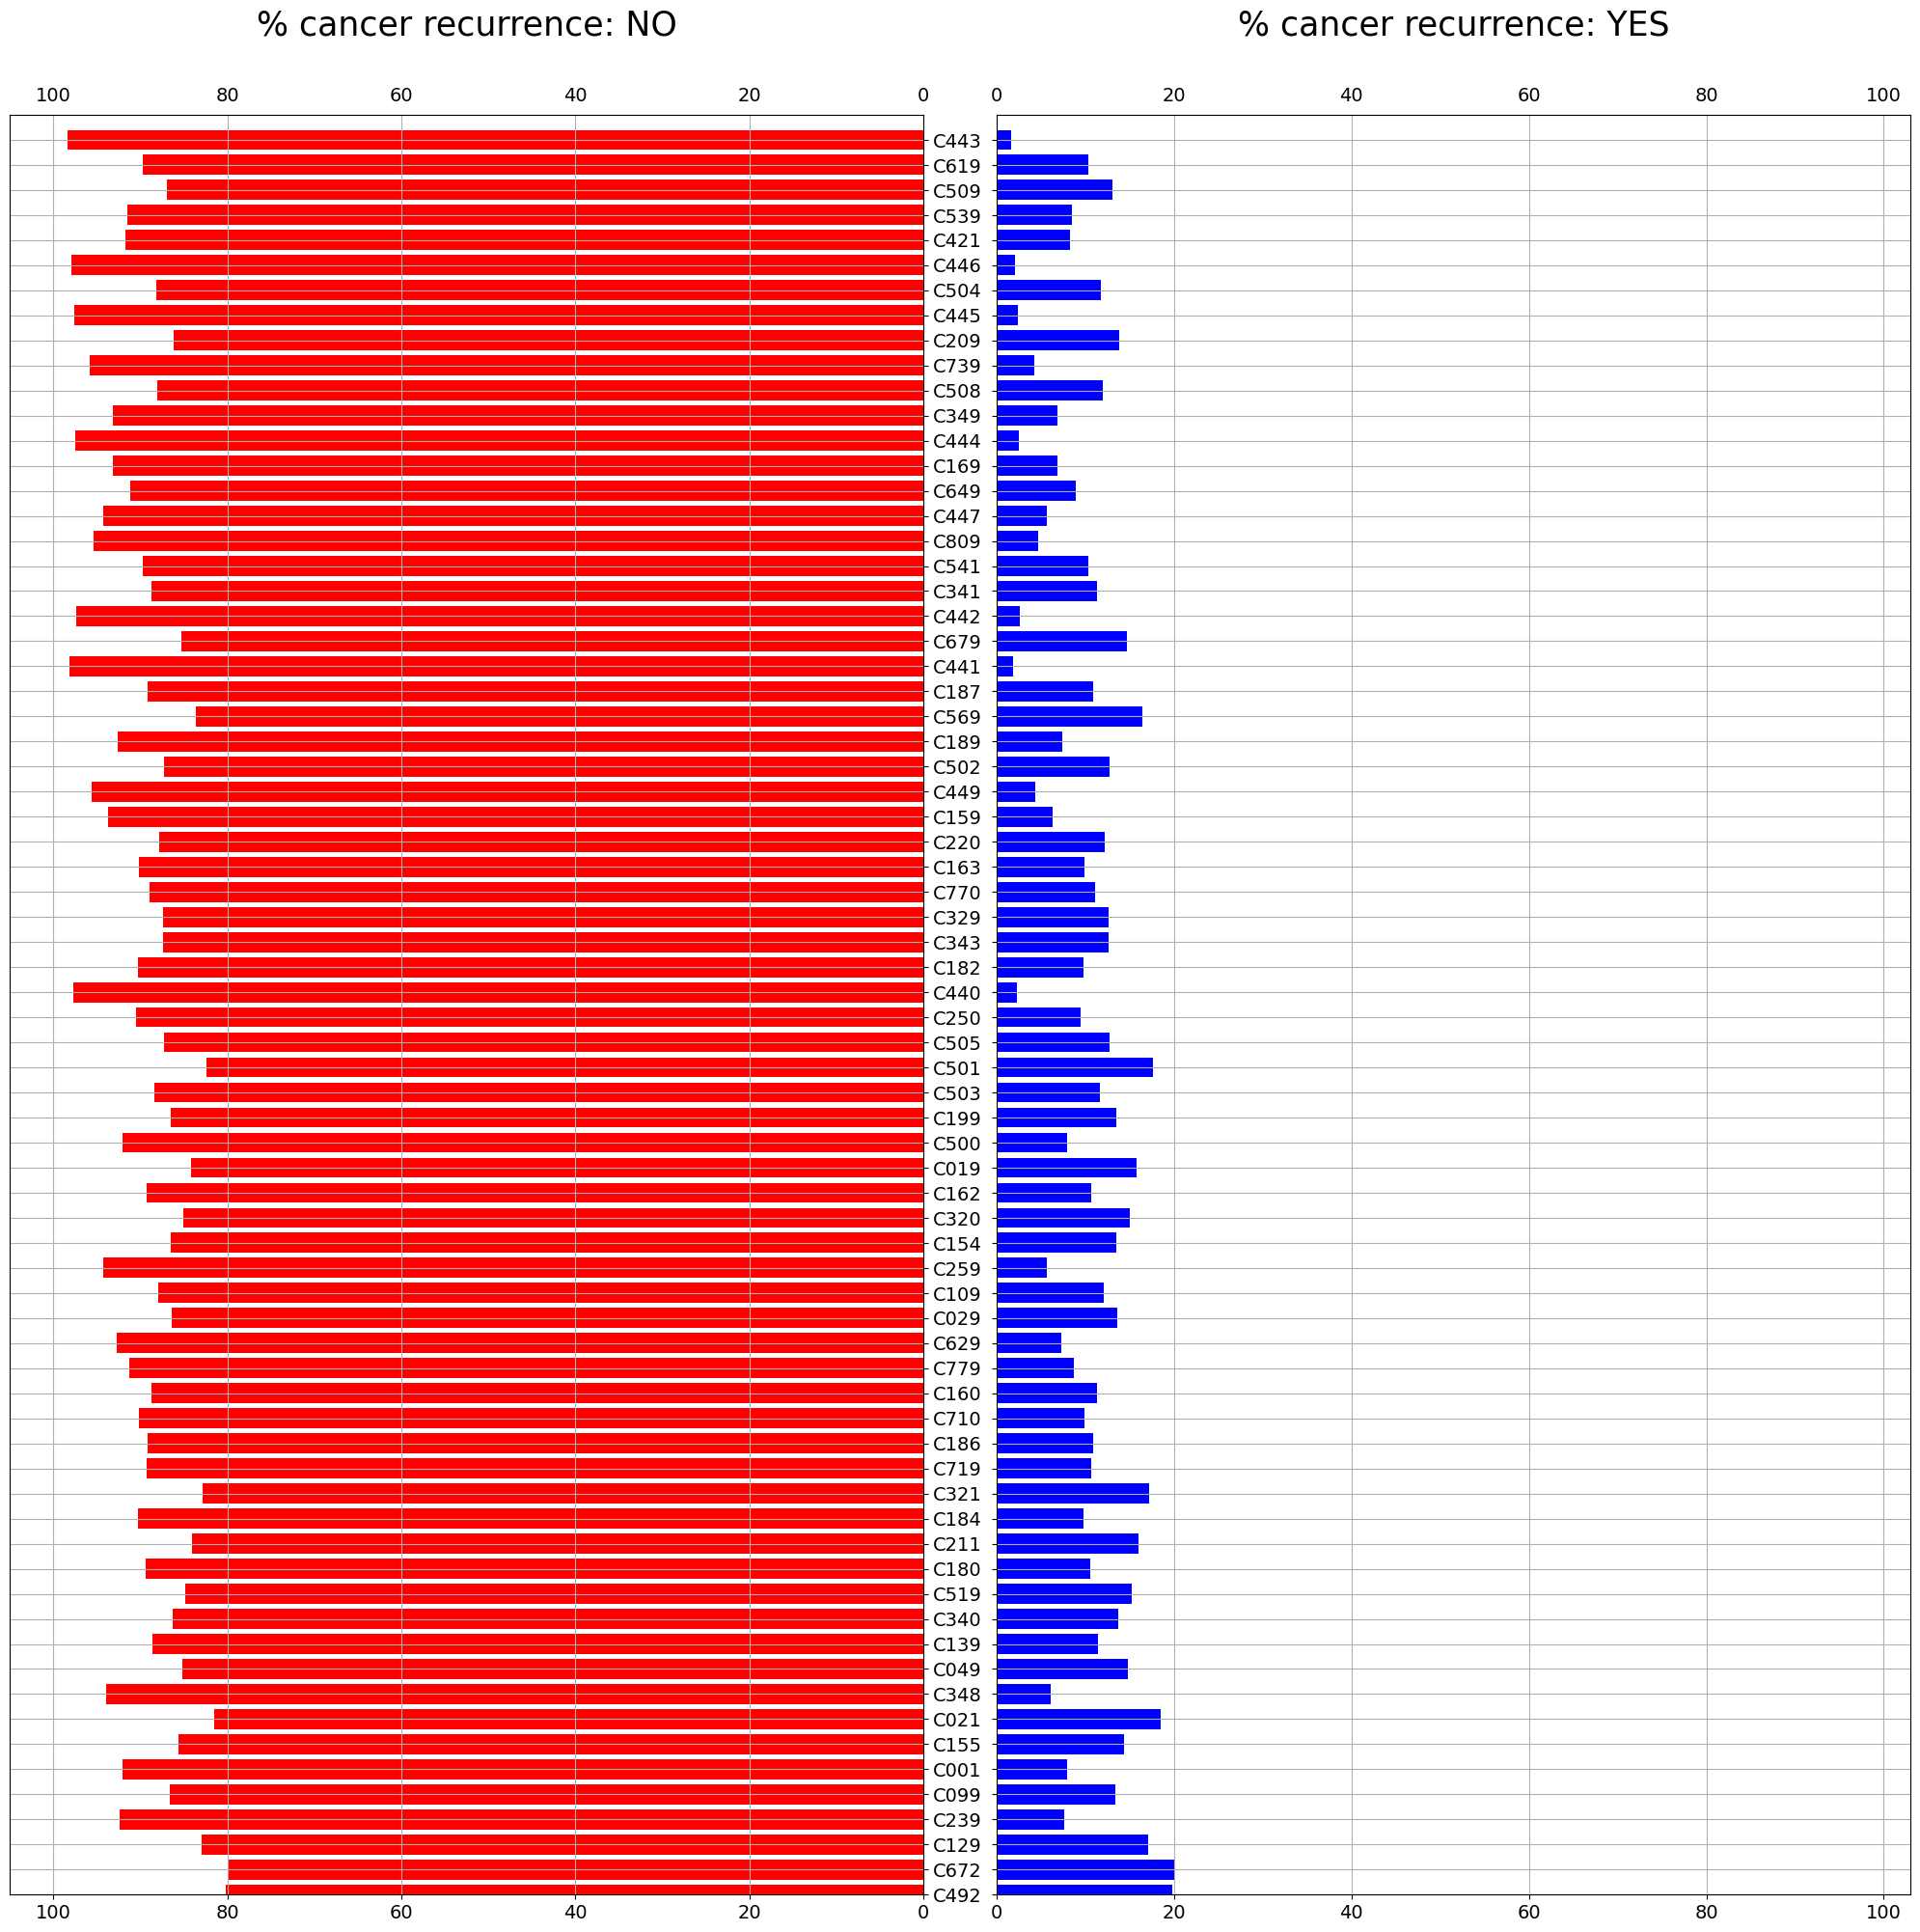

In [156]:
# create a plot considering relative values (%)

x0 = ratio['rec0_ratio']
x1 = ratio['rec1_ratio']

y = ratio[target_column]

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(20, 20))
axes[0].barh(y, x1, align='center', color='red')
#axes[0].set(title='No cancer recurrence')
axes[0].set_title('% cancer recurrence: NO',fontsize= 25, y=1.04) 
axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].set(yticks=y)
axes[0].yaxis.tick_right()
axes[0].grid()
axes[0].tick_params(axis='both', which='major', labeltop=True, labelsize=14)

axes[1].barh(y, x0, align='center', color='blue')
#axes[1].set(title='Cancer recurrence')
axes[1].set_title('% cancer recurrence: YES',fontsize= 25, y=1.04)
axes[1].grid(which='both', axis='both')
axes[1].tick_params(axis='both', which='major', labeltop=True, labelsize=14)

plt.xlim((0,103))

fig.tight_layout()
fig.subplots_adjust(wspace=0.08)
#plt.ylim((311, -1)) # help to remove white space before and after the bars
plt.ylim((70, -1)) # help to remove white space before and after the bars
# plt.savefig(fname='topo_rec_ratio.jpg', format='jpeg')
plt.show()

The last two plots compare different types of cancer with and without recurrence. Some interesting results:
* considering absolute values we can observe cancer types that present more cases
* considering relative values we can see that different types of cancer have different recurrence ratios

These are very general conclusions since this is a complex dataset. However, it indicates however that each type of cancer should be treated separately. When looking to the second plot we should have in mind that some cancer types have a very few cases (counts).

In [157]:
# local relapse
rhc.reclocal.value_counts(normalize=True)

reclocal
0    0.957559
1    0.042441
Name: proportion, dtype: float64

In [158]:
# regional relapse
rhc.recregio.value_counts(normalize=False)

recregio
0    1230340
1      26877
Name: count, dtype: int64

In [159]:
# distant relapse / metastasis
rhc.recdist.value_counts(normalize=False)

recdist
0    1215331
1      41886
Name: count, dtype: int64

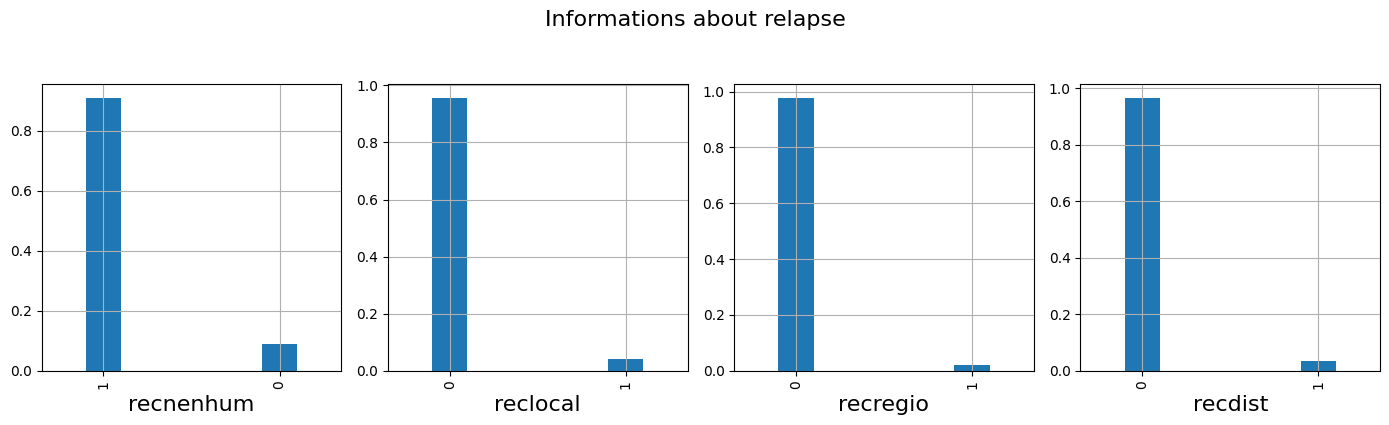

In [160]:
# relapse plots
relapse = ['recnenhum', 'reclocal', 'recregio', 'recdist']

fig = plt.figure()
num = 0

fig.suptitle('Informations about relapse', fontsize=16, y=1.05)


for item in relapse:
    num += 1
    counts = rhc[item].value_counts(normalize=True)
    ax = fig.add_subplot(1,4,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=0.2,figsize=(14,4))
    plt.grid()
#plt.text(0.5, 100000,' O - Nao\n 1 - Sim', fontsize = 10)
plt.tight_layout()
#plt.savefig('treatments.jpg')
plt.show()

#### Relapse/metastasis site

The columns containing this information have the following characteristics:
* `rec01` 
* `rec02` 
* `rec03` 
* `rec04`

In this case, the null values occur because the number of relapses in the dataset is low, probably these null values correspond to cases in which there was no relapse.

In [161]:
rhc['rec04'].unique()

array([nan, 'C48', 'C22', 'C72', 'C50', 'C77', 'C44', 'C71', 'C41', 'C49',
       'C38', 'C34', 'C74', 'C56', 'C69', 'C64', 'C16', 'C40', 'C47',
       'C25', 'C52', 'C42', 'C26', 'C23', 'C55', 'C17', 'C07', 'C66',
       'C65', 'C67', 'C75', 'C15', 'C70', 'C76', 'C18', 'C57', 'C20',
       'C53', 'C24', 'C06', 'C61', 'C12', 'C01', 'C10', 'C04', 'C32',
       'C19', 'C31', 'C54', 'C62'], dtype=object)

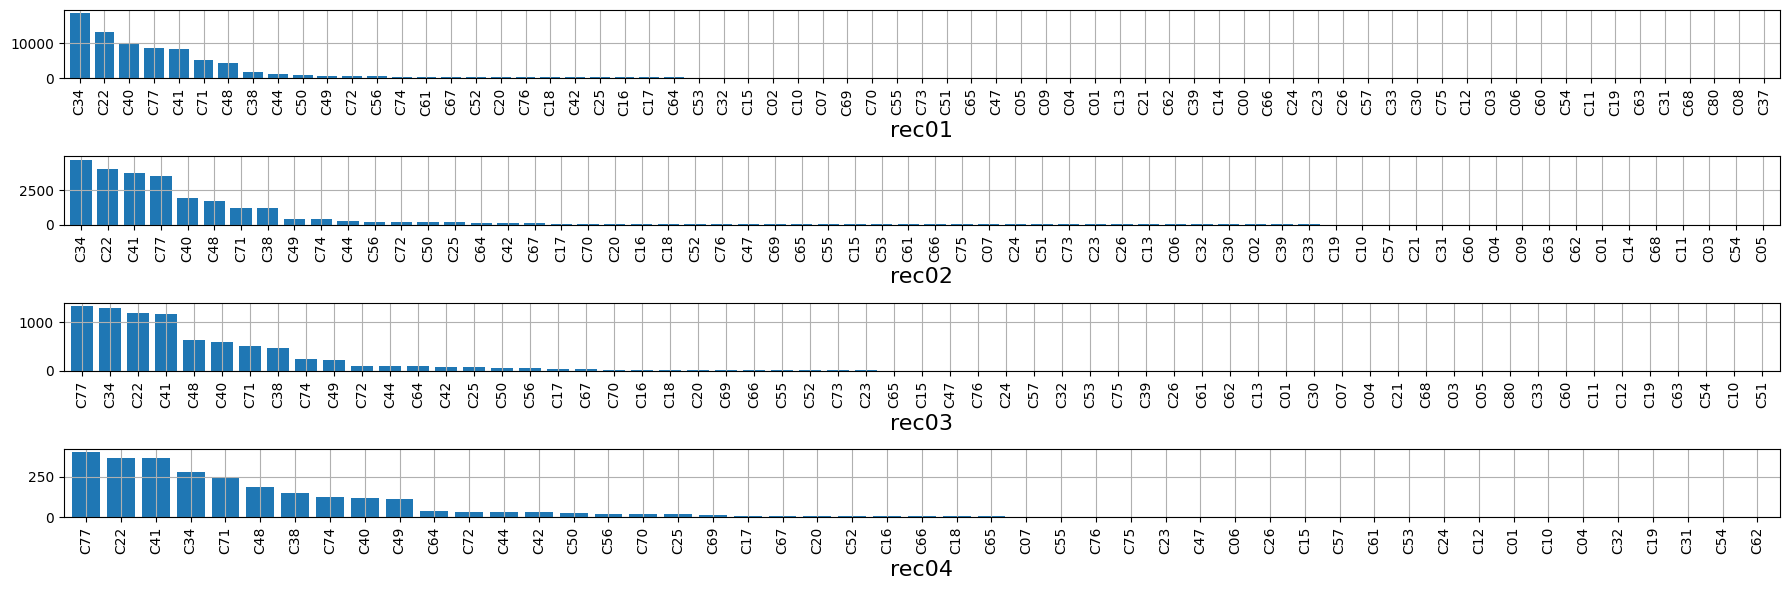

In [162]:
# location of relapse / metastasis
metastasis = ['rec01', 'rec02', 'rec03', 'rec04'] 

fig = plt.figure()
num = 0

for item in metastasis:
    num += 1
    counts = rhc[item].value_counts(normalize=False)
    ax = fig.add_subplot(4,1,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=0.8,figsize=(18,6))
    plt.grid()
plt.tight_layout()
plt.show()

In [163]:
# location of relapse / metastasis rec01
rhc.rec01.value_counts(normalize=True).head()

rec01
C34    0.231853
C22    0.165161
C40    0.123247
C77    0.109371
C41    0.103889
Name: proportion, dtype: float64

In [164]:
# location of relapse / metastasis rec02
rhc.rec02.value_counts(normalize=False)

rec02
C34    4719
C22    4068
C41    3723
C77    3506
C40    1930
C48    1696
C71    1240
C38    1172
C49     434
C74     376
C44     276
C56     191
C72     185
C50     172
C25     164
C64     145
C42     109
C67      84
C17      79
C70      75
C20      74
C16      70
C18      68
C52      64
C76      52
C47      33
C69      30
C65      28
C55      28
C15      23
C53      22
C61      18
C66      17
C75      16
C07      15
C24      13
C51      13
C73      12
C23      11
C26      10
C13      10
C06      10
C32      10
C30       9
C02       9
C39       9
C33       8
C19       7
C10       7
C57       7
C21       6
C31       6
C60       5
C04       4
C09       4
C63       4
C62       4
C01       3
C14       2
C68       2
C11       2
C03       2
C54       2
C05       2
Name: count, dtype: int64

In [165]:
# # location of relapse / metastasis rec03
rhc.rec03.value_counts(normalize=False)

rec03
C77    1338
C34    1301
C22    1189
C41    1175
C48     627
C40     599
C71     510
C38     475
C74     240
C49     226
C72     111
C44     106
C64     101
C42      72
C25      71
C50      68
C56      67
C17      33
C67      33
C70      29
C16      27
C18      26
C20      23
C69      18
C66      16
C55      16
C52      12
C73      12
C23       9
C65       8
C15       7
C47       6
C76       6
C24       6
C57       6
C32       5
C53       4
C75       4
C39       4
C26       4
C61       3
C62       3
C13       3
C01       2
C30       2
C07       2
C04       2
C21       1
C68       1
C03       1
C05       1
C80       1
C33       1
C60       1
C11       1
C12       1
C19       1
C63       1
C54       1
C10       1
C51       1
Name: count, dtype: int64

In [166]:
# location of relapse / metastasis rec04
rhc.rec04.value_counts(normalize=False)

rec04
C77    402
C22    368
C41    363
C34    280
C71    240
C48    185
C38    152
C74    125
C40    121
C49    111
C64     36
C72     34
C44     33
C42     32
C50     26
C56     20
C70     19
C25     17
C69     14
C17     10
C67      7
C20      7
C52      7
C16      5
C66      5
C18      5
C65      5
C07      4
C55      3
C76      3
C75      3
C23      3
C47      3
C06      3
C26      2
C15      2
C57      2
C61      2
C53      1
C24      1
C12      1
C01      1
C10      1
C04      1
C32      1
C19      1
C31      1
C54      1
C62      1
Name: count, dtype: int64

#### International Classification of Diseases for Oncology (CIDO)

In [167]:
# morphology code counts
rhc.cido.value_counts(normalize=False)

cido
80703.0    191816
81403.0    175544
85003.0    124434
80903.0    111762
85503.0     84315
            ...  
86321.0         1
87281.0         1
81523.0         1
91243.0         1
81521.0         1
Name: count, Length: 708, dtype: int64

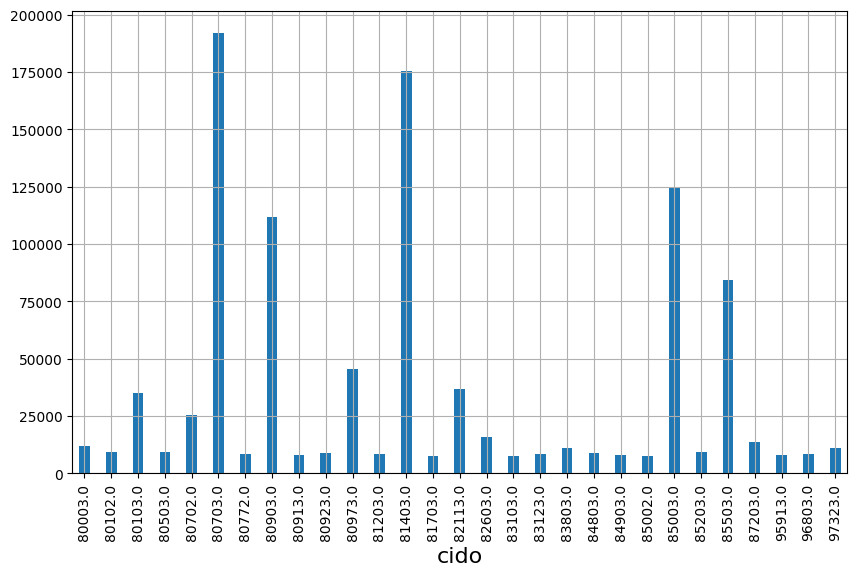

In [168]:
# plot morphology codes
cido = rhc.cido.value_counts(normalize=False)[rhc.cido.value_counts(normalize=True) > 0.005]
plt.xlabel('cido', fontsize=16)
cido.sort_index().plot.bar(width=0.4,figsize=(10,6))
fig.suptitle('International Classification of Diseases for Oncology', fontsize=16, y=1.05)

plt.grid()
plt.show()

In [169]:
# summary of morphology description
rhc.descido.describe()

count                          1257186
unique                             708
top       CARCINOMA ESCAMOCELULAR, SOE
freq                            191816
Name: descido, dtype: object

In [170]:
# morphology description counts
rhc.descido.value_counts(normalize=False).head(20)

descido
CARCINOMA ESCAMOCELULAR, SOE               191816
ADENOCARCINOMA, SOE                        175544
CARCINOMA DUCTAL INFILTRANTE, SOE          124434
CARCINOMA BASOCELULAR, SOE                 111762
CARCINOMA DE CELULAS ACINOSAS               84315
CARCINOMA BASOCELULAR NODULAR               45408
ADENOCARCINOMA TUBULAR                      36619
CARCINOMA, SOE                              35256
CARCINOMA ESCAMOCELULAR IN SITU, SOE        25490
ADENOCARCINOMA PAPILAR, SOE                 16005
MELANOMA MALIGNO, SOE                       13566
NEOPLASIA MALIGNA                           11990
ADENOCARCINOMA ENDOMETRIOIDE, SOE           11045
MIELOMA MULTIPLO                            10938
CARCINOMA LOBULAR, SOE                       9481
CARCINOMA IN SITU, SOE                       9322
CARCINOMA PAPILAR, SOE                       9312
ADENOCARCINOMA MUCINOSO                      8950
CARCINOMA BASOCELULAR INFILTRATIVO, SOE      8877
CARCINOMA DE CELULAS TRANSICIONAIS, SOE   

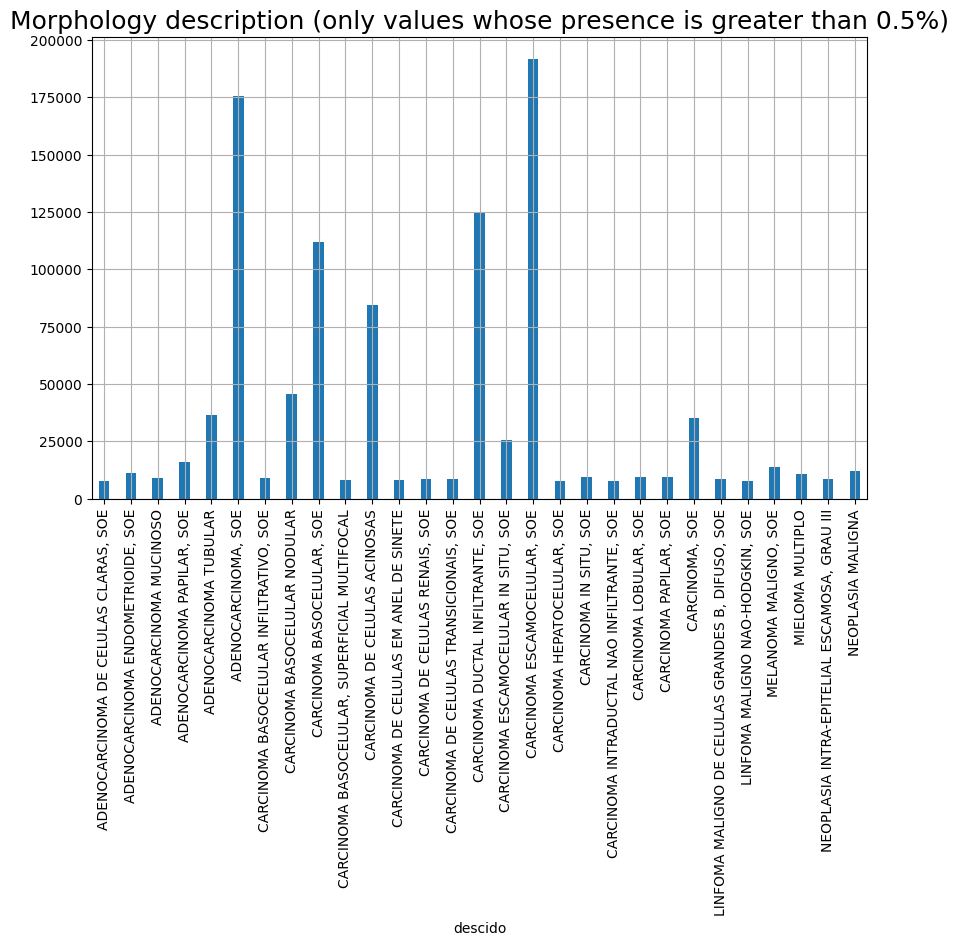

In [171]:
# plot of morphology description counts, only entries with more than 0.5% of counts
dsccido = rhc.descido.value_counts(normalize=False)[rhc.descido.value_counts(normalize=True) > 0.005]
plt.title('Morphology description (only values whose presence is greater than 0.5%)', fontsize=18)
dsccido.sort_index().plot.bar(width=0.4,figsize=(10,6))
plt.grid()
plt.show()

#### Qualification of health facilities

In [172]:
rhc.habilit.value_counts(normalize=False).head(20)

habilit
7     523425
6     214699
10    126473
9     115254
1      94229
2      58666
14     35435
3      29230
13     24437
12     13484
15      9782
8       7981
5       4122
Name: count, dtype: int64

In [173]:
rhc.habilit1.value_counts(normalize=False).head(10)

habilit1
3    738124
1    437336
6     35435
5     24437
2     13904
4      7981
Name: count, dtype: int64

In [174]:
rhc.habilit2.value_counts(normalize=False).head(10)

habilit2
2    738124
1    451240
5     35435
4     24437
3      7981
Name: count, dtype: int64

#### Cities where the qualifications are

In [175]:
rhc.cidade.value_counts(normalize=False).head(20)

cidade
SAO PAULO                335787
CAMPINAS                  22519
SAO JOSE DO RIO PRETO     22473
RIBEIRAO PRETO            20545
GUARULHOS                 18431
OSASCO                    14970
JAU                       14256
SAO BERNARDO DO CAMPO     13307
BOTUCATU                  12813
JUNDIAI                   12267
BARRETOS                  11869
SANTO ANDRE               11301
BAURU                     11139
SANTOS                    10763
PIRACICABA                10526
MARILIA                    9600
SAO JOSE DOS CAMPOS        8905
TAUBATE                    7321
SAO CAETANO DO SUL         7102
RIO CLARO                  6907
Name: count, dtype: int64

In [176]:
# rhc.to_csv('../data/dataset_jun22.csv', index=False)
# rhc.to_csv('../data/dataset_2000-2025.csv', index=False)

## Mutual info score

NOTE: Take care of the NaN! Better to implement after imputations.

In [177]:
# from sklearn.metrics import mutual_info_score

In [178]:
# cat_cols = rhc.select_dtypes(exclude=[np.number]).columns

In [179]:
# it can be implement after handling NaN
# def calculate_mi(series):
#      return mutual_info_score(rhc.relapse, series)

In [180]:
# test
# categ = ['ufnasc',  'cidade']
# rhc[categ].apply(calculate_mi)

In [181]:
# df_mi = rhc[cat_cols].apply(calculate_mi)
# df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

# df_mi.head()

## Wordclouds

In [182]:
# rhc.desctopo.to_string('../data/desctopo.txt', index=False)
# rhc.descmorfo.to_string('../data/descmorfo.txt', index=False)

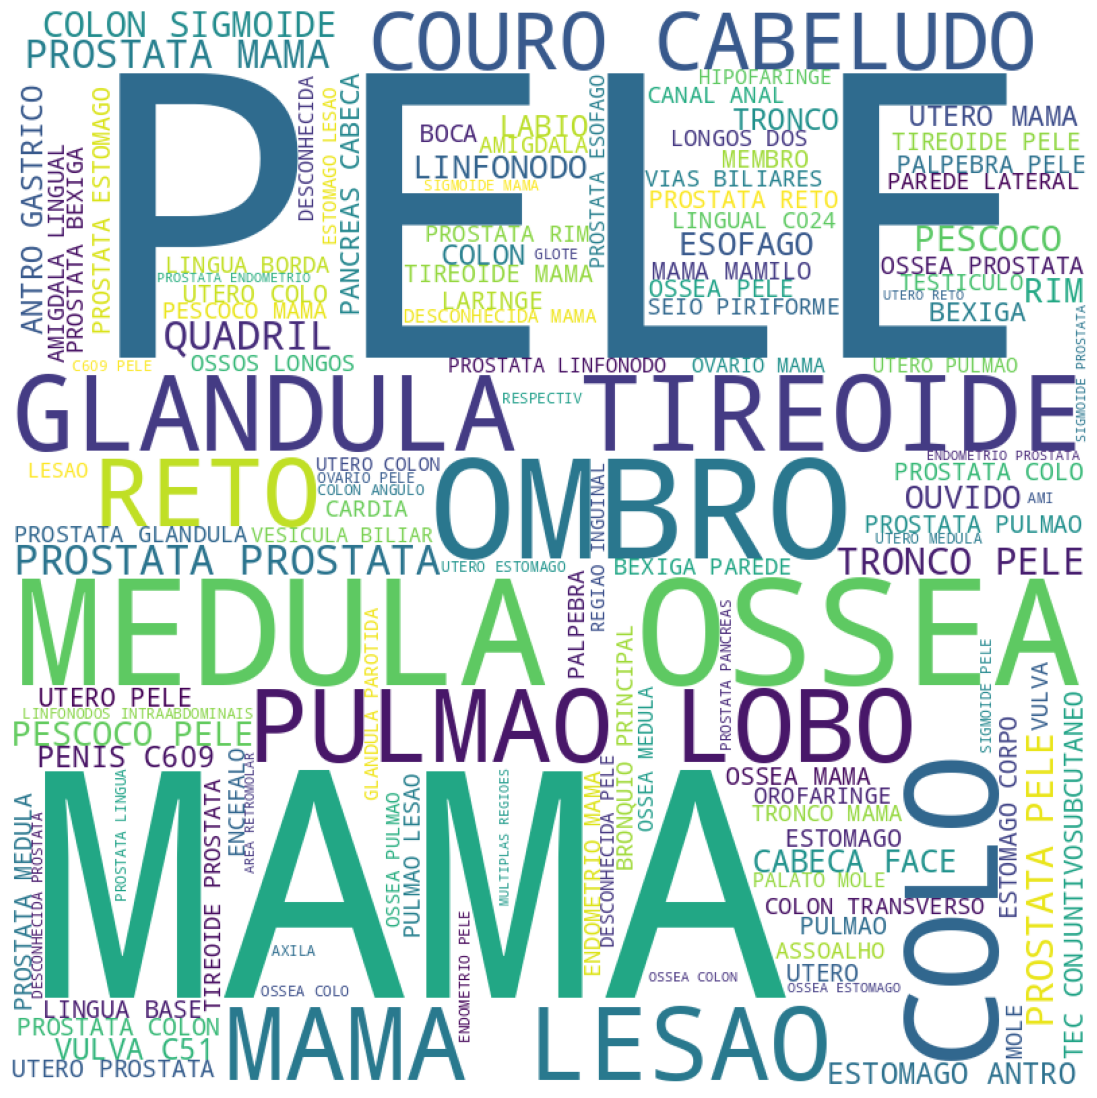

In [183]:
# word cloud
file_content=open("../data/desctopo.txt").read()

stopwords = set(STOPWORDS)
stopwords.update([
                 "da", "em", "de", "ao", "e", "a", "o", 
                 "nao", "soe", "partes", "exclui", 
                 "outras", "superior", "inferior", 
                 "superiores", "inferiores", "membros", "membro"
                 "lesao", "externo", "interno", "quadrante",
                 "localizacao", "primaria", "descendente",
                 "ascendente", "juncao", "especific", 
                 "porcao", "terco",  "medio", "sobreposta",
                 "central", "outros", "tecido", "tecidos",
                 "C445"
])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(file_content)


plt.figure(figsize=(14,14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# word cloud
file_content=open("../data/descmorfo.txt").read()

stopwords = set(STOPWORDS)
stopwords.update([
                 "da", "em", "de", "ao", "e", "a", "o", 
                 "nao", "soe", "partes", "exclui", 
                 "outras", "superior", "inferior", 
                 "superiores", "inferiores", "membros", "membro"
                 "lesao", "externo", "interno", "quadrante",
                 "localizacao", "primaria", "descendente",
                 "ascendente", "juncao", "especific", 
                 "porcao", "terco",  "medio", "sobreposta",
                 "central", "GRAU III"
])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(file_content)


plt.figure(figsize=(14,14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()